In [1]:
#..MODIFIED BY CHUYAN at Feb.15th, this file was intended to re-plot some former figures in a better way

import netCDF4
from numpy import *
import matplotlib.pyplot as plt
import xarray as xr
import PyNIO as Nio
import pandas as pd
import glob
from scipy.stats import *
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from matplotlib.ticker import MaxNLocator
from matplotlib.colors import BoundaryNorm

from scipy.optimize import curve_fit
import seaborn as sns
from useful_func_cy import *

In [2]:
deck_nas  = ['BCCESM1', 'CanESM5', 'CESM2', 'CESM2FV2', 'CESM2WACCM', 'CNRMESM2', 'GISSE21G', 'GISSE21H', 'IPSLCM6ALR', 'MRIESM20', 'MIROC6', 'SAM0']
#..deck_nas  =    ['CESM2']
exp = 'piControl'

ACCESSCM2 = {'modn': 'ACCESS-CM2', 'consort': 'CSIRO-ARCCSS', 'cmip': 'cmip6',
             'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}#..dont have 'clwvi' variable, even in esgf-node website
BCCESM1 = {'modn': 'BCC-ESM1', 'consort': 'BCC', 'cmip': 'cmip6',
           'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
CAMSCSM1 = {'modn': 'CAMS-CSM1-0', 'consort': 'CAMS', 'cmip': 'cmip6',
        'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}

CanESM5 = {'modn': 'CanESM5', 'consort': 'CCCma', 'cmip': 'cmip6',
           'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
CESM2 = {'modn': 'CESM2', 'consort': 'NCAR', 'cmip': 'cmip6',
         'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
CESM2FV2 = {'modn': 'CESM2-FV2', 'consort': 'NCAR', 'cmip': 'cmip6',
         'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}

CESM2WACCM = {'modn': 'CESM2-WACCM', 'consort': 'NCAR', 'cmip': 'cmip6',
         'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
CNRMCM6 = {'modn': 'CNRM-CM6-1', 'consort': 'CNRM-CERFACS', 'cmip': 'cmip6',
           'exper': exp, 'ensmem': 'r1i1p1f2', 'gg': 'gr', "typevar": 'Amon'}# time doesn't corresponding for 'evspsbl' in  'pi-Control' exper
CNRMESM2 = {'modn': 'CNRM-ESM2-1', 'consort': 'CNRM-CERFACS', 'cmip': 'cmip6', 
           'exper': exp, 'ensmem': 'r1i1p1f2', 'gg': 'gr', "typevar": 'Amon'}
E3SM10 = {'modn': 'E3SM-1-0', 'consort': 'E3SM-Project', 'cmip': 'cmip6',
          'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gr', "typevar": 'Amon'}
FGOALSg3 = {'modn': 'FGOALS-g3', 'consort': 'CAS', 'cmip': 'cmip6',
            'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
GFDLCM4 = {'modn': 'GFDL-CM4', 'consort': 'NOAA-GFDL', 'cmip': 'cmip6',
           'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gr1', "typevar": 'Amon'}
# repaired Dec.30th

GISSE21G = {'modn': 'GISS-E2-1-G', 'consort': 'NASA-GISS', 'cmip': 'cmip6',
            'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
GISSE21H = {'modn': 'GISS-E2-1-H', 'consort': 'NASA-GISS', 'cmip': 'cmip6',
            'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}

HADGEM3 = {'modn': 'HadGEM3-GC31-LL', 'consort': 'MOHC', 'cmip': 'cmip6',
           'exper': 'abrupt-4xCO2', 'ensmem': 'r1i1p1f3', 'gg': 'gn', "typevar": 'Amon'}   #  Be careful, failure due to 'day time representation'
HADGEM3 = {'modn': 'HadGEM3-GC31-LL', 'consort': 'MOHC', 'cmip': 'cmip6',
            'exper': 'piControl', 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}   #..missing 'wap' in 'piControl' exp

INM_CM48 = {'modn': 'INM-CM4-8', 'consort': 'INM', 'cmip': 'cmip6',
            'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gr1', "typevar": 'Amon'}
INM_CM50 = {'modn': 'INM-CM5-0', 'consort': 'INM', 'cmip': 'cmip6',
            'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gr1', "typevar": 'Amon'}#..'/glade/' dont have 'Amon' typevar

IPSLCM6ALR = {'modn': 'IPSL-CM6A-LR', 'consort': 'IPSL', 'cmip': 'cmip6',
              'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gr', "typevar": 'Amon'}

MPIESM12LR = {'modn': 'MPI-ESM1-2-LR', 'consort': 'MPI-M', 'cmip': 'cmip6',
              'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
MIROC6 = {'modn': 'MIROC6', 'consort': 'MIROC', 'cmip': 'cmip6',
          'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
MIROCES2L= {'modn': 'MIROC-ES2L', 'consort': 'MIROC', 'cmip': 'cmip6',
          'exper': exp, 'ensmem': 'r1i1p1f2', 'gg': 'gn', "typevar": 'Amon'}   # dont have
MRIESM20 = {'modn': 'MRI-ESM2-0', 'consort': 'MRI', 'cmip': 'cmip6',
            'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
NORESM2LM = {'modn': 'NorESM2-LM', 'consort': 'NCC', 'cmip': 'cmip6',
             'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}# 'pr' variable start at 130th yr in 'abrupt-4xCO2', while other variable start at 0th yr

SAM0={'modn': 'SAM0-UNICON', 'consort': 'SNU', 'cmip': 'cmip6',
            'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}


UKESM10 = {'modn': 'UKESM1-0-LL', 'consort': 'MOHC', 'cmip': 'cmip6',
           'exper': exp, 'ensmem': 'r1i1p1f2', 'gg': 'gn', "typevar": 'Amon'}   # the same day time representation issue as 'HadGEM3'
AWICM11MR = {'modn': 'AWI-CM-1-1-MR', 'consort': 'AWI', 'cmip': 'cmip6',
             'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}#..'abrupt-4xCO2' missing variables
CMCC = {'modn': 'CMCC-CM2-SR5', 'consort': 'CMCC', 'cmip': 'cmip6',
        'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'} #..'/glade/' dont have 'abrupt-4xCO2'/'piControl' exper
ECE = {'modn': 'EC-Earth3', 'consort': 'EC-Earth-Consortium', 'cmip': 'cmip6',
       'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'} #..dont have 'Amon' or variable 'tas'
#ECE has different variants for exper
ECEV = {'modn': 'EC-Earth3-Veg', 'consort': 'EC-Earth-Consortium', 'cmip': 'cmip6',
       'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gr', "typevar": 'Amon'}#..too hard to operate
#ECEV has very discrete year in 'abrupt-4xCO2', seems continued but each in one yr file in 'piControl'


In [3]:
deck2 = [BCCESM1, CanESM5, CESM2, CESM2FV2, CESM2WACCM, CNRMESM2, GISSE21G, GISSE21H, IPSLCM6ALR, MRIESM20, MIROC6, SAM0, E3SM10, FGOALSg3, GFDLCM4, CAMSCSM1,INM_CM48, MPIESM12LR]   #..current # 18 
deck_nas2 = ['BCCESM1', 'CanESM5', 'CESM2', 'CESM2FV2', 'CESM2WACCM', 'CNRMESM2', 'GISSE21G', 'GISSE21H', 'IPSLCM6ALR', 'MRIESM20', 'MIROC6', 'SAM0', 'E3SM10', 'FGOALSg3', 'GFDLCM4', 'CAMSCSM1','INM_CM48', 'MPIESM12LR']
#.. 17 models now

path1 = '/glade/work/chuyan/Research/Cloud_CCFs_RMs/plots_test1/'
path6 = '/glade/work/chuyan/Research/Cloud_CCFs_RMs/Plots_proposal/'

In [4]:
## PLot 1 # read data for ordinary, 1-lrm(not best):

deck  = [BCCESM1, CanESM5, CESM2, CESM2FV2, CESM2WACCM, CNRMESM2, E3SM10, GFDLCM4,GISSE21G, GISSE21H, IPSLCM6ALR, MRIESM20, MIROC6, SAM0]
#deck   =  [CESM2]
output_ARRAY = {}
output_intermedia = {}
output_GMT =  {}
output_2lrm_predict  = {}
output_2lrm_report   = {}

output_dict0_PI =  {}
output_dict0_abr = {}
output_LRM_le = {}
output_LRM_lt = {}

shape_yr_modelPI =  {}
shape_yr_modelabr = {}

output_2lrm_flavra_abr =  {}
output_2lrm_flavra_PI  =  {}   # was monthly data in this case
output_2lrm_yr_bin_abr =  {}
output_2lrm_yr_bin_PI  =  {}
output_2lrm_mon_bin_abr =  {}
output_2lrm_mon_bin_PI  =  {}

output_2lrm_mon_bin_LWPpredi_PI =  {}
output_2lrm_mon_bin_LWPpredi_abr = {}

output_2lrm_dX_dTg = {}

Tr_sst =  0.0


for i in range(len(deck2)):
    
#     folder_2lrm = glob.glob(path1+deck2[i]['modn']+'_best(test5)fit_' +'*' +'_dats.npz')
#     if len(folder_2lrm[1]) <  len(folder_2lrm[0]):
#         folder_best2lrm = folder_2lrm[1]
#     else:
#         folder_best2lrm = folder_2lrm[0]
#     print(folder_best2lrm)
    
#     output_ARRAY[deck_nas2[i]] =  load(folder_best2lrm, allow_pickle=True)  #+'_'+str(Tr_sst)

    output_ARRAY[deck_nas2[i]] =  load(path1+deck2[i]['modn']+'mond_'+str(Tr_sst)+'_dats.npz', allow_pickle=True)  #+'_'+str(Tr_sst)
    output_intermedia[deck_nas2[i]]  = output_ARRAY[deck_nas2[i]]['rawdata_dict']
    
    output_GMT[deck_nas2[i]]  =   output_intermedia[deck_nas2[i]][()]['GMT']
    output_2lrm_predict[deck_nas2[i]]  =   output_intermedia[deck_nas2[i]][()]['predict_lwp']
    output_2lrm_report[deck_nas2[i]]  =   output_intermedia[deck_nas2[i]][()]['report_lwp']

    output_dict0_PI[deck_nas2[i]]  =   output_intermedia[deck_nas2[i]][()]['dict0_PI_var']
    output_dict0_abr[deck_nas2[i]]  =   output_intermedia[deck_nas2[i]][()]['dict0_abr_var']
    shape_yr_modelPI[deck_nas2[i]]   =  output_dict0_PI[deck_nas2[i]]['shape_yr']
    shape_yr_modelabr[deck_nas2[i]]   =  output_dict0_abr[deck_nas2[i]]['shape_yr']
    output_LRM_le[deck_nas2[i]] =  output_intermedia[deck_nas2[i]][()]['LRM_le']
    output_LRM_lt[deck_nas2[i]] =  output_intermedia[deck_nas2[i]][()]['LRM_st']
    
    # Flattened monthly data
    output_2lrm_flavra_PI[deck_nas2[i]]  =   output_intermedia[deck_nas2[i]][()]['dict2_predi_fla_PI']
    output_2lrm_flavra_abr[deck_nas2[i]]  =   output_intermedia[deck_nas2[i]][()]['dict2_predi_fla_abr']
    # monthly data
    output_2lrm_mon_bin_PI[deck_nas2[i]]  =   output_dict0_PI[deck_nas2[i]]['dict1_mon_bin_PI']
    output_2lrm_mon_bin_abr[deck_nas2[i]]  =  output_dict0_abr[deck_nas2[i]]['dict1_mon_bin_abr']
    # Annually data
    output_2lrm_yr_bin_PI[deck_nas2[i]]  =   output_dict0_PI[deck_nas2[i]]['dict1_yr_bin_PI']
    output_2lrm_yr_bin_abr[deck_nas2[i]]  =  output_dict0_abr[deck_nas2[i]]['dict1_yr_bin_abr']

    # Predicted monthly data
    output_2lrm_mon_bin_LWPpredi_PI[deck_nas2[i]] =  output_intermedia[deck_nas2[i]][()]['LWP_predi_bin_PI']
    output_2lrm_mon_bin_LWPpredi_abr[deck_nas2[i]] = output_intermedia[deck_nas2[i]][()]['LWP_predi_bin_abr']
    
    
    # Output dX changes to d(gmt) warming:
    output_2lrm_dX_dTg[deck_nas2[i]]   =  output_intermedia[deck_nas2[i]][()]['dX_dTg']
    
print(shape_yr_modelPI, shape_yr_modelabr)

{'BCCESM1': 99, 'CanESM5': 99, 'CESM2': 99, 'CESM2FV2': 99, 'CESM2WACCM': 99, 'CNRMESM2': 99, 'GISSE21G': 99, 'GISSE21H': 99, 'IPSLCM6ALR': 99, 'MRIESM20': 99, 'MIROC6': 99, 'SAM0': 99, 'E3SM10': 99, 'FGOALSg3': 99, 'GFDLCM4': 99, 'CAMSCSM1': 99, 'INM_CM48': 99, 'MPIESM12LR': 99} {'BCCESM1': 151, 'CanESM5': 151, 'CESM2': 300, 'CESM2FV2': 150, 'CESM2WACCM': 150, 'CNRMESM2': 150, 'GISSE21G': 151, 'GISSE21H': 151, 'IPSLCM6ALR': 300, 'MRIESM20': 151, 'MIROC6': 150, 'SAM0': 150, 'E3SM10': 150, 'FGOALSg3': 152, 'GFDLCM4': 150, 'CAMSCSM1': 150, 'INM_CM48': 150, 'MPIESM12LR': 165}


In [5]:
## PLot 1' # read data for best fit, 4-lrm:

# deck  = [BCCESM1, CanESM5, CESM2, CESM2FV2, CESM2WACCM, CNRMESM2, E3SM10, GFDLCM4,GISSE21G, GISSE21H, IPSLCM6ALR, MRIESM20, MIROC6, SAM0]
#deck   =  [CESM2]

output_ARRAY_best4 = {}
output_intermedia_best4 = {}

output_dict0_PI_best4 =  {}
output_dict0_abr_best4 = {}

output_LRM_sstlt_up = {}
output_LRM_sstle_up = {}
output_LRM_sstlt_down = {}
output_LRM_sstle_down = {}

output_4lrm_predict  = {}
output_4lrm_report   = {}

# BIN Datas:
output_4lrm_flavra_PI =  {}
output_4lrm_flavra_abr = {}

output_4lrm_yr_bin_abr =  {}
output_4lrm_yr_bin_PI  =  {}
output_4lrm_mon_bin_abr =  {}
output_4lrm_mon_bin_PI  =  {}

output_4lrm_mon_bin_LWPpredi_PI =  {}
output_4lrm_mon_bin_LWPpredi_abr = {}

# Tr_sst =  0.0
# TR_sub  =  0.0

for j in range(len(deck2)):
    
    folder_4lrm =  glob.glob(path1 +deck2[j]['modn']+'_best(test6)fit_'+'*K'+'_ud'+'*'+'_dats.npz')
    print(folder_4lrm)
    
    output_ARRAY_best4[deck_nas2[j]] =  load(folder_4lrm[0], allow_pickle=True)  # str(TR_sst)+str(TR_sub) 
    output_intermedia_best4[deck_nas2[j]]  = output_ARRAY_best4[deck_nas2[j]]['rawdata_dict']
    

    output_4lrm_predict[deck_nas2[j]]  =   output_intermedia_best4[deck_nas2[j]][()]['predict_lwp']
    output_4lrm_report[deck_nas2[j]]  =   output_intermedia_best4[deck_nas2[j]][()]['report_lwp']
    
    output_dict0_PI_best4[deck_nas2[j]]  =   output_intermedia_best4[deck_nas2[j]][()]['dict0_PI_var']
    output_dict0_abr_best4[deck_nas2[j]]  =   output_intermedia_best4[deck_nas2[j]][()]['dict0_abr_var']
    output_LRM_sstlt_up[deck_nas2[j]] =  output_intermedia_best4[deck_nas2[j]][()]['LRM_sstlt_up']
    output_LRM_sstle_up[deck_nas2[j]] =  output_intermedia_best4[deck_nas2[j]][()]['LRM_sstle_up']
    output_LRM_sstlt_down[deck_nas2[j]] =  output_intermedia_best4[deck_nas2[j]][()]['LRM_sstlt_down']
    output_LRM_sstle_down[deck_nas2[j]] =  output_intermedia_best4[deck_nas2[j]][()]['LRM_sstle_down']
    
   
    # Flattened monthly data
    output_4lrm_flavra_PI[deck_nas2[j]]  =   output_intermedia_best4[deck_nas2[j]][()]['dict2_predi_fla_PI']
    output_4lrm_flavra_abr[deck_nas2[j]]  =   output_intermedia_best4[deck_nas2[j]][()]['dict2_predi_fla_abr']
    
    # monthly data
    output_4lrm_mon_bin_PI[deck_nas2[j]]  =   output_dict0_PI_best4[deck_nas2[j]]['dict1_mon_bin_PI']
    output_4lrm_mon_bin_abr[deck_nas2[j]]  =  output_dict0_abr_best4[deck_nas2[j]]['dict1_mon_bin_abr']
    # Annually data
    output_4lrm_yr_bin_PI[deck_nas2[j]]  =   output_dict0_PI_best4[deck_nas2[j]]['dict1_yr_bin_PI']
    output_4lrm_yr_bin_abr[deck_nas2[j]]  =  output_dict0_abr_best4[deck_nas2[j]]['dict1_yr_bin_abr']

    # Predicted monthly data
    output_4lrm_mon_bin_LWPpredi_PI[deck_nas2[j]] =  output_intermedia_best4[deck_nas2[j]][()]['LWP_predi_bin_PI']
    output_4lrm_mon_bin_LWPpredi_abr[deck_nas2[j]] = output_intermedia_best4[deck_nas2[j]][()]['LWP_predi_bin_abr']
    


['/glade/work/chuyan/Research/Cloud_CCFs_RMs/plots_test1/BCC-ESM1_best(test6)fit_270.46K_ud-0.2_dats.npz']
['/glade/work/chuyan/Research/Cloud_CCFs_RMs/plots_test1/CanESM5_best(test6)fit_256.87K_ud-0.8_dats.npz']
['/glade/work/chuyan/Research/Cloud_CCFs_RMs/plots_test1/CESM2_best(test6)fit_269.42K_ud0.6_dats.npz']
['/glade/work/chuyan/Research/Cloud_CCFs_RMs/plots_test1/CESM2-FV2_best(test6)fit_269.39K_ud2.3_dats.npz']
['/glade/work/chuyan/Research/Cloud_CCFs_RMs/plots_test1/CESM2-WACCM_best(test6)fit_269.5K_ud1.0_dats.npz']
['/glade/work/chuyan/Research/Cloud_CCFs_RMs/plots_test1/CNRM-ESM2-1_best(test6)fit_269.85K_ud-1.0_dats.npz']
['/glade/work/chuyan/Research/Cloud_CCFs_RMs/plots_test1/GISS-E2-1-G_best(test6)fit_273.87K_ud-0.1_dats.npz']
['/glade/work/chuyan/Research/Cloud_CCFs_RMs/plots_test1/GISS-E2-1-H_best(test6)fit_272.76K_ud0.8_dats.npz']
['/glade/work/chuyan/Research/Cloud_CCFs_RMs/plots_test1/IPSL-CM6A-LR_best(test6)fit_265.92K_ud-0.2_dats.npz']
['/glade/work/chuyan/Research

In [6]:
## PLot 3: coefficient plot for 0k(1-LRM) OR 2-lrm

# calc data (monthly) standard deviation:

sigma1 = full((len(deck2), 4), 0.0)
sigma2 = full((len(deck2), 4), 0.0)

coef1 =  []
coef2 =  []
stcoef1 = full((len(deck2), 4), 0)
stcoef2 = full((len(deck2), 4), 0)
itcp1 =  []
itcp2 =  []

dX_dTg1  = full((len(deck2), 4), 0.000)
dX_dTg2  = full((len(deck2), 4), 0.000)

dX_dTg_modelresponse = full(len(deck2), 0.000)
f5yr_index = [0*12*730, 5*12*730]
l5yr_index = [145*12*730+1, 150*12*730]

for i in range(len(deck2)):
    
    ind1 = isnan(output_2lrm_flavra_PI[deck_nas2[i]]['LTS'])==False

    ind_true = nonzero(ind1==True)
    ind_false = nonzero(ind1==False)
    #..Sign the the indexing into YB, or YB value will have a big changes
    # print('shape2: ', array(ind_true).shape)        # shape2
    #  print(argwhere(isnan(dict2_predi_fla_PI['LTS'][ind_true])==True))
    
    '''
    ## TR_sst, TR_sub
    folder_2lrm = glob.glob(path1+deck2[i]['modn']+'_best(test5)fit_' +'*' +'_dats.npz')
    if len(folder_2lrm[1]) <  len(folder_2lrm[0]):
        folder_best2lrm = folder_2lrm[1]
    else:
        folder_best2lrm = folder_2lrm[0]
    print(folder_best2lrm)
    
    index_st_sst = str(folder_best2lrm).index('fit') +4
    index_ed_sst = str(folder_best2lrm).index('_dats')
    print(list(folder_best2lrm)[index_st_sst], list(folder_best2lrm)[index_ed_sst])
    
    TR_sst = float(str(folder_best2lrm)[index_st_sst:index_ed_sst])
    print('TR_sst =', TR_sst)
    # TR_sub = 0.0
    '''
    
    # start calculating SD of CCFs on monthly scale:

    #..Split data points with skin Temperature < / >=TR_sst and Subsidence500 <= / > TR_sub(upward motion / downward motion): 
    TR_sst = 0.0     # only for1-lrm
    
    # shape1 split into shape3(smaller.TR_sst & up)\shape4(larger.equal.TR_sst & up)\shape5(smaller.TR_sst & down)\shape7(larger.equal.TR_sst & down)
    ind_sst_le  = nonzero(output_2lrm_flavra_PI[deck_nas2[i]]['SST'] >= TR_sst)
    ind_sst_st  = nonzero(output_2lrm_flavra_PI[deck_nas2[i]]['SST'] <  TR_sst)
    

    # shape7:the intersection of places where has LTS value and skin_T < TR_sst & SUB500 <= TR_sub
    ind7  = intersect1d(ind_true, ind_sst_le)
    # print('shape7: ', ind7.shape)   #.. points, shape7
    # shape8:the intersection of places where LTS value and skin_T >= TR_sst & SUB500 <= TR_sub
    ind8 = intersect1d(ind_true, ind_sst_st)
    # print('shape8: ', ind8.shape)   #.. points, shape8
    
    
    ## calc standard_deviation for CCFs at PI:
    sigma1[i,:]  = array([nanstd(output_2lrm_flavra_PI[deck_nas2[i]]['SST'][ind7]), nanstd(output_2lrm_flavra_PI[deck_nas2[i]]['p_e'][ind7]), 
                          nanstd(output_2lrm_flavra_PI[deck_nas2[i]]['LTS'][ind7]), nanstd(output_2lrm_flavra_PI[deck_nas2[i]]['SUB'][ind7])])

    sigma2[i,:]  = array([nanstd(output_2lrm_flavra_PI[deck_nas2[i]]['SST'][ind8]), nanstd(output_2lrm_flavra_PI[deck_nas2[i]]['p_e'][ind8]), 
                          nanstd(output_2lrm_flavra_PI[deck_nas2[i]]['LTS'][ind8]), nanstd(output_2lrm_flavra_PI[deck_nas2[i]]['SUB'][ind8])])
    
    
    # Calc the Change of Standard deviation of CCFs in each regime with/ to the per degree change of air temperature changes
    # print(sigma1[i,:].shape)
    
    
    delta_LWP_l5_f5  = nanmean(output_2lrm_flavra_abr[deck_nas2[i]]['LWP'][l5yr_index[0]:l5yr_index[1]]) - nanmean(output_2lrm_flavra_abr[deck_nas2[i]]['LWP'][f5yr_index[0]:f5yr_index[1]])
    
    delta_SST_l5_f5  = nanmean(output_2lrm_flavra_abr[deck_nas2[i]]['SST'][l5yr_index[0]:l5yr_index[1]]) - nanmean(output_2lrm_flavra_abr[deck_nas2[i]]['SST'][f5yr_index[0]:f5yr_index[1]])
    delta_p_e_l5_f5  = nanmean(output_2lrm_flavra_abr[deck_nas2[i]]['p_e'][l5yr_index[0]:l5yr_index[1]]) - nanmean(output_2lrm_flavra_abr[deck_nas2[i]]['p_e'][f5yr_index[0]:f5yr_index[1]])
    delta_LTS_l5_f5  = nanmean(output_2lrm_flavra_abr[deck_nas2[i]]['LTS'][l5yr_index[0]:l5yr_index[1]]) - nanmean(output_2lrm_flavra_abr[deck_nas2[i]]['LTS'][f5yr_index[0]:f5yr_index[1]])
    delta_SUB_l5_f5  = nanmean(output_2lrm_flavra_abr[deck_nas2[i]]['SUB'][l5yr_index[0]:l5yr_index[1]]) - nanmean(output_2lrm_flavra_abr[deck_nas2[i]]['SUB'][f5yr_index[0]:f5yr_index[1]])
    
    delta_gmt_l5_f5  = nanmean(output_2lrm_flavra_abr[deck_nas2[i]]['gmt'][l5yr_index[0]:l5yr_index[1]:730]) - nanmean(output_2lrm_flavra_abr[deck_nas2[i]]['gmt'][f5yr_index[0]:f5yr_index[1]:730])
    # print(delta_SST_l5_f5, delta_gmt_l5_f5)
    
    dX_dTg1[i,:]   =  array([delta_SST_l5_f5/delta_gmt_l5_f5, delta_p_e_l5_f5/delta_gmt_l5_f5, 
                            delta_LTS_l5_f5/delta_gmt_l5_f5, delta_SUB_l5_f5/delta_gmt_l5_f5]).flatten() /sigma1[i,:]
    
    # dX_dTg2[i,:]  =  
    
    
    # Calc the True model response of CLOUD LWP changes with/ to change of air temperature changes
    dX_dTg_modelresponse[i]  = 1000.*  delta_LWP_l5_f5 / delta_gmt_l5_f5


# print(dX_dTg1.shape, dX_dTg1)

## switch 'nan' points to 0
ind_sg1 = isnan(sigma2)== True
ind_sgtrue = nonzero(ind_sg1==True)
sigma2[ind_sgtrue] = 0.0
# print(sigma1, sigma2)


# Retrieved the 1/2-lrm coefficients:

for j in range(len(deck2)):
    a_le  = output_LRM_le[deck_nas2[j]][0].copy()
    a_lt  = output_LRM_lt[deck_nas2[j]][0].copy()
    
    a0_le = output_LRM_le[deck_nas2[j]][1]
    a0_lt = output_LRM_lt[deck_nas2[j]][1]
    
    coef1.append(array(a_le))
    coef2.append(array(a_lt))
    itcp1.append(array(a0_le))
    itcp2.append(array(a0_lt))
    
print(array(coef1).shape, array(coef2), array(itcp1))

# product of monthly variations and coefficients
stcoef1 = ( 1000. * array(coef1))  * sigma1[i,:] 
stcoef2 = ( 1000. * array(coef2))  * sigma2[i,:] 
#print(stcoef2.shape, stcoef1)



# #Test d(SST)_d(gmt)
# regr2 = linear_model.LinearRegression()
# # re_SST = regr2.fit(output_2lrm_flavra_abr[deck_nas2[0]]['gmt'].reshape(-1,1), output_2lrm_flavra_abr[deck_nas2[0]]['SST'])
# re_SST = regr2.fit(gmt_per10yr.reshape(-1,1), sst_per10yr)
# print(re_SST.intercept_, re_SST.coef_)


# Calc the CCF- Driven Change in Low Cloud LWP:
##.. Per Cloud Properties(lwp) changes to per degree change of air temperature changes for each Cloud Controling Factors: 
dC_dg_Cs =  stcoef1 * dX_dTg1

dC_dg_Cs_sum  = sum(dC_dg_Cs, axis = 1)

# print(dC_dg_Cs, dC_dg_Cs_sum)


CC_ccfdriven = append(dC_dg_Cs_sum.reshape(-1,1), dC_dg_Cs, axis =1)
# print(CC_ccfdriven)
# print(dX_dTg_modelresponse)

CC_ccfdriven_withtruemodel  = append(dX_dTg_modelresponse.reshape(-1, 1), CC_ccfdriven, axis=1)
# print(CC_ccfdriven_withtruemodel[:,:2], sum((CC_ccfdriven_withtruemodel[:,0] - nanmean(CC_ccfdriven_withtruemodel[:,0]))**2) /18.)

/glade/u/ssg/ch/usr/jupyterhub/envs/npl-3.7.9/dav/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1667: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


(18, 4) [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]] [-0.53198255 -0.36885412 -0.57317317 -0.51052722 -0.57176429 -0.2762167
 -0.50095816 -0.51508933 -0.54284941 -0.55792086 -0.97318995 -0.27908589
 -0.31011044 -0.53228173 -0.37669772 -0.32368158 -0.16621748 -0.24346958]


In [10]:
# calc annually data standard Deviation for 1/2-lrm:

sigma1_yr = full((len(deck2), 4), 0.0)
sigma2_yr = full((len(deck2), 4), 0.0)


stcoef1_yr = full((len(deck2), 4), 0)
stcoef2_yr = full((len(deck2), 4), 0)

# print(output_2lrm_yr_bin_abr[deck_nas2[1]])

for i in range(len(deck2)):
    
    ind1 = isnan(output_2lrm_yr_bin_PI[deck_nas2[i]]['LTS_yr_bin'])==False

    ind_true = nonzero(ind1==True)
    ind_false = nonzero(ind1==False)
    #..Sign the the indexing into YB, or YB value will have a big changes
    # print('shape2: ', array(ind_true).shape)        # shape2
    #  print(argwhere(isnan(dict2_predi_fla_PI['LTS'][ind_true])==True))
    
    '''
    ## TR_sst, TR_sub
    folder_4lrm =  glob.glob(path1+deck2[i]['modn']+'_best(test3)fit_'+'*K'+'_ud'+'*'+'_dats.npz')
    print(folder_4lrm)
    index_st_sst = folder_4lrm[0].index('fit') +4

    index_ed_sst = folder_4lrm[0].index('K')
    print(list(folder_4lrm[0])[index_st_sst +4], list(folder_4lrm[0])[index_ed_sst])
    index_st_sub  = folder_4lrm[0].index('_ud') +4
    index_ed_sub  = folder_4lrm[0].index('_dats')

    TR_sst = float(str(folder_4lrm[0])[index_st_sst:index_ed_sst])
    TR_sub = float(str(round(float(str(folder_4lrm[0][index_st_sub:index_ed_sub])) *0.01, 5)))

    print('TR_sst= ', TR_sst)
    print('TR_sub= ', TR_sub)
    '''
    
    #..Split data points with skin Temperature < / >=TR_sst and Subsidence500 <= / > TR_sub(upward motion / downward motion): 
    TR_sst = 0.0     # only for 1-lrm
    
    # shape1 split into shape3(smaller.TR_sst & up)\shape4(larger.equal.TR_sst & up)\shape5(smaller.TR_sst & down)\shape7(larger.equal.TR_sst & down)
    ind_sst_le  = nonzero(output_2lrm_yr_bin_PI[deck_nas2[i]]['SST_yr_bin'] >= TR_sst)
    ind_sst_st  = nonzero(output_2lrm_yr_bin_PI[deck_nas2[i]]['SST_yr_bin'] <  TR_sst)
    
    # shape7:the intersection of places where has LTS value and skin_T < TR_sst & SUB500 <= TR_sub
    ind7  = intersect1d(ind_true, ind_sst_le)
    # print('shape7: ', ind7)   #.. points, shape7
    # shape8:the intersection of places where LTS value and skin_T >= TR_sst & SUB500 <= TR_sub
    ind8 = intersect1d(ind_true, ind_sst_st)
    # print('shape8: ', ind8)   #.. points, shape8
    
    
    ## calc standard_deviation for CCFs at PI:
    sigma1_yr[i,:]  = array([nanstd(output_2lrm_yr_bin_PI[deck_nas2[i]]['SST_yr_bin'][ind7]), nanstd(output_2lrm_yr_bin_PI[deck_nas2[i]]['p_e_yr_bin'][ind7]), 
                          nanstd(output_2lrm_yr_bin_PI[deck_nas2[i]]['LTS_yr_bin'][ind7]), nanstd(output_2lrm_yr_bin_PI[deck_nas2[i]]['SUB_yr_bin'][ind7])])

    sigma2_yr[i,:]  = array([nanstd(output_2lrm_yr_bin_PI[deck_nas2[i]]['SST_yr_bin'][ind8]), nanstd(output_2lrm_yr_bin_PI[deck_nas2[i]]['p_e_yr_bin'][ind8]), 
                          nanstd(output_2lrm_yr_bin_PI[deck_nas2[i]]['LTS_yr_bin'][ind8]), nanstd(output_2lrm_yr_bin_PI[deck_nas2[i]]['SUB_yr_bin'][ind8])])


## switch 'nan' points to 0
ind_sg1_yr = isnan(sigma2_yr)== True
ind_sgtrue_yr = nonzero(ind_sg1_yr==True)
sigma2_yr[ind_sgtrue_yr] = 0.0

# print(sigma1_yr, sigma2_yr)

# product of interannual variations and coefficients
stcoef1_yr = (1000.*array(coef1)) * sigma1_yr[i,:]
stcoef2_yr = (1000.*array(coef2)) * sigma2_yr[i,:]

# print(stcoef1_yr.shape, stcoef1_yr)

In [11]:
novALUE = full(2*18, NaN)

stcoef1_withtruemodel = append(novALUE.reshape(18, 2), stcoef1, axis=1)

dX_dTg1_withtruemodel = append(novALUE.reshape(18, 2), dX_dTg1, axis=1)

# (novALUE.shape, stcoef1_withtruemodel, dX_dTg1_withtruemodel)

In [7]:
# old method: before Marth 8th
## for 2-lrm
abr_str_mon = 140*12 
abr_end_mon = 150*12

# sen_ccfS_2lrm = full((len(deck_nas2), 10, 4), 0.00)
dX_dTg1  = full((len(deck_nas2), 10, 4), 0.000)

delta_SST = np.full((len(deck_nas2), 10), 0.000)
delta_p_e = np.full((len(deck_nas2), 10), 0.000)
delta_LTS = np.full((len(deck_nas2), 10), 0.000)
delta_SUB = np.full((len(deck_nas2), 10), 0.000)
# print(delta_SST_l5_f5, delta_gmt_l5_f5)
    
# dX_dTg1[i,:]   =  array([delta_SST_l5_f5/delta_gmt_l5_f5, delta_p_e_l5_f5/delta_gmt_l5_f5, 
#                         delta_LTS_l5_f5/delta_gmt_l5_f5, delta_SUB_l5_f5/delta_gmt_l5_f5]).flatten() /sigma1[i,:]

dabrmeanpi_report = full((len(deck_nas2), 10), 0.00)
dabrmeanpi_regrss = full((len(deck_nas2), 10), 0.00)
# output_dabrmeanpi_report[deck_nas2[a]] = output_2lrm_report[deck_nas2[a]][0:] - nanmean(output_2lrm_report[deck_nas2[a]][0:shape_yr_modelPI[deck_nas2[a]]])

for i in arange(len(deck2)):
    
    for j in arange(0, 10, 1):
        # print(nanmean(output_2lrm_mon_bin_abr[deck_nas2[i]]['LWP_mon_bin'][abr_str_mon:abr_end_mon,j,:], axis=(0,1)))
        dabrmeanpi_report[i, j]  = 1000.*(nanmean(output_2lrm_mon_bin_abr[deck_nas2[i]]['LWP_mon_bin'][abr_str_mon:abr_end_mon,j,:], axis=(0,1)) - nanmean(output_2lrm_mon_bin_PI[deck_nas2[i]]['LWP_mon_bin'][:,j,:], axis=(0,1)))
        
        # X  = np.array([output_2lrm_mon_bin_PI[deck_nas2[i]]['LTS_mon_bin'][:,j,:].flatten(), output_2lrm_mon_bin_PI[deck_nas2[i]]['SUB_mon_bin'][:,j,:].flatten()])

        # regr1 = linear_model.LinearRegression()
        # result1 = regr1.fit(X.T, output_2lrm_mon_bin_PI[deck_nas2[i]]['LWP_mon_bin'][:,j,:].flatten())   #..regression for LWP WITH LTS and skin-T >= TR_sst
        
        # stcoef1 in shape:(18,4)
        delta_SST[i,j] = (nanmean(output_2lrm_mon_bin_abr[deck_nas2[i]]['SST_mon_bin'][abr_str_mon:abr_end_mon,j,:], axis=(0,1)) - nanmean(output_2lrm_mon_bin_PI[deck_nas2[i]]['SST_mon_bin'][:,j,:], axis=(0,1))) / sigma1[i,0]
        delta_p_e[i,j] = (nanmean(output_2lrm_mon_bin_abr[deck_nas2[i]]['p_e_mon_bin'][abr_str_mon:abr_end_mon,j,:], axis=(0,1)) - nanmean(output_2lrm_mon_bin_PI[deck_nas2[i]]['p_e_mon_bin'][:,j,:], axis=(0,1))) / sigma1[i,1]
        delta_LTS[i,j] = (nanmean(output_2lrm_mon_bin_abr[deck_nas2[i]]['LTS_mon_bin'][abr_str_mon:abr_end_mon,j,:], axis=(0,1)) - nanmean(output_2lrm_mon_bin_PI[deck_nas2[i]]['LTS_mon_bin'][:,j,:], axis=(0,1))) / sigma1[i,2]
        delta_SUB[i,j] = (nanmean(output_2lrm_mon_bin_abr[deck_nas2[i]]['SUB_mon_bin'][abr_str_mon:abr_end_mon,j,:], axis=(0,1)) - nanmean(output_2lrm_mon_bin_PI[deck_nas2[i]]['SUB_mon_bin'][:,j,:], axis=(0,1))) / sigma1[i,3]
        
    dX_dTg1[i,:,0] = delta_SST[i,:]
    dX_dTg1[i,:,1] = delta_p_e[i,:]
    dX_dTg1[i,:,2] = delta_LTS[i,:]
    dX_dTg1[i,:,3] = delta_SUB[i,:]
    
    dabrmeanpi_regrss[i,:] = (np.dot(dX_dTg1[i,:,:], stcoef1[i,:].reshape(-1, 1))).flatten()

#print(dabrmeanpi_report)
#print(dabrmeanpi_regrss)

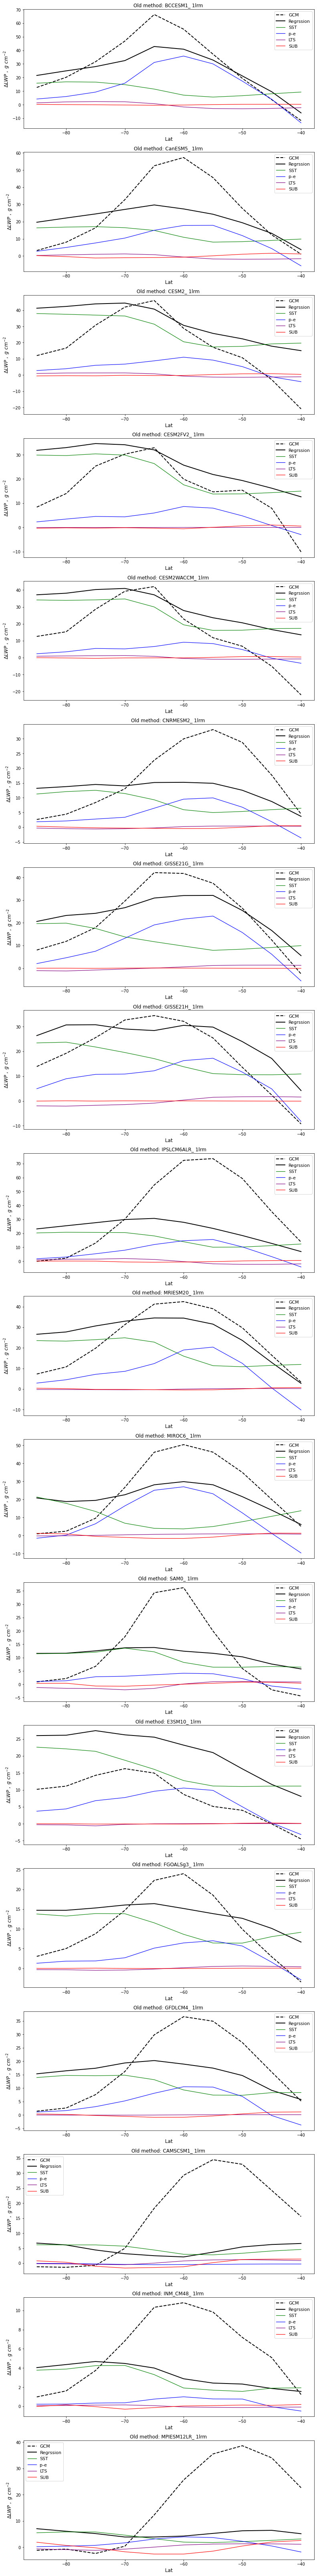

In [8]:
parameters = {'axes.labelsize': 12, 'legend.fontsize': 11, 
          'axes.titlesize': 12, 'xtick.labelsize':10, 'ytick.labelsize':10}
plt.rcParams.update(parameters)

fig81, ax81 = plt.subplots(18, 1, figsize=(13., 6.5*18.))
lat = np.arange(-85., -35., 5.)
for a in range(len(deck2)):
    
    ax81[a].plot(lat, dabrmeanpi_report[a,:], '--', c ='k', linewidth=2, label='GCM')
    ax81[a].plot(lat, dabrmeanpi_regrss[a,:], '-', c= 'k', linewidth=2, label='Regrssion')
    
    ax81[a].plot(lat, dX_dTg1[a,:,0]*stcoef1[a,0], '-', c= 'green', linewidth=1.2, label='SST')
    ax81[a].plot(lat, dX_dTg1[a,:,1]*stcoef1[a,1], '-', c= 'blue', linewidth=1.2, label='p-e')
    ax81[a].plot(lat, dX_dTg1[a,:,2]*stcoef1[a,2], '-', c= 'purple', linewidth=1.2, label='LTS')
    ax81[a].plot(lat, dX_dTg1[a,:,3]*stcoef1[a,3], '-', c= 'red', linewidth=1.2, label='SUB')
    
    ax81[a].set_xlabel(' Lat ') 
    ax81[a].set_ylabel(r"$ \Delta LWP \ $" + r"$,\ g\ cm^{-2}$")
    ax81[a].set_title("Old method: "+deck_nas2[a]+"_ 1lrm ")
    
    ax81[a].legend()


plt.show()
# plt.savefig("Latitude_structure(deltaLWP)_1lrm_Oldmethod", dpi= 300)

In [9]:
# method: after Marth 8th(Marth .15th)
## for 2-lrm:
abr_str_mon = 140*12
abr_end_mon = 150*12

dabrmeanpi_report_2lrm = full((len(deck2), 10), 0.000)
dabrmeanpi_regrss_2lrm = full((len(deck2), 10), 0.000)

for i in arange(len(deck_nas2)):
    
    for j in range(0, 10, 1):
        dabrmeanpi_report_2lrm[i,j] =  1000.*( nanmean(output_2lrm_mon_bin_abr[deck_nas2[i]]['LWP_mon_bin'][abr_str_mon:abr_end_mon,j,:]) - nanmean(output_2lrm_mon_bin_PI[deck_nas2[i]]['LWP_mon_bin'][:,j,:]) )
        dabrmeanpi_regrss_2lrm[i,j] =  1000.*( nanmean(output_2lrm_mon_bin_LWPpredi_abr[deck_nas2[i]][abr_str_mon:abr_end_mon,j,:]) - nanmean(output_2lrm_mon_bin_LWPpredi_PI[deck_nas2[i]][:, j,:])  )
        
# print(dabrmeanpi_regrss)
dabrmeanpi_individual_ccfsdriven = full((len(deck2), 10, 4), 0.00)

In [10]:
# mask all other regression factors(CCfs), only use One coefficient (ignore intercept):
## 2-lrm
CCF_driven_LWP_PI_2lrm = {}
CCF_driven_LWP_abr_2lrm = {}


for i in arange(len(deck2)):
    # PI
    ind1 = isnan(output_2lrm_flavra_PI[deck_nas2[i]]['LTS'])==False

    ind_true = nonzero(ind1==True)
    ind_false = nonzero(ind1==False)
    # TR_sub = 0.0
    
    
    #..Split data points with skin Temperature < / >=TR_sst and Subsidence500 <= / > TR_sub(upward motion / downward motion): 
    TR_sst = 0.0     # only for1-lrm

    # shape1 split into shape3(smaller.TR_sst & up)\shape4(larger.equal.TR_sst & up)\shape5(smaller.TR_sst & down)\shape7(larger.equal.TR_sst & down)
    ind_sst_le  = nonzero(output_2lrm_flavra_PI[deck_nas2[i]]['SST'] >= TR_sst)
    ind_sst_st  = nonzero(output_2lrm_flavra_PI[deck_nas2[i]]['SST'] <  TR_sst)

    # shape7:the intersection of places where has LTS value and skin_T < TR_sst & SUB500 <= TR_sub
    ind7  = intersect1d(ind_true, ind_sst_le)
    # print('shape7: ', ind7.shape)   #.. points, shape7
    # shape8:the intersection of places where LTS value and skin_T >= TR_sst & SUB500 <= TR_sub
    ind8 = intersect1d(ind_true, ind_sst_st)
    # print('shape8: ', ind8.shape)   #.. points, shape8
    
    # create an "eg " array tp store the value of LWP (first store the missing value)
    shape_mon_PI = output_2lrm_mon_bin_PI[deck_nas2[i]]['SST_mon_bin'].shape
    shape_fla_PI = output_2lrm_flavra_PI[deck_nas2[i]]['LWP'].shape
    
    eg = full((shape_fla_PI), 0.0)
    eg[ind_false]  =  output_2lrm_flavra_PI[deck_nas2[i]]['LWP'][ind_false]
    # ccf driven LWP for PI
    egccf1 = eg.copy()
    egccf2 = eg.copy()
    egccf3 = eg.copy()
    egccf4 = eg.copy()
    
    X1  = array([output_2lrm_flavra_PI[deck_nas2[i]]['SST'][ind7], output_2lrm_flavra_PI[deck_nas2[i]]['p_e'][ind7], 
                    output_2lrm_flavra_PI[deck_nas2[i]]['LTS'][ind7], output_2lrm_flavra_PI[deck_nas2[i]]['SUB'][ind7]])
    
    X2  = array([output_2lrm_flavra_PI[deck_nas2[i]]['SST'][ind8], output_2lrm_flavra_PI[deck_nas2[i]]['p_e'][ind8], 
                    output_2lrm_flavra_PI[deck_nas2[i]]['LTS'][ind8], output_2lrm_flavra_PI[deck_nas2[i]]['SUB'][ind8]])
    # print(X1.shape)
    
    eg7_sstdri = 1000.* array(coef1)[i,0] * X1[0,:]
    eg7_p_edri = 1000.* array(coef1)[i,1] * X1[1,:]
    eg7_ltsdri = 1000.* array(coef1)[i,2] * X1[2,:]
    eg7_subdri = 1000.* array(coef1)[i,3] * X1[3,:]
    # print(eg1_sstdri.shape)
    
    # no ind8 (sst < TR_SST data) 
    eg8_sstdri = 1000.* array(coef2)[i,0] * X2[0,:]
    eg8_p_edri = 1000.* array(coef2)[i,1] * X2[1,:]
    eg8_ltsdri = 1000.* array(coef2)[i,2] * X2[2,:]
    eg8_subdri = 1000.* array(coef2)[i,3] * X2[3,:]
    
    
    # PUT the regressed values of individual regrss factors:
    egccf1[ind7] =  eg7_sstdri
    egccf1[ind8] =  eg8_sstdri
    
    egccf2[ind7] =  eg7_p_edri
    egccf2[ind8] =  eg8_p_edri
    
    egccf3[ind7] =  eg7_ltsdri
    egccf3[ind8] =  eg8_ltsdri
    
    egccf4[ind7] =  eg7_subdri
    egccf4[ind8] =  eg8_subdri
    
    CCF_driven_LWP_PI_2lrm[deck_nas2[i]+'SST']  =  egccf1.reshape(shape_mon_PI)
    CCF_driven_LWP_PI_2lrm[deck_nas2[i]+'p_e']  =  egccf2.reshape(shape_mon_PI)
    CCF_driven_LWP_PI_2lrm[deck_nas2[i]+'LTS']  =  egccf3.reshape(shape_mon_PI)
    CCF_driven_LWP_PI_2lrm[deck_nas2[i]+'SUB']  =  egccf4.reshape(shape_mon_PI)


for j in arange(len(deck2)):
    # abr
    ind1_abr = isnan(output_2lrm_flavra_abr[deck_nas2[j]]['LTS'])==False

    ind_true_abr = nonzero(ind1_abr==True)
    ind_false_abr = nonzero(ind1_abr==False)
    # TR_sub = 0.0
    
    #..Split data points with skin Temperature < / >=TR_sst and Subsidence500 <= / > TR_sub(upward motion / downward motion): 
    

    # shape1 split into shape3(smaller.TR_sst & up)\shape4(larger.equal.TR_sst & up)\shape5(smaller.TR_sst & down)\shape7(larger.equal.TR_sst & down)
    ind_sst_le_abr  = nonzero(output_2lrm_flavra_abr[deck_nas2[j]]['SST'] >= TR_sst)
    ind_sst_st_abr  = nonzero(output_2lrm_flavra_abr[deck_nas2[j]]['SST'] <  TR_sst)

    # shape7:the intersection of places where has LTS value and skin_T < TR_sst & SUB500 <= TR_sub
    ind7_abr = intersect1d(ind_true_abr, ind_sst_le_abr)
    
    # shape8:the intersection of places where LTS value and skin_T >= TR_sst & SUB500 <= TR_sub
    ind8_abr = intersect1d(ind_true_abr, ind_sst_st_abr)
    # print(ind7_abr.shape, ind8_abr.shape )
    
    # create an "eg " arrayy tp store all the missing value of LWP
    shape_mon_abr = output_2lrm_mon_bin_abr[deck_nas2[j]]['SST_mon_bin'].shape
    shape_fla_abr = output_2lrm_flavra_abr[deck_nas2[j]]['LWP'].shape
    
    eg_abr = full((shape_fla_abr), 0.0)
    eg_abr[ind_false_abr]  =  output_2lrm_flavra_abr[deck_nas2[j]]['LWP'][ind_false_abr]
    # print(nanmean(eg_abr[ind_false_abr]), nanmean(output_2lrm_flavra_abr[deck_nas2[j]]['LWP'][ind_false_abr]))
    
    egccf1_abr = eg_abr.copy()
    egccf2_abr = eg_abr.copy()
    egccf3_abr = eg_abr.copy()
    egccf4_abr = eg_abr.copy()
    
    X1_abr  = array([output_2lrm_flavra_abr[deck_nas2[j]]['SST'][ind7_abr], output_2lrm_flavra_abr[deck_nas2[j]]['p_e'][ind7_abr], 
                    output_2lrm_flavra_abr[deck_nas2[j]]['LTS'][ind7_abr], output_2lrm_flavra_abr[deck_nas2[j]]['SUB'][ind7_abr]])
    
    X2_abr  = array([output_2lrm_flavra_abr[deck_nas2[j]]['SST'][ind8_abr], output_2lrm_flavra_abr[deck_nas2[j]]['p_e'][ind8_abr],
                    output_2lrm_flavra_abr[deck_nas2[j]]['LTS'][ind8_abr], output_2lrm_flavra_abr[deck_nas2[j]]['SUB'][ind8_abr]])
    # print(X1_abr.shape)
    
    eg7_sstdri_abr = 1000.* array(coef1)[j,0] * X1_abr[0,:]
    eg7_p_edri_abr = 1000.* array(coef1)[j,1] * X1_abr[1,:]
    eg7_ltsdri_abr = 1000.* array(coef1)[j,2] * X1_abr[2,:]
    eg7_subdri_abr = 1000.* array(coef1)[j,3] * X1_abr[3,:]
    # print(eg7_sstdri_abr.shape)
    
    # no ind8 (sst < TR_SST data) 
    eg8_sstdri_abr = 1000.* array(coef2)[j,0] * X2_abr[0,:]
    eg8_p_edri_abr = 1000.* array(coef2)[j,1] * X2_abr[1,:]
    eg8_ltsdri_abr = 1000.* array(coef2)[j,2] * X2_abr[2,:]
    eg8_subdri_abr = 1000.* array(coef2)[j,3] * X2_abr[3,:]
    
    # PUT the regressed values of individual regrss factors:
    
    egccf1_abr[ind7_abr] =  eg7_sstdri_abr
    egccf1_abr[ind8_abr] =  eg8_sstdri_abr
    
    egccf2_abr[ind7_abr] =  eg7_p_edri_abr
    egccf2_abr[ind8_abr] =  eg8_p_edri_abr
    
    egccf3_abr[ind7_abr] =  eg7_ltsdri_abr
    egccf3_abr[ind8_abr] =  eg8_ltsdri_abr
    
    egccf4_abr[ind7_abr] =  eg7_subdri_abr
    egccf4_abr[ind8_abr] =  eg8_subdri_abr
    
    # print(egccf1_abr)
    
    # cloud controlling factor explained LWP changes 
    CCF_driven_LWP_abr_2lrm[deck_nas2[j]+'SST']  =  egccf1_abr.reshape(shape_mon_abr)
    CCF_driven_LWP_abr_2lrm[deck_nas2[j]+'p_e']  =  egccf2_abr.reshape(shape_mon_abr)
    CCF_driven_LWP_abr_2lrm[deck_nas2[j]+'LTS']  =  egccf3_abr.reshape(shape_mon_abr)
    CCF_driven_LWP_abr_2lrm[deck_nas2[j]+'SUB']  =  egccf4_abr.reshape(shape_mon_abr)

In [11]:
# 2 lrm
# dabrmeanpi_individual_ccfsdriven = full((len(deck2), 10, 4), 0.00)

for i in arange(len(deck2)):
    
    for j in range( 0, 10, 1):
        
        dabrmeanpi_individual_ccfsdriven[i,j,0]  = nanmean(CCF_driven_LWP_abr_2lrm[deck_nas2[i] + 'SST'][abr_str_mon:abr_end_mon,j, :]) - nanmean(CCF_driven_LWP_PI_2lrm[deck_nas2[i] +'SST'][:, j, :])
        dabrmeanpi_individual_ccfsdriven[i,j,1]  = nanmean(CCF_driven_LWP_abr_2lrm[deck_nas2[i] + 'p_e'][abr_str_mon:abr_end_mon,j, :]) - nanmean(CCF_driven_LWP_PI_2lrm[deck_nas2[i] +'p_e'][:, j, :])
        dabrmeanpi_individual_ccfsdriven[i,j,2]  = nanmean(CCF_driven_LWP_abr_2lrm[deck_nas2[i] + 'LTS'][abr_str_mon:abr_end_mon,j, :]) - nanmean(CCF_driven_LWP_PI_2lrm[deck_nas2[i] +'LTS'][:, j, :])
        dabrmeanpi_individual_ccfsdriven[i,j,3]  = nanmean(CCF_driven_LWP_abr_2lrm[deck_nas2[i] + 'SUB'][abr_str_mon:abr_end_mon,j, :]) - nanmean(CCF_driven_LWP_PI_2lrm[deck_nas2[i] +'SUB'][:, j, :])


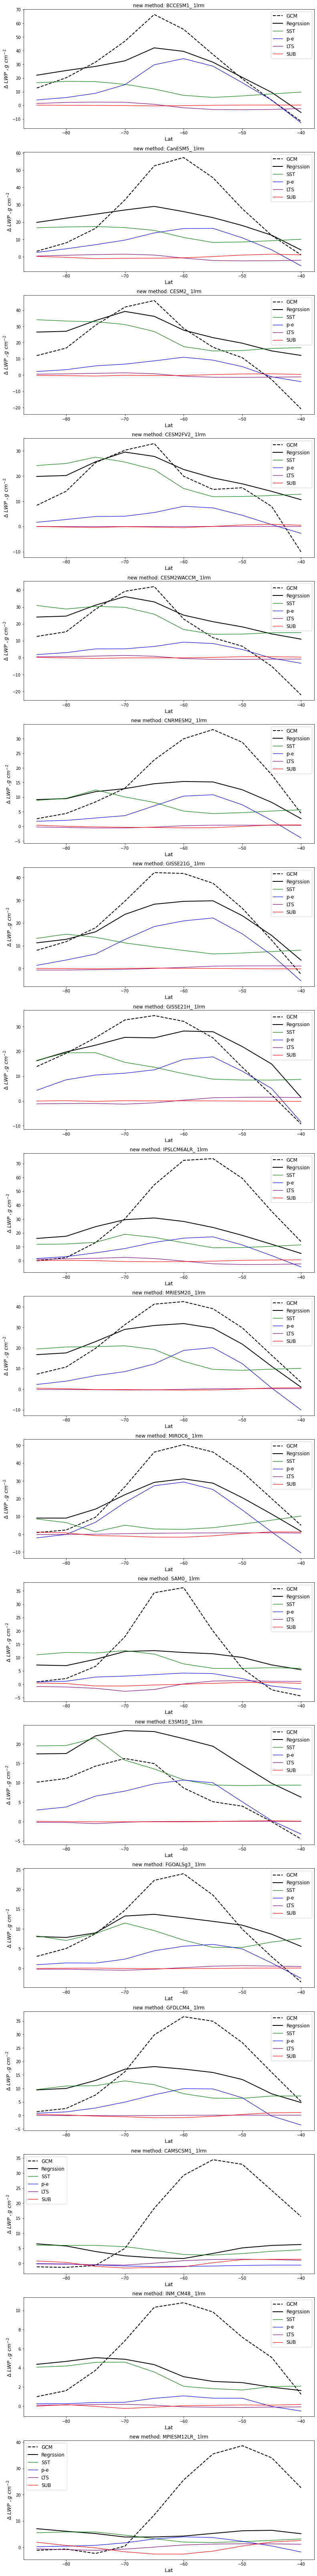

In [12]:
parameters = {'axes.labelsize': 13, 'legend.fontsize': 12, 
          'axes.titlesize': 12, 'xtick.labelsize':10, 'ytick.labelsize':10}

plt.rcParams.update(parameters)


fig82, ax82 =  plt.subplots(18, 1, figsize=(13, 6.5*18.))
lat = np.arange(-85., -35., 5.)

for a in range(len(deck2)):    
    
    ax82[a].plot(lat, dabrmeanpi_report_2lrm[a,:], '--', c ='k', linewidth=2, label='GCM')
    ax82[a].plot(lat, dabrmeanpi_regrss_2lrm[a,:], '-', c= 'k', linewidth=2, label='Regrssion')
    
    ax82[a].plot(lat, dabrmeanpi_individual_ccfsdriven[a,:,0], '-', c= 'green', linewidth=1.2, label='SST')
    ax82[a].plot(lat, dabrmeanpi_individual_ccfsdriven[a,:,1], '-', c= 'blue',  linewidth=1.2, label='p-e')
    ax82[a].plot(lat, dabrmeanpi_individual_ccfsdriven[a,:,2], '-', c= 'purple', linewidth=1.2, label='LTS')
    ax82[a].plot(lat, dabrmeanpi_individual_ccfsdriven[a,:,3], '-', c= 'red',  linewidth=1.2, label='SUB')
    
    ax82[a].set_xlabel(' Lat ') 
    ax82[a].set_ylabel(r"$ \Delta\ LWP \ ,$" +r"$g\ cm^{-2}$")
    ax82[a].set_title("new method: " + deck_nas2[a] +"_ 1lrm")
    
    ax82[a].legend()
    
plt.show()
# plt.savefig("Latitude_structure(deltaLWP)_1lrm_Newmethod", dpi= 300)

In [14]:
## PLot7: coefficient plot for bestK 4-lrm
# calc data (monthly) standard deviation:
coef3 =  []
coef4 =  []
coef5 =  []
coef6 =  []

stcoef3  = full((len(deck2), 4), 0)
stcoef4  = full((len(deck2), 4), 0)
stcoef5  = full((len(deck2), 4), 0)
stcoef6  = full((len(deck2), 4), 0)

itcp3 =  []
itcp4 =  []
itcp5 =  []
itcp6 =  []

# dX_dTg1  = full((len(deck2), 4), 0.000)
# dX_dTg2  = full((len(deck2), 4), 0.000)
# dX_dTg3  = full((len(deck2), 4), 0.000)
# dX_dTg4  = full((len(deck2), 4), 0.000)


# # true LWP response to warming, this array storaged the four regimes response:
# dX_dTg_modelresponse1 = full(len(deck2), 0.000)
# dX_dTg_modelresponse2 = full(len(deck2), 0.000)
# dX_dTg_modelresponse3 = full(len(deck2), 0.000)
# dX_dTg_modelresponse4 = full(len(deck2), 0.000)

# Retrieved the 4-lrm coefficients:
for j in range(len(deck2)):
    a_lt_up  = output_LRM_sstlt_up[deck_nas2[j]][0].copy()
    a_le_up  = output_LRM_sstle_up[deck_nas2[j]][0].copy()
    a_lt_dn  = output_LRM_sstlt_down[deck_nas2[j]][0].copy()
    a_le_dn  = output_LRM_sstle_down[deck_nas2[j]][0].copy()
    
    a0_lt_up  = output_LRM_sstlt_up[deck_nas2[j]][1]
    a0_le_up  = output_LRM_sstle_up[deck_nas2[j]][1]
    a0_lt_dn  = output_LRM_sstlt_down[deck_nas2[j]][1]
    a0_le_dn  = output_LRM_sstle_down[deck_nas2[j]][1]
    
    # print(m, t, e, f)
    coef3.append(a_lt_up)
    coef4.append(a_le_up)
    coef5.append(a_lt_dn)
    coef6.append(a_le_dn)
    
    itcp3.append(array(a0_lt_up))
    itcp4.append(array(a0_le_up))
    itcp5.append(array(a0_lt_dn))
    itcp6.append(array(a0_le_dn))

print(array(coef3))
print(array(coef4))
print(itcp6)

[[ 2.46647882e-03  5.12382489e-02 -7.43141375e-04  3.84128130e-01]
 [ 6.23297486e-04  9.79973203e-03 -2.80152903e-05  1.46506524e-01]
 [ 2.45166402e-03  1.02023602e-02 -3.96205850e-04  9.50482192e-02]
 [ 1.85528469e-03  5.47318147e-03 -1.70717458e-04  1.31066489e-01]
 [ 2.46351597e-03  9.55055731e-03 -3.66916855e-04  9.60016240e-02]
 [ 4.27458200e-04  6.35900135e-03  1.46176336e-04  2.58143617e-02]
 [ 2.35693177e-03  3.94646847e-02  4.98720082e-04  6.80373511e-02]
 [ 2.40268458e-03  4.21577063e-02  6.37188018e-04  6.19080180e-02]
 [ 3.87828314e-04  6.51844978e-03  2.66024587e-05  2.72498735e-02]
 [ 7.05721758e-04  2.40699316e-02  3.77302860e-04  9.49525940e-02]
 [ 7.62759889e-04  2.12937019e-02  3.24097269e-04  1.21681743e-01]
 [ 5.60898335e-04 -1.98941251e-04  4.03594087e-05  1.17527411e-01]
 [ 1.56493353e-03  9.97642508e-03  2.38498766e-04  4.78870066e-02]
 [ 1.17680347e-03  5.08037886e-03  8.67822449e-05  1.51128957e-03]
 [ 2.93882121e-04  7.89807763e-03  2.74584728e-05  4.77022864e

In [16]:
# method: after Marth 8th(Marth .15th)
## for 4-lrm:
abr_str_mon = 140*12

abr_end_mon = 150*12 

dabrmeanpi_report_4lrm = full((len(deck2), 10), 0.000)
dabrmeanpi_regrss_4lrm = full((len(deck2), 10), 0.000)

for i in arange(len(deck_nas2)):
    for j in range(0, 10, 1):
        
        dabrmeanpi_report_4lrm[i,j] = 1000.*(nanmean(output_4lrm_mon_bin_abr[deck_nas2[i]]['LWP_mon_bin'][abr_str_mon:abr_end_mon,j,:]) 
                                             - nanmean(output_4lrm_mon_bin_PI[deck_nas2[i]]['LWP_mon_bin'][:,j,:]))
        
        dabrmeanpi_regrss_4lrm[i,j]  = 1000.*(nanmean(output_4lrm_mon_bin_LWPpredi_abr[deck_nas2[i]][abr_str_mon:abr_end_mon,j,:]) 
                                              - nanmean(output_4lrm_mon_bin_LWPpredi_PI[deck_nas2[i]][:, j,:]))

In [59]:
# mask all other regression factors(CCfs), only use One coefficient (ignore intercept):
## 4-lrm
dabrmeanpi_indi_ccfsdriven_4lrm = full((len(deck2), 10, 4), 0.00)

CCF_driven_LWP_PI_4lrm = {}
CCF_driven_LWP_abr_4lrm = {}

for i in arange(len(deck2)):
    # PI
    
    ind1_4lrm = isnan(output_4lrm_flavra_PI[deck_nas2[i]]['LTS'])==False
    ind_true_4lrm = nonzero(ind1_4lrm==True)
    ind_false_4lrm = nonzero(ind1_4lrm==False)
    
    
    ## TR_sst, TR_sub
    
    folder_4lrm =  glob.glob(path1+deck2[i]['modn']+'_best(test5)fit_'+'*K'+'_ud'+'*'+'_dats.npz')
    #print(folder_4lrm)
    index_st_sst = folder_4lrm[0].index('fit') +4
    index_ed_sst = folder_4lrm[0].index('K')
    # print(list(folder_4lrm[0])[index_st_sst], list(folder_4lrm[0])[index_ed_sst])
    
    index_st_sub  = folder_4lrm[0].index('_ud') +3
    index_ed_sub  = folder_4lrm[0].index('_dats')
    TR_sst = float(str(folder_4lrm[0])[index_st_sst:index_ed_sst])
    TR_sub = float(str(round(float(str(folder_4lrm[0][index_st_sub:index_ed_sub])) *0.01, 5)))
    
    
    #..Split data points with skin Temperature < / >=TR_sst and Subsidence500 <= / > TR_sub(upward motion / downward motion): 
    
    # shape1 split into shape3(smaller.TR_sst & up)\shape4(larger.equal.TR_sst & up)\shape5(smaller.TR_sst & down)\shape7(larger.equal.TR_sst & down)
    ind_sstlt_up =  nonzero((output_4lrm_flavra_PI[deck_nas2[i]]['SST'] < TR_sst) & (output_4lrm_flavra_PI[deck_nas2[i]]['SUB'] <= TR_sub))
    ind_sstle_up =  nonzero((output_4lrm_flavra_PI[deck_nas2[i]]['SST'] >= TR_sst) & (output_4lrm_flavra_PI[deck_nas2[i]]['SUB']<= TR_sub))
    ind_sstlt_dw  = nonzero((output_4lrm_flavra_PI[deck_nas2[i]]['SST'] < TR_sst) &  (output_4lrm_flavra_PI[deck_nas2[i]]['SUB']> TR_sub))
    ind_sstle_dw  = nonzero((output_4lrm_flavra_PI[deck_nas2[i]]['SST'] >= TR_sst) & (output_4lrm_flavra_PI[deck_nas2[i]]['SUB']> TR_sub))
    
    
    # shape7:the intersection of places where has LTS value and skin_T < TR_sst & SUB500 <= TR_sub
    ind7  = intersect1d(ind_true_4lrm, ind_sstlt_up)
    
    # shape8:the intersection of places where LTS value and skin_T >= TR_sst & SUB500 <= TR_sub
    ind8 = intersect1d(ind_true_4lrm, ind_sstle_up)
    
    # shape9:the intersection of places where has LTS value and skin_T < TR_sst & SUB500 > TR_sub
    ind9  = intersect1d(ind_true_4lrm, ind_sstlt_dw)
    
    # shape10:the intersection of places where LTS value and skin_T >= TR_sst & SUB500 > TR_sub                                                                         
    ind10 =  intersect1d(ind_true_4lrm, ind_sstle_dw)
    # print(ind7.shape, ind8.shape, ind9.shape, ind10.shape)
    
    
    # create an "eg " array tp store the value of LWP (first store the missing value)
    shape_mon_PI = output_4lrm_mon_bin_PI[deck_nas2[i]]['SST_mon_bin'].shape
    shape_fla_PI = output_4lrm_flavra_PI[deck_nas2[i]]['LWP'].shape
    
    eg = full((shape_fla_PI), 0.0)
    eg[ind_false]  =  output_4lrm_flavra_PI[deck_nas2[i]]['LWP'][ind_false]
    
    
    egccf1 = eg.copy()
    egccf2 = eg.copy()
    egccf3 = eg.copy()
    egccf4 = eg.copy()
    
    X1  = array([output_4lrm_flavra_PI[deck_nas2[i]]['SST'][ind7], output_4lrm_flavra_PI[deck_nas2[i]]['p_e'][ind7], 
                    output_4lrm_flavra_PI[deck_nas2[i]]['LTS'][ind7], output_4lrm_flavra_PI[deck_nas2[i]]['SUB'][ind7]])
    
    X2  = array([output_4lrm_flavra_PI[deck_nas2[i]]['SST'][ind8], output_4lrm_flavra_PI[deck_nas2[i]]['p_e'][ind8], 
                    output_4lrm_flavra_PI[deck_nas2[i]]['LTS'][ind8], output_4lrm_flavra_PI[deck_nas2[i]]['SUB'][ind8]])
    
    X3  = array([output_4lrm_flavra_PI[deck_nas2[i]]['SST'][ind9], output_4lrm_flavra_PI[deck_nas2[i]]['p_e'][ind9], 
                    output_4lrm_flavra_PI[deck_nas2[i]]['LTS'][ind9], output_4lrm_flavra_PI[deck_nas2[i]]['SUB'][ind9]])
    
    X4  = array([output_4lrm_flavra_PI[deck_nas2[i]]['SST'][ind10], output_4lrm_flavra_PI[deck_nas2[i]]['p_e'][ind10], 
                     output_4lrm_flavra_PI[deck_nas2[i]]['LTS'][ind10], output_4lrm_flavra_PI[deck_nas2[i]]['SUB'][ind10]] )
    
    
    eg7_sstdri = 1000.* (array(coef3)[i,0] * X1[0,:])
    eg7_p_edri = 1000.* (array(coef3)[i,1] * X1[1,:])
    eg7_ltsdri = 1000.* (array(coef3)[i,2] * X1[2,:])
    eg7_subdri = 1000.* (array(coef3)[i,3] * X1[3,:])
    # print(eg7_sstdri)
    
    eg8_sstdri = 1000.* (array(coef4)[i,0] * X2[0,:])
    # print(1000.*(array(coef4)[i,0]* X2[0,:]))
    eg8_p_edri = 1000.* (array(coef4)[i,1] * X2[1,:])
    eg8_ltsdri = 1000.* (array(coef4)[i,2] * X2[2,:])
    eg8_subdri = 1000.* (array(coef4)[i,3] * X2[3,:])
    
    eg9_sstdri = 1000.* (array(coef5)[i,0] * X3[0,:])
    eg9_p_edri = 1000.* (array(coef5)[i,1] * X3[1,:])
    eg9_ltsdri = 1000.* (array(coef5)[i,2] * X3[2,:])
    eg9_subdri = 1000.* (array(coef5)[i,3] * X3[3,:])
    
    eg10_sstdri = 1000.* (array(coef6)[i,0] * X4[0,:])
    eg10_p_edri = 1000.* (array(coef6)[i,1] * X4[1,:])
    eg10_ltsdri = 1000.* (array(coef6)[i,2] * X4[2,:])
    eg10_subdri = 1000.* (array(coef6)[i,3] * X4[3,:])
    
    
    # PUT the regressed values of individual regrss factors:
    egccf1[ind7] =  eg7_sstdri
    egccf1[ind8] =  eg8_sstdri
    egccf1[ind9] =  eg9_sstdri
    egccf1[ind10] = eg10_sstdri
    
    egccf2[ind7] =  eg7_p_edri
    egccf2[ind8] =  eg8_p_edri
    egccf2[ind9] =  eg9_p_edri
    egccf2[ind10]=  eg10_p_edri
    
    egccf3[ind7] =  eg7_ltsdri
    egccf3[ind8] =  eg8_ltsdri
    egccf3[ind9] =  eg9_ltsdri
    egccf3[ind10]=  eg10_ltsdri
    
    egccf4[ind7] =  eg7_subdri
    egccf4[ind8] =  eg8_subdri
    egccf4[ind9] =  eg9_subdri
    egccf4[ind10] = eg10_subdri
    
    # print(shape_mon_PI)
    CCF_driven_LWP_PI_4lrm[deck_nas2[i]+'SST']  =  egccf1.reshape(shape_mon_PI)
    CCF_driven_LWP_PI_4lrm[deck_nas2[i]+'p_e']  =  egccf2.reshape(shape_mon_PI)
    CCF_driven_LWP_PI_4lrm[deck_nas2[i]+'LTS']  =  egccf3.reshape(shape_mon_PI)
    CCF_driven_LWP_PI_4lrm[deck_nas2[i]+'SUB']  =  egccf4.reshape(shape_mon_PI)


    # abr
    ind1_4lrm_abr = isnan(output_4lrm_flavra_abr[deck_nas2[i]]['LTS'])==False
    ind_true_4lrm_abr = nonzero(ind1_4lrm_abr==True)
    ind_false_4lrm_abr = nonzero(ind1_4lrm_abr==False)
    

    #..Split data points with skin Temperature < / >=TR_sst and Subsidence500 <= / > TR_sub(upward motion / downward motion): 
    # shape1 split into shape3(smaller.TR_sst & up)\shape4(larger.equal.TR_sst & up)\shape5(smaller.TR_sst & down)\shape7(larger.equal.TR_sst & down)
    ind_sstlt_up_abr =  nonzero((output_4lrm_flavra_abr[deck_nas2[i]]['SST'] < TR_sst) & (output_4lrm_flavra_abr[deck_nas2[i]]['SUB'] <= TR_sub))
    ind_sstle_up_abr =  nonzero((output_4lrm_flavra_abr[deck_nas2[i]]['SST'] >= TR_sst) & (output_4lrm_flavra_abr[deck_nas2[i]]['SUB']<= TR_sub))
    ind_sstlt_dw_abr  = nonzero((output_4lrm_flavra_abr[deck_nas2[i]]['SST'] < TR_sst) &  (output_4lrm_flavra_abr[deck_nas2[i]]['SUB']> TR_sub))
    ind_sstle_dw_abr  = nonzero((output_4lrm_flavra_abr[deck_nas2[i]]['SST'] >= TR_sst) & (output_4lrm_flavra_abr[deck_nas2[i]]['SUB']> TR_sub))
    
    # shape7:the intersection of places where has LTS value and skin_T < TR_sst & SUB500 <= TR_sub
    ind7_abr  = intersect1d(ind_true_4lrm_abr, ind_sstlt_up_abr)
    
    # shape8:the intersection of places where LTS value and skin_T >= TR_sst & SUB500 <= TR_sub
    ind8_abr = intersect1d(ind_true_4lrm_abr, ind_sstle_up_abr)
    
    # shape9:the intersection of places where has LTS value and skin_T < TR_sst & SUB500 > TR_sub
    ind9_abr  = intersect1d(ind_true_4lrm_abr, ind_sstlt_dw_abr)
    
    # shape10:the intersection of places where LTS value and skin_T >= TR_sst & SUB500 > TR_sub                                                                         
    ind10_abr =  intersect1d(ind_true_4lrm_abr, ind_sstle_dw_abr)
    # print(ind7_abr.shape, ind8_abr.shape, ind9_abr.shape, ind10_abr.shape)
    
    X1_abr  = array([output_4lrm_flavra_abr[deck_nas2[i]]['SST'][ind7_abr], output_4lrm_flavra_abr[deck_nas2[i]]['p_e'][ind7_abr], 
                    output_4lrm_flavra_abr[deck_nas2[i]]['LTS'][ind7_abr], output_4lrm_flavra_abr[deck_nas2[i]]['SUB'][ind7_abr]])
    
    X2_abr  = array([output_4lrm_flavra_abr[deck_nas2[i]]['SST'][ind8_abr], output_4lrm_flavra_abr[deck_nas2[i]]['p_e'][ind8_abr],
                    output_4lrm_flavra_abr[deck_nas2[i]]['LTS'][ind8_abr], output_4lrm_flavra_abr[deck_nas2[i]]['SUB'][ind8_abr]])
    
    X3_abr  = array([output_4lrm_flavra_abr[deck_nas2[i]]['SST'][ind9_abr], output_4lrm_flavra_abr[deck_nas2[i]]['p_e'][ind9_abr], 
                    output_4lrm_flavra_abr[deck_nas2[i]]['LTS'][ind9_abr], output_4lrm_flavra_abr[deck_nas2[i]]['SUB'][ind9_abr]])
    
    X4_abr  = array([output_4lrm_flavra_abr[deck_nas2[i]]['SST'][ind10_abr], output_4lrm_flavra_abr[deck_nas2[i]]['p_e'][ind10_abr],
                    output_4lrm_flavra_abr[deck_nas2[i]]['LTS'][ind10_abr], output_4lrm_flavra_abr[deck_nas2[i]]['SUB'][ind10_abr]])
    
    # create an "eg " arrayy tp store all the missing value of LWP
    
    shape_mon_abr = output_4lrm_mon_bin_abr[deck_nas2[i]]['SST_mon_bin'].shape
    shape_fla_abr = output_4lrm_flavra_abr[deck_nas2[i]]['LWP'].shape
    
    eg_abr = full((shape_fla_abr), 0.0)
    eg_abr[ind_false_abr]  =  output_4lrm_flavra_abr[deck_nas2[i]]['LWP'][ind_false_abr]
    
    egccf1_abr = eg_abr.copy()
    egccf2_abr = eg_abr.copy()
    egccf3_abr = eg_abr.copy()
    egccf4_abr = eg_abr.copy()
    
    
    eg7_sstdri_abr = 1000.* (array(coef3)[i,0] * X1_abr[0,:])
    eg7_p_edri_abr = 1000.* (array(coef3)[i,1] * X1_abr[1,:])
    eg7_ltsdri_abr = 1000.* (array(coef3)[i,2] * X1_abr[2,:])
    eg7_subdri_abr = 1000.* (array(coef3)[i,3] * X1_abr[3,:])
    
    
    eg8_sstdri_abr = 1000.* (array(coef4)[i,0] * X2_abr[0,:])
    eg8_p_edri_abr = 1000.* (array(coef4)[i,1] * X2_abr[1,:])
    eg8_ltsdri_abr = 1000.* (array(coef4)[i,2] * X2_abr[2,:])
    eg8_subdri_abr = 1000.* (array(coef4)[i,3] * X2_abr[3,:])
    # print(eg8_sstdri_abr)

    
    eg9_sstdri_abr = 1000.* (array(coef5)[i,0] * X3_abr[0,:])
    eg9_p_edri_abr = 1000.* (array(coef5)[i,1] * X3_abr[1,:])
    eg9_ltsdri_abr = 1000.* (array(coef5)[i,2] * X3_abr[2,:])
    eg9_subdri_abr = 1000.* (array(coef5)[i,3] * X3_abr[3,:])
    
    eg10_sstdri_abr = 1000.* (array(coef6)[i,0] * X4_abr[0,:])
    eg10_p_edri_abr = 1000.* (array(coef6)[i,1] * X4_abr[1,:])
    eg10_ltsdri_abr = 1000.* (array(coef6)[i,2] * X4_abr[2,:])
    eg10_subdri_abr = 1000.* (array(coef6)[i,3] * X4_abr[3,:])
    # print(eg10_sstdri_abr.shape)
    
    
    # PUT the regressed values of individual regrssed factors:
    egccf1_abr[ind7_abr] =  eg7_sstdri_abr
    egccf1_abr[ind8_abr] =  eg8_sstdri_abr
    egccf1_abr[ind9_abr] =  eg9_sstdri_abr
    egccf1_abr[ind10_abr] = eg10_sstdri_abr
    
    egccf2_abr[ind7_abr] =  eg7_p_edri_abr
    egccf2_abr[ind8_abr] =  eg8_p_edri_abr
    egccf2_abr[ind9_abr] =  eg9_p_edri_abr
    egccf2_abr[ind10_abr]=  eg10_p_edri_abr
    
    egccf3_abr[ind7_abr] =  eg7_ltsdri_abr
    egccf3_abr[ind8_abr] =  eg8_ltsdri_abr
    egccf3_abr[ind9_abr] =  eg9_ltsdri_abr
    egccf3_abr[ind10_abr]=  eg10_ltsdri_abr
    
    egccf4_abr[ind7_abr] =  eg7_subdri_abr
    egccf4_abr[ind8_abr] =  eg8_subdri_abr
    egccf4_abr[ind9_abr] =  eg9_subdri_abr
    egccf4_abr[ind10_abr] =  eg10_subdri_abr
    
    # cloud controlling factor explained LWP changes
    
    # print(shape_mon_abr)
    CCF_driven_LWP_abr_4lrm[deck_nas2[i]+'SST']  =  egccf1_abr.reshape(shape_mon_abr)
    CCF_driven_LWP_abr_4lrm[deck_nas2[i]+'p_e']  =  egccf2_abr.reshape(shape_mon_abr)
    CCF_driven_LWP_abr_4lrm[deck_nas2[i]+'LTS']  =  egccf3_abr.reshape(shape_mon_abr)
    CCF_driven_LWP_abr_4lrm[deck_nas2[i]+'SUB']  =  egccf4_abr.reshape(shape_mon_abr)

# d ABR- PI LWP changes drivened by individual CCF
for i in arange(len(deck_nas2)):
    

    dabrmeanpi_indi_ccfsdriven_4lrm[i,:,0] = nanmean(CCF_driven_LWP_abr_4lrm[deck_nas2[i] + 'SST'][abr_str_mon:abr_end_mon, :,:], axis=(0,2))
    dabrmeanpi_indi_ccfsdriven_4lrm[i,:,1] = nanmean(CCF_driven_LWP_abr_4lrm[deck_nas2[i] + 'p_e'][abr_str_mon:abr_end_mon, :,:], axis=(0,2))
    dabrmeanpi_indi_ccfsdriven_4lrm[i,:,2] = nanmean(CCF_driven_LWP_abr_4lrm[deck_nas2[i] + 'LTS'][abr_str_mon:abr_end_mon, :,:], axis=(0,2))
    dabrmeanpi_indi_ccfsdriven_4lrm[i,:,3] = nanmean(CCF_driven_LWP_abr_4lrm[deck_nas2[i] + 'SUB'][abr_str_mon:abr_end_mon, :,:], axis=(0,2))


print(dabrmeanpi_indi_ccfsdriven_4lrm[:,:,0])

[[  338.71987618   327.1968644    296.1197617    194.80743104
    -34.34792381  -261.43893073  -235.15195042  -158.83233543
    -81.87616895   -22.83658407]
 [  107.76671838   144.06449004   277.30713618   518.91301156
    910.46478892  1114.54329325  1121.92337385  1125.44930554
   1126.78371389  1133.47329882]
 [  345.18166614   258.99037935   137.17328261  -252.57171102
   -772.21040745 -1103.33593685 -1102.52139556 -1082.96173632
  -1060.5322095  -1049.44549502]
 [  233.79448515   192.25401101   108.78498655   -25.50529289
   -272.63715246  -486.78070133  -485.57426178  -470.2895304
   -447.40115245  -416.99631183]
 [  342.22096326   272.52820723   162.93244036  -219.71717026
   -732.94930423 -1109.25589364 -1107.24127675 -1084.85927754
  -1059.7347376  -1045.12975672]
 [  126.96846968   187.51798043   341.3933071    505.46919067
    706.3695045    718.2798882    720.70851974   722.28666038
    725.4648305    733.18727681]
 [  311.64238613   306.46786138   285.85233109   255.106380

In [48]:
CCF_driven_LWP_abr_4lrm = {}

for i in arange(len(deck_nas2)):
    # PI
    ind1_4lrm = isnan(output_4lrm_flavra_PI[deck_nas2[j]]['LTS'])==False
    ind_true_4lrm = nonzero(ind1_4lrm==True)
    ind_false_4lrm = nonzero(ind1_4lrm==False)
    
    
    ## TR_sst, TR_sub
    
    folder_4lrm =  glob.glob(path1+deck2[i]['modn']+'_best(test5)fit_'+'*K'+'_ud'+'*'+'_dats.npz')
    #print(folder_4lrm)
    index_st_sst = folder_4lrm[0].index('fit') +4
    index_ed_sst = folder_4lrm[0].index('K')
    # print(list(folder_4lrm[0])[index_st_sst], list(folder_4lrm[0])[index_ed_sst])
    
    index_st_sub  = folder_4lrm[0].index('_ud') +3
    index_ed_sub  = folder_4lrm[0].index('_dats')
    TR_sst = float(str(folder_4lrm[0])[index_st_sst:index_ed_sst])
    TR_sub = float(str(round(float(str(folder_4lrm[0][index_st_sub:index_ed_sub])) *0.01, 5)))
    
    
    #..Split data points with skin Temperature < / >=TR_sst and Subsidence500 <= / > TR_sub(upward motion / downward motion): 
    
    # shape1 split into shape3(smaller.TR_sst & up)\shape4(larger.equal.TR_sst & up)\shape5(smaller.TR_sst & down)\shape7(larger.equal.TR_sst & down)
    ind_sstlt_up =  nonzero((output_4lrm_flavra_PI[deck_nas2[i]]['SST'] < TR_sst) & (output_4lrm_flavra_PI[deck_nas2[i]]['SUB'] <= TR_sub))
    ind_sstle_up =  nonzero((output_4lrm_flavra_PI[deck_nas2[i]]['SST'] >= TR_sst) & (output_4lrm_flavra_PI[deck_nas2[i]]['SUB']<= TR_sub))
    ind_sstlt_dw  = nonzero((output_4lrm_flavra_PI[deck_nas2[i]]['SST'] < TR_sst) &  (output_4lrm_flavra_PI[deck_nas2[i]]['SUB']> TR_sub))
    ind_sstle_dw  = nonzero((output_4lrm_flavra_PI[deck_nas2[i]]['SST'] >= TR_sst) & (output_4lrm_flavra_PI[deck_nas2[i]]['SUB']> TR_sub))
    
    
    # shape7:the intersection of places where has LTS value and skin_T < TR_sst & SUB500 <= TR_sub
    ind7  = intersect1d(ind_true_4lrm, ind_sstlt_up)
    
    # shape8:the intersection of places where LTS value and skin_T >= TR_sst & SUB500 <= TR_sub
    ind8 = intersect1d(ind_true_4lrm, ind_sstle_up)
    
    # shape9:the intersection of places where has LTS value and skin_T < TR_sst & SUB500 > TR_sub
    ind9  = intersect1d(ind_true_4lrm, ind_sstlt_dw)
    
    # shape10:the intersection of places where LTS value and skin_T >= TR_sst & SUB500 > TR_sub                                                                         
    ind10 =  intersect1d(ind_true_4lrm, ind_sstle_dw)
    # print(ind7.shape, ind8.shape, ind9.shape, ind10.shape)
    
    
    # create an "eg " array tp store the value of LWP (first store the missing value)
    shape_mon_PI = output_4lrm_mon_bin_PI[deck_nas2[i]]['SST_mon_bin'].shape
    shape_fla_PI = output_4lrm_flavra_PI[deck_nas2[i]]['LWP'].shape
    
    
    X1  = array([output_4lrm_flavra_PI[deck_nas2[i]]['SST'][ind7], output_4lrm_flavra_PI[deck_nas2[i]]['p_e'][ind7], 
                    output_4lrm_flavra_PI[deck_nas2[i]]['LTS'][ind7], output_4lrm_flavra_PI[deck_nas2[i]]['SUB'][ind7]])
    
    X2  = array([output_4lrm_flavra_PI[deck_nas2[i]]['SST'][ind8], output_4lrm_flavra_PI[deck_nas2[i]]['p_e'][ind8], 
                    output_4lrm_flavra_PI[deck_nas2[i]]['LTS'][ind8], output_4lrm_flavra_PI[deck_nas2[i]]['SUB'][ind8]])
    
    X3  = array([output_4lrm_flavra_PI[deck_nas2[i]]['SST'][ind9], output_4lrm_flavra_PI[deck_nas2[i]]['p_e'][ind9], 
                    output_4lrm_flavra_PI[deck_nas2[i]]['LTS'][ind9], output_4lrm_flavra_PI[deck_nas2[i]]['SUB'][ind9]])
    
    X4  = array([output_4lrm_flavra_PI[deck_nas2[i]]['SST'][ind10], output_4lrm_flavra_PI[deck_nas2[i]]['p_e'][ind10], 
                 output_4lrm_flavra_PI[deck_nas2[i]]['LTS'][ind10], output_4lrm_flavra_PI[deck_nas2[i]]['SUB'][ind10]] )
    
    # abr
    
    ind1_4lrm_abr = isnan(output_4lrm_flavra_abr[deck_nas2[i]]['LTS'])==False
    ind_true_4lrm_abr = nonzero(ind1_4lrm_abr==True)
    ind_false_4lrm_abr = nonzero(ind1_4lrm_abr==False)
    

    #..Split data points with skin Temperature < / >=TR_sst and Subsidence500 <= / > TR_sub(upward motion / downward motion): 
    # shape1 split into shape3(smaller.TR_sst & up)\shape4(larger.equal.TR_sst & up)\shape5(smaller.TR_sst & down)\shape7(larger.equal.TR_sst & down)
    ind_sstlt_up_abr =  nonzero((output_4lrm_flavra_abr[deck_nas2[i]]['SST'] < TR_sst) & (output_4lrm_flavra_abr[deck_nas2[i]]['SUB'] <= TR_sub))
    ind_sstle_up_abr =  nonzero((output_4lrm_flavra_abr[deck_nas2[i]]['SST'] >= TR_sst) & (output_4lrm_flavra_abr[deck_nas2[i]]['SUB']<= TR_sub))
    ind_sstlt_dw_abr  = nonzero((output_4lrm_flavra_abr[deck_nas2[i]]['SST'] < TR_sst) &  (output_4lrm_flavra_abr[deck_nas2[i]]['SUB']> TR_sub))
    ind_sstle_dw_abr  = nonzero((output_4lrm_flavra_abr[deck_nas2[i]]['SST'] >= TR_sst) & (output_4lrm_flavra_abr[deck_nas2[i]]['SUB']> TR_sub))
    
    
    # shape7:the intersection of places where has LTS value and skin_T < TR_sst & SUB500 <= TR_sub
    ind7_abr  = intersect1d(ind_true_4lrm_abr, ind_sstlt_up_abr)
    
    # shape8:the intersection of places where LTS value and skin_T >= TR_sst & SUB500 <= TR_sub
    ind8_abr = intersect1d(ind_true_4lrm_abr, ind_sstle_up_abr)
    
    # shape9:the intersection of places where has LTS value and skin_T < TR_sst & SUB500 > TR_sub
    ind9_abr  = intersect1d(ind_true_4lrm_abr, ind_sstlt_dw_abr)
    
    # shape10:the intersection of places where LTS value and skin_T >= TR_sst & SUB500 > TR_sub                                                                         
    ind10_abr =  intersect1d(ind_true_4lrm_abr, ind_sstle_dw_abr)
    
    
    
    X1_abr  = array([output_4lrm_flavra_abr[deck_nas2[i]]['SST'][ind7_abr], output_4lrm_flavra_abr[deck_nas2[i]]['p_e'][ind7_abr], 
                    output_4lrm_flavra_abr[deck_nas2[i]]['LTS'][ind7_abr], output_4lrm_flavra_abr[deck_nas2[i]]['SUB'][ind7_abr]])
    
    X2_abr  = array([output_4lrm_flavra_abr[deck_nas2[i]]['SST'][ind8_abr], output_4lrm_flavra_abr[deck_nas2[i]]['p_e'][ind8_abr],
                    output_4lrm_flavra_abr[deck_nas2[i]]['LTS'][ind8_abr], output_4lrm_flavra_abr[deck_nas2[i]]['SUB'][ind8_abr]])
    
    X3_abr  = array([output_4lrm_flavra_abr[deck_nas2[i]]['SST'][ind9_abr], output_4lrm_flavra_abr[deck_nas2[i]]['p_e'][ind9_abr], 
                    output_4lrm_flavra_abr[deck_nas2[i]]['LTS'][ind9_abr], output_4lrm_flavra_abr[deck_nas2[i]]['SUB'][ind9_abr]])
    
    X4_abr  = array([output_4lrm_flavra_abr[deck_nas2[i]]['SST'][ind10_abr], output_4lrm_flavra_abr[deck_nas2[i]]['p_e'][ind10_abr],
                    output_4lrm_flavra_abr[deck_nas2[i]]['LTS'][ind10_abr], output_4lrm_flavra_abr[deck_nas2[i]]['SUB'][ind10_abr]])
    
    
    # create an "eg " arrayy tp store all the missing value of LWP
    shape_mon_abr = output_4lrm_mon_bin_abr[deck_nas2[i]]['SST_mon_bin'].shape
    shape_fla_abr = output_4lrm_flavra_abr[deck_nas2[i]]['LWP'].shape
    
    eg_abr = full((shape_fla_abr), 0.0)
    eg_abr[ind_false_abr]  =  output_4lrm_flavra_abr[deck_nas2[i]]['LWP'][ind_false_abr]
    # print(nanmean(eg_abr[ind_false_abr]), nanmean(output_2lrm_flavra_abr[deck_nas2[j]]['LWP'][ind_false_abr]))
    
    egccf1_abr = eg_abr.copy()
    egccf2_abr = eg_abr.copy()
    egccf3_abr = eg_abr.copy()
    egccf4_abr = eg_abr.copy()
    
    dLWP_sstdri1 = 1000.* (array(coef3)[i,0] * (X1_abr[0,:]- nanmean(X1[0,:])))
    dLWP_p_edri1 = 1000.* (array(coef3)[i,1] * (X1_abr[1,:]- nanmean(X1[1,:])))
    dLWP_ltsdri1 = 1000.* (array(coef3)[i,2] * (X1_abr[2,:]- nanmean(X1[2,:])))
    dLWP_subdri1 = 1000.* (array(coef3)[i,3] * (X1_abr[3,:]- nanmean(X1[3,:])))
    
    dLWP_sstdri2 = 1000.* (array(coef4)[i,0] * (X2_abr[0,:]- nanmean(X2[0,:])))
    dLWP_p_edri2 = 1000.* (array(coef4)[i,1] * (X2_abr[1,:]- nanmean(X2[1,:])))
    dLWP_ltsdri2 = 1000.* (array(coef4)[i,2] * (X2_abr[2,:]- nanmean(X2[2,:])))
    dLWP_subdri2 = 1000.* (array(coef4)[i,3] * (X2_abr[3,:]- nanmean(X2[3,:])))
    
    dLWP_sstdri3 = 1000.* (array(coef5)[i,0] * (X3_abr[0,:]- nanmean(X3[0,:])))
    dLWP_p_edri3 = 1000.* (array(coef5)[i,1] * (X3_abr[1,:]- nanmean(X3[1,:])))
    dLWP_ltsdri3 = 1000.* (array(coef5)[i,2] * (X3_abr[2,:]- nanmean(X3[2,:])))
    dLWP_subdri3 = 1000.* (array(coef5)[i,3] * (X3_abr[3,:]- nanmean(X3[3,:])))
    
    
    dLWP_sstdri4 = 1000.* (array(coef6)[i,0] * (X4_abr[0,:]- nanmean(X4[0,:])))
    dLWP_p_edri4 = 1000.* (array(coef6)[i,1] * (X4_abr[1,:]- nanmean(X4[1,:])))
    dLWP_ltsdri4 = 1000.* (array(coef6)[i,2] * (X4_abr[2,:]- nanmean(X4[2,:])))
    dLWP_subdri4 = 1000.* (array(coef6)[i,3] * (X4_abr[3,:]- nanmean(X4[3,:])))

    egccf1_abr[ind7_abr] =  dLWP_sstdri1
    egccf1_abr[ind8_abr] =  dLWP_sstdri2
    egccf1_abr[ind9_abr] =  dLWP_sstdri3
    egccf1_abr[ind10_abr] = dLWP_sstdri4
    print(egccf1_abr)
    egccf2_abr[ind7_abr] =  dLWP_p_edri1
    egccf2_abr[ind8_abr] =  dLWP_p_edri2
    egccf2_abr[ind9_abr] =  dLWP_p_edri3
    egccf2_abr[ind10_abr]=  dLWP_p_edri4

    egccf3_abr[ind7_abr] =  dLWP_ltsdri1
    egccf3_abr[ind8_abr] =  dLWP_ltsdri2
    egccf3_abr[ind9_abr] =  dLWP_ltsdri3
    egccf3_abr[ind10_abr]=  dLWP_ltsdri4

    egccf4_abr[ind7_abr]  =  dLWP_subdri1
    egccf4_abr[ind8_abr]  =  dLWP_subdri2
    egccf4_abr[ind9_abr]  =  dLWP_subdri3
    egccf4_abr[ind10_abr] =  dLWP_subdri4
    
    CCF_driven_LWP_abr_4lrm[deck_nas2[i] + 'SST'] = egccf1_abr.reshape(shape_mon_abr)
    CCF_driven_LWP_abr_4lrm[deck_nas2[i] + 'p_e'] = egccf2_abr.reshape(shape_mon_abr)
    CCF_driven_LWP_abr_4lrm[deck_nas2[i] + 'LTS'] = egccf3_abr.reshape(shape_mon_abr)
    CCF_driven_LWP_abr_4lrm[deck_nas2[i] + 'SUB'] = egccf4_abr.reshape(shape_mon_abr)

[ 16.44676157  17.27258469  19.65660862 ... -16.30297399 -16.53226749
 -16.74438912]
[ 6.91022347  7.24308122  7.59745707 ... 55.38614425 57.37048778
 57.82233343]
[ 25.05827309  24.76182959  26.50088149 ... -77.83852861 -80.43313841
 -84.15005849]
[ 26.64991501  27.3370124   28.74296089 ... -26.3199367  -27.40162116
 -27.3071025 ]
[ 23.21575016  23.47651575  25.96832028 ... -38.83217721 -65.29697604
 -68.39617592]
[-17.46142572 -15.99244272 -12.84491352 ...  36.33888375  45.65304814
  39.55330405]
[ 18.7936284   28.96630724  30.21591491 ...   0.60825021 -20.94785499
   0.65136354]
[  8.95421496  35.27029826  36.03052704 ... -36.90984603 -37.43766074
 -40.59450021]
[   2.63331355    2.70041981 -109.30453056 ...   97.86146817  119.21557573
  119.99338414]
[-16.77400519 -13.34585806 -10.31030353 ...  54.92335687  55.52671312
  60.46828878]
[-33.43024351 -33.53720379 -33.46908917 ...  82.30970769  89.32467614
  86.61651883]
[ 3.9943429   4.25900482  4.586544   ... -8.44427627 -9.01136776


In [49]:
## 4 lrm
dabrmeanpi_individual_ccfsdriven_4lrm = full((len(deck2), 10, 4), 0.00)
abr_str_mon = 140*12

abr_end_mon = 150*12
for i in arange(len(deck_nas2)):
    
    for j in range(0, 10, 1):
        
        dabrmeanpi_individual_ccfsdriven_4lrm[i,j,0]  = nanmean(CCF_driven_LWP_abr_4lrm[deck_nas2[i] + 'SST'][abr_str_mon:abr_end_mon,j,:])
        
        dabrmeanpi_individual_ccfsdriven_4lrm[i,j,1]  = nanmean(CCF_driven_LWP_abr_4lrm[deck_nas2[i] + 'p_e'][abr_str_mon:abr_end_mon,j,:])
    
        dabrmeanpi_individual_ccfsdriven_4lrm[i,j,2]  = nanmean(CCF_driven_LWP_abr_4lrm[deck_nas2[i] + 'LTS'][abr_str_mon:abr_end_mon,j,:])
        
        dabrmeanpi_individual_ccfsdriven_4lrm[i,j,3]  = nanmean(CCF_driven_LWP_abr_4lrm[deck_nas2[i] + 'SUB'][abr_str_mon:abr_end_mon,j,:])

        
print(dabrmeanpi_individual_ccfsdriven_4lrm[:,:,3])
# print(nanmean(CCF_driven_LWP_abr_4lrm[deck_nas2[0] + 'p_e'][abr_str_mon:abr_end_mon,:,:], axis=(0,2)))
# print(nanmean(CCF_driven_LWP_PI_4lrm[deck_nas2[0] + 'p_e'][:,:,:], axis=(0,2)))

# print(dabrmeanpi_individual_ccfsdriven_4lrm[:,:,2])

[[ 9.36470166e-01  5.12585092e-01 -3.57518329e-01  2.46761805e-01
  -7.61633881e-02  1.11001634e+00  4.03933109e-01  4.14061866e-02
  -5.44317269e-01 -1.40269727e+00]
 [ 3.53718430e-01  1.12781298e-01 -2.49227001e-01 -2.56812271e-01
  -1.02236366e+00 -6.01844631e-01 -1.86642988e-01  2.70215249e-01
   1.02562884e-01  2.27747562e-01]
 [ 4.12225945e-02  1.39622732e-01 -1.52483510e-01 -5.30913763e-01
  -1.01759808e+00 -6.77255656e-01 -1.07842041e-01  3.42030575e-01
   5.40478653e-01  4.58939158e-01]
 [ 1.71750390e-01  4.34016481e-01 -5.01238991e-01 -1.14634250e+00
  -2.32296604e+00 -2.51075100e+00 -1.10854593e+00  8.24910181e-01
   1.90618373e+00  2.19250269e+00]
 [ 9.24389596e-02  1.68274162e-01 -9.07864833e-02 -3.21283636e-01
  -6.67218220e-01 -4.36067132e-01 -2.18082163e-01  4.70720257e-02
   2.16364519e-01  3.32858687e-01]
 [ 3.70110599e-03 -1.28319954e-02 -3.54328676e-01 -1.43324844e-01
  -2.65977522e-01  6.01674891e-03  3.76377996e-02  5.23368078e-02
   1.01293153e-01  1.95761267e-01

In [ ]:
# Store March.16th

CCF_driven_LWP_abr_4lrm = {}

for i in arange(len(deck_nas2)):
    # PI
    ind1_4lrm = isnan(output_4lrm_flavra_PI[deck_nas2[j]]['LTS'])==False
    ind_true_4lrm = nonzero(ind1_4lrm==True)
    ind_false_4lrm = nonzero(ind1_4lrm==False)
    
    
    ## TR_sst, TR_sub
    
    folder_4lrm =  glob.glob(path1+deck2[i]['modn']+'_best(test5)fit_'+'*K'+'_ud'+'*'+'_dats.npz')
    #print(folder_4lrm)
    index_st_sst = folder_4lrm[0].index('fit') +4
    index_ed_sst = folder_4lrm[0].index('K')
    # print(list(folder_4lrm[0])[index_st_sst], list(folder_4lrm[0])[index_ed_sst])
    
    index_st_sub  = folder_4lrm[0].index('_ud') +3
    index_ed_sub  = folder_4lrm[0].index('_dats')
    TR_sst = float(str(folder_4lrm[0])[index_st_sst:index_ed_sst])
    TR_sub = float(str(round(float(str(folder_4lrm[0][index_st_sub:index_ed_sub])) *0.01, 5)))
    
    
    #..Split data points with skin Temperature < / >=TR_sst and Subsidence500 <= / > TR_sub(upward motion / downward motion): 
    
    # shape1 split into shape3(smaller.TR_sst & up)\shape4(larger.equal.TR_sst & up)\shape5(smaller.TR_sst & down)\shape7(larger.equal.TR_sst & down)
    ind_sstlt_up =  nonzero((output_4lrm_flavra_PI[deck_nas2[i]]['SST'] < TR_sst) & (output_4lrm_flavra_PI[deck_nas2[i]]['SUB'] <= TR_sub))
    ind_sstle_up =  nonzero((output_4lrm_flavra_PI[deck_nas2[i]]['SST'] >= TR_sst) & (output_4lrm_flavra_PI[deck_nas2[i]]['SUB']<= TR_sub))
    ind_sstlt_dw  = nonzero((output_4lrm_flavra_PI[deck_nas2[i]]['SST'] < TR_sst) &  (output_4lrm_flavra_PI[deck_nas2[i]]['SUB']> TR_sub))
    ind_sstle_dw  = nonzero((output_4lrm_flavra_PI[deck_nas2[i]]['SST'] >= TR_sst) & (output_4lrm_flavra_PI[deck_nas2[i]]['SUB']> TR_sub))
    
    
    # shape7:the intersection of places where has LTS value and skin_T < TR_sst & SUB500 <= TR_sub
    ind7  = intersect1d(ind_true_4lrm, ind_sstlt_up)
    
    # shape8:the intersection of places where LTS value and skin_T >= TR_sst & SUB500 <= TR_sub
    ind8 = intersect1d(ind_true_4lrm, ind_sstle_up)
    
    # shape9:the intersection of places where has LTS value and skin_T < TR_sst & SUB500 > TR_sub
    ind9  = intersect1d(ind_true_4lrm, ind_sstlt_dw)
    
    # shape10:the intersection of places where LTS value and skin_T >= TR_sst & SUB500 > TR_sub                                                                         
    ind10 =  intersect1d(ind_true_4lrm, ind_sstle_dw)
    # print(ind7.shape, ind8.shape, ind9.shape, ind10.shape)
    
    
    # create an "eg " array tp store the value of LWP (first store the missing value)
    shape_mon_PI = output_4lrm_mon_bin_PI[deck_nas2[i]]['SST_mon_bin'].shape
    shape_fla_PI = output_4lrm_flavra_PI[deck_nas2[i]]['LWP'].shape
    
    
    X1  = array([output_4lrm_flavra_PI[deck_nas2[i]]['SST'][ind7], output_4lrm_flavra_PI[deck_nas2[i]]['p_e'][ind7], 
                    output_4lrm_flavra_PI[deck_nas2[i]]['LTS'][ind7], output_4lrm_flavra_PI[deck_nas2[i]]['SUB'][ind7]])
    
    X2  = array([output_4lrm_flavra_PI[deck_nas2[i]]['SST'][ind8], output_4lrm_flavra_PI[deck_nas2[i]]['p_e'][ind8], 
                    output_4lrm_flavra_PI[deck_nas2[i]]['LTS'][ind8], output_4lrm_flavra_PI[deck_nas2[i]]['SUB'][ind8]])
    
    X3  = array([output_4lrm_flavra_PI[deck_nas2[i]]['SST'][ind9], output_4lrm_flavra_PI[deck_nas2[i]]['p_e'][ind9], 
                    output_4lrm_flavra_PI[deck_nas2[i]]['LTS'][ind9], output_4lrm_flavra_PI[deck_nas2[i]]['SUB'][ind9]])
    
    X4  = array([output_4lrm_flavra_PI[deck_nas2[i]]['SST'][ind10], output_4lrm_flavra_PI[deck_nas2[i]]['p_e'][ind10], 
                 output_4lrm_flavra_PI[deck_nas2[i]]['LTS'][ind10], output_4lrm_flavra_PI[deck_nas2[i]]['SUB'][ind10]] )
    
    # abr
    
    ind1_4lrm_abr = isnan(output_4lrm_flavra_abr[deck_nas2[i]]['LTS'])==False
    ind_true_4lrm_abr = nonzero(ind1_4lrm_abr==True)
    ind_false_4lrm_abr = nonzero(ind1_4lrm_abr==False)
    

    #..Split data points with skin Temperature < / >=TR_sst and Subsidence500 <= / > TR_sub(upward motion / downward motion): 
    # shape1 split into shape3(smaller.TR_sst & up)\shape4(larger.equal.TR_sst & up)\shape5(smaller.TR_sst & down)\shape7(larger.equal.TR_sst & down)
    ind_sstlt_up_abr =  nonzero((output_4lrm_flavra_abr[deck_nas2[i]]['SST'] < TR_sst) & (output_4lrm_flavra_abr[deck_nas2[i]]['SUB'] <= TR_sub))
    ind_sstle_up_abr =  nonzero((output_4lrm_flavra_abr[deck_nas2[i]]['SST'] >= TR_sst) & (output_4lrm_flavra_abr[deck_nas2[i]]['SUB']<= TR_sub))
    ind_sstlt_dw_abr  = nonzero((output_4lrm_flavra_abr[deck_nas2[i]]['SST'] < TR_sst) &  (output_4lrm_flavra_abr[deck_nas2[i]]['SUB']> TR_sub))
    ind_sstle_dw_abr  = nonzero((output_4lrm_flavra_abr[deck_nas2[i]]['SST'] >= TR_sst) & (output_4lrm_flavra_abr[deck_nas2[i]]['SUB']> TR_sub))
    
    
    # shape7:the intersection of places where has LTS value and skin_T < TR_sst & SUB500 <= TR_sub
    ind7_abr  = intersect1d(ind_true_4lrm_abr, ind_sstlt_up_abr)
    
    # shape8:the intersection of places where LTS value and skin_T >= TR_sst & SUB500 <= TR_sub
    ind8_abr = intersect1d(ind_true_4lrm_abr, ind_sstle_up_abr)
    
    # shape9:the intersection of places where has LTS value and skin_T < TR_sst & SUB500 > TR_sub
    ind9_abr  = intersect1d(ind_true_4lrm_abr, ind_sstlt_dw_abr)
    
    # shape10:the intersection of places where LTS value and skin_T >= TR_sst & SUB500 > TR_sub                                                                         
    ind10_abr =  intersect1d(ind_true_4lrm_abr, ind_sstle_dw_abr)
    
    
    
    X1_abr  = array([output_4lrm_flavra_abr[deck_nas2[i]]['SST'][ind7_abr], output_4lrm_flavra_abr[deck_nas2[i]]['p_e'][ind7_abr], 
                    output_4lrm_flavra_abr[deck_nas2[i]]['LTS'][ind7_abr], output_4lrm_flavra_abr[deck_nas2[i]]['SUB'][ind7_abr]])
    
    X2_abr  = array([output_4lrm_flavra_abr[deck_nas2[i]]['SST'][ind8_abr], output_4lrm_flavra_abr[deck_nas2[i]]['p_e'][ind8_abr],
                    output_4lrm_flavra_abr[deck_nas2[i]]['LTS'][ind8_abr], output_4lrm_flavra_abr[deck_nas2[i]]['SUB'][ind8_abr]])
    
    X3_abr  = array([output_4lrm_flavra_abr[deck_nas2[i]]['SST'][ind9_abr], output_4lrm_flavra_abr[deck_nas2[i]]['p_e'][ind9_abr], 
                    output_4lrm_flavra_abr[deck_nas2[i]]['LTS'][ind9_abr], output_4lrm_flavra_abr[deck_nas2[i]]['SUB'][ind9_abr]])
    
    X4_abr  = array([output_4lrm_flavra_abr[deck_nas2[i]]['SST'][ind10_abr], output_4lrm_flavra_abr[deck_nas2[i]]['p_e'][ind10_abr],
                    output_4lrm_flavra_abr[deck_nas2[i]]['LTS'][ind10_abr], output_4lrm_flavra_abr[deck_nas2[i]]['SUB'][ind10_abr]])
    
    
    # create an "eg " arrayy tp store all the missing value of LWP
    shape_mon_abr = output_4lrm_mon_bin_abr[deck_nas2[i]]['SST_mon_bin'].shape
    shape_fla_abr = output_4lrm_flavra_abr[deck_nas2[i]]['LWP'].shape
    
    eg_abr = full((shape_fla_abr), 0.0)
    eg_abr[ind_false_abr]  =  output_4lrm_flavra_abr[deck_nas2[i]]['LWP'][ind_false_abr]
    # print(nanmean(eg_abr[ind_false_abr]), nanmean(output_2lrm_flavra_abr[deck_nas2[j]]['LWP'][ind_false_abr]))
    
    egccf1_abr = eg_abr.copy()
    egccf2_abr = eg_abr.copy()
    egccf3_abr = eg_abr.copy()
    egccf4_abr = eg_abr.copy()
    
    dLWP_sstdri1 = 1000.* (array(coef3)[i,0] * (X1_abr[0,:]- nanmean(X1[0,:])))
    dLWP_p_edri1 = 1000.* (array(coef3)[i,1] * (X1_abr[1,:]- nanmean(X1[1,:])))
    dLWP_ltsdri1 = 1000.* (array(coef3)[i,2] * (X1_abr[2,:]- nanmean(X1[2,:])))
    dLWP_subdri1 = 1000.* (array(coef3)[i,3] * (X1_abr[3,:]- nanmean(X1[3,:])))
    
    dLWP_sstdri2 = 1000.* (array(coef4)[i,0] * (X2_abr[0,:]- nanmean(X2[0,:])))
    dLWP_p_edri2 = 1000.* (array(coef4)[i,1] * (X2_abr[1,:]- nanmean(X2[1,:])))
    dLWP_ltsdri2 = 1000.* (array(coef4)[i,2] * (X2_abr[2,:]- nanmean(X2[2,:])))
    dLWP_subdri2 = 1000.* (array(coef4)[i,3] * (X2_abr[3,:]- nanmean(X2[3,:])))
    
    dLWP_sstdri3 = 1000.* (array(coef5)[i,0] * (X3_abr[0,:]- nanmean(X3[0,:])))
    dLWP_p_edri3 = 1000.* (array(coef5)[i,1] * (X3_abr[1,:]- nanmean(X3[1,:])))
    dLWP_ltsdri3 = 1000.* (array(coef5)[i,2] * (X3_abr[2,:]- nanmean(X3[2,:])))
    dLWP_subdri3 = 1000.* (array(coef5)[i,3] * (X3_abr[3,:]- nanmean(X3[3,:])))
    
    
    dLWP_sstdri4 = 1000.* (array(coef6)[i,0] * (X4_abr[0,:]- nanmean(X4[0,:])))
    dLWP_p_edri4 = 1000.* (array(coef6)[i,1] * (X4_abr[1,:]- nanmean(X4[1,:])))
    dLWP_ltsdri4 = 1000.* (array(coef6)[i,2] * (X4_abr[2,:]- nanmean(X4[2,:])))
    dLWP_subdri4 = 1000.* (array(coef6)[i,3] * (X4_abr[3,:]- nanmean(X4[3,:])))

    egccf1_abr[ind7_abr] =  dLWP_sstdri1
    egccf1_abr[ind8_abr] =  dLWP_sstdri2
    egccf1_abr[ind9_abr] =  dLWP_sstdri3
    egccf1_abr[ind10_abr] = dLWP_sstdri4
    print(egccf1_abr)
    egccf2_abr[ind7_abr] =  dLWP_p_edri1
    egccf2_abr[ind8_abr] =  dLWP_p_edri2
    egccf2_abr[ind9_abr] =  dLWP_p_edri3
    egccf2_abr[ind10_abr]=  dLWP_p_edri4

    egccf3_abr[ind7_abr] =  dLWP_ltsdri1
    egccf3_abr[ind8_abr] =  dLWP_ltsdri2
    egccf3_abr[ind9_abr] =  dLWP_ltsdri3
    egccf3_abr[ind10_abr]=  dLWP_ltsdri4

    egccf4_abr[ind7_abr]  =  dLWP_subdri1
    egccf4_abr[ind8_abr]  =  dLWP_subdri2
    egccf4_abr[ind9_abr]  =  dLWP_subdri3
    egccf4_abr[ind10_abr] =  dLWP_subdri4
    
    CCF_driven_LWP_abr_4lrm[deck_nas2[i] + 'SST'] = egccf1_abr.reshape(shape_mon_abr)
    CCF_driven_LWP_abr_4lrm[deck_nas2[i] + 'p_e'] = egccf2_abr.reshape(shape_mon_abr)
    CCF_driven_LWP_abr_4lrm[deck_nas2[i] + 'LTS'] = egccf3_abr.reshape(shape_mon_abr)
    CCF_driven_LWP_abr_4lrm[deck_nas2[i] + 'SUB'] = egccf4_abr.reshape(shape_mon_abr)

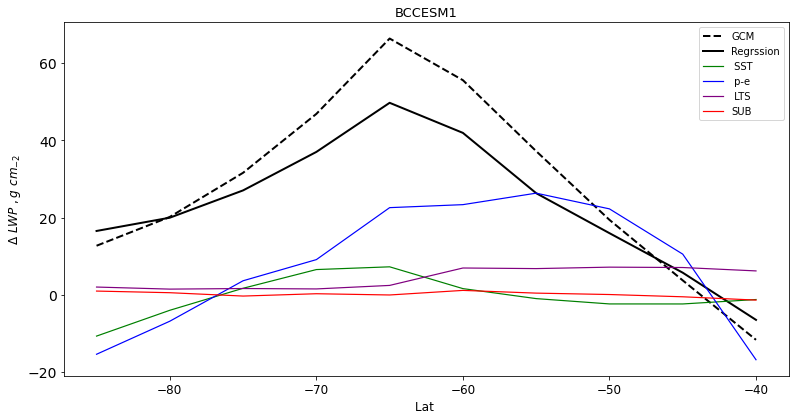

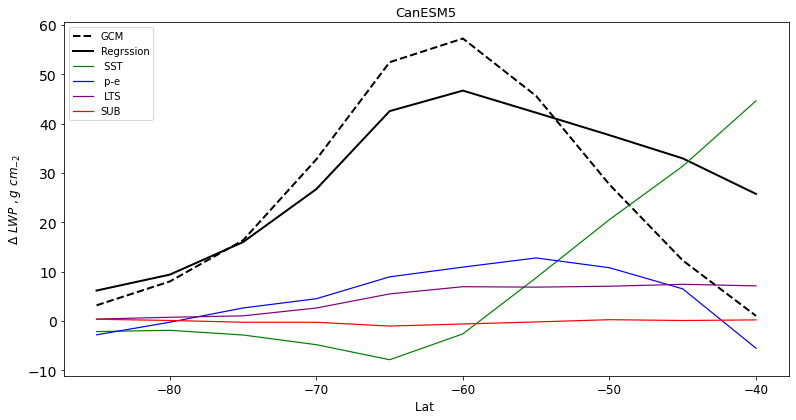

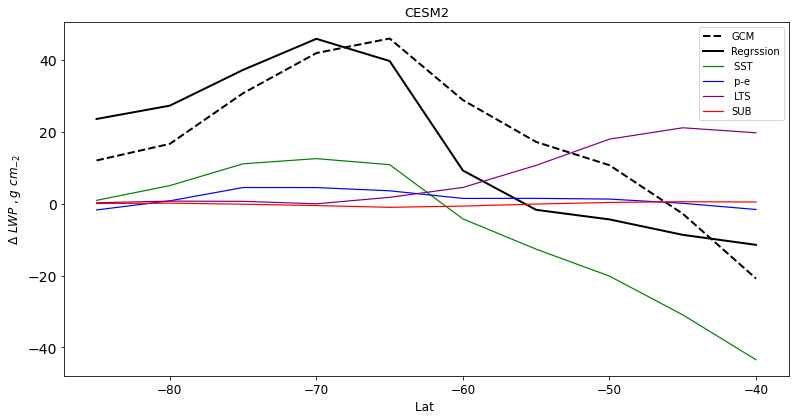

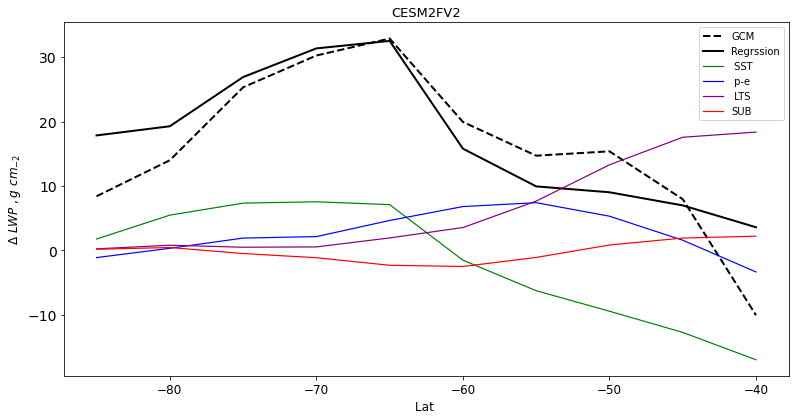

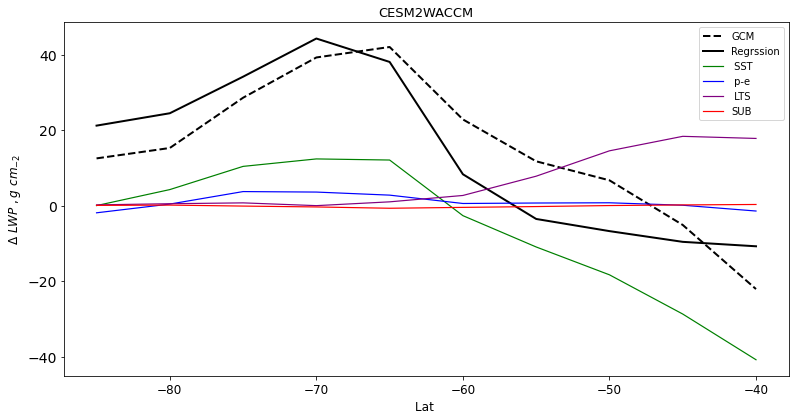

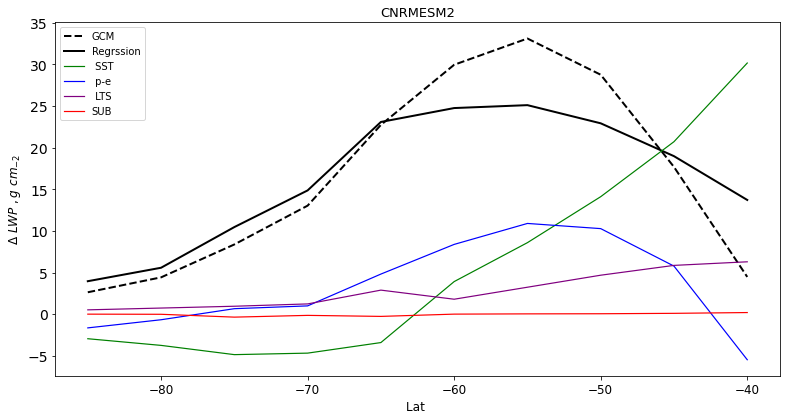

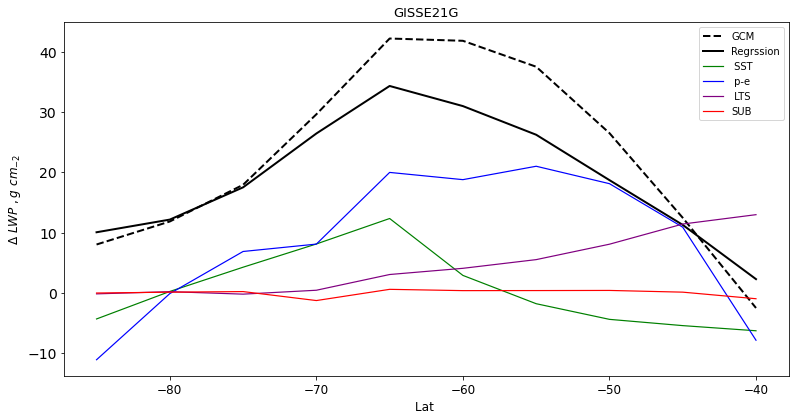

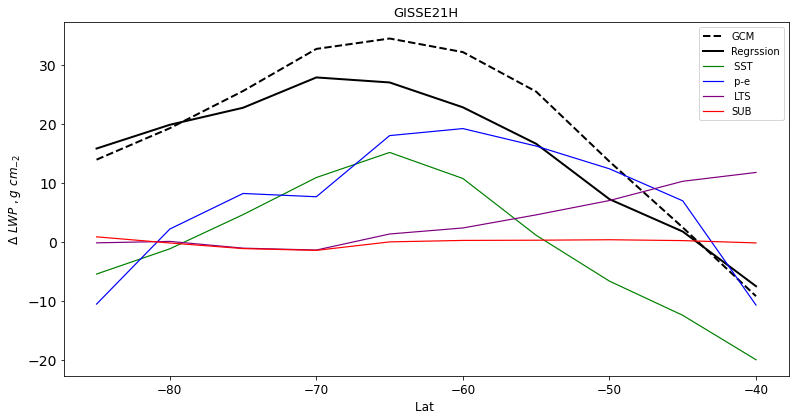

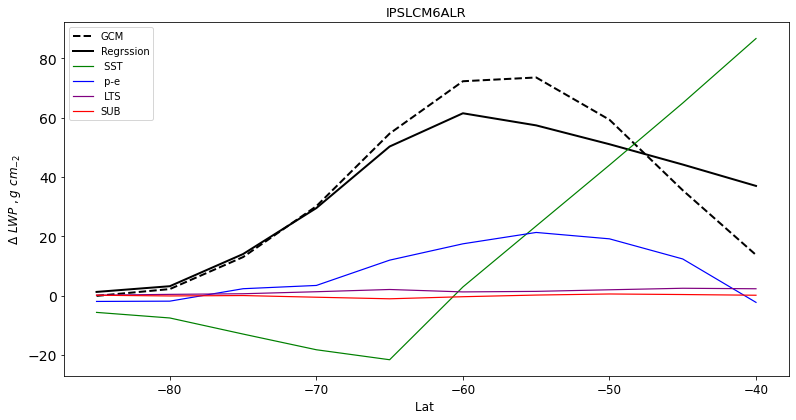

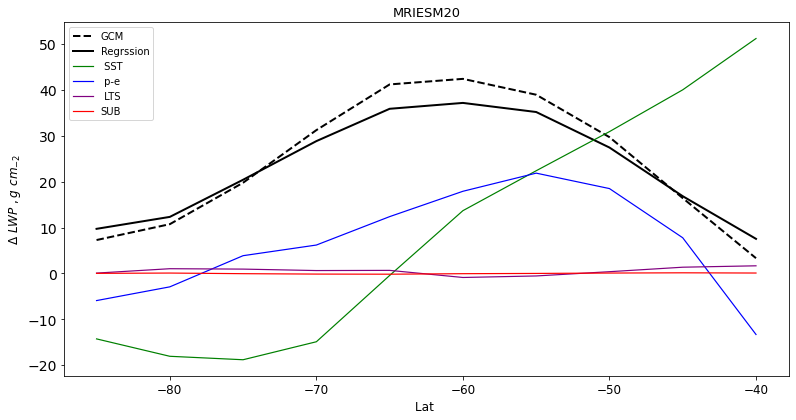

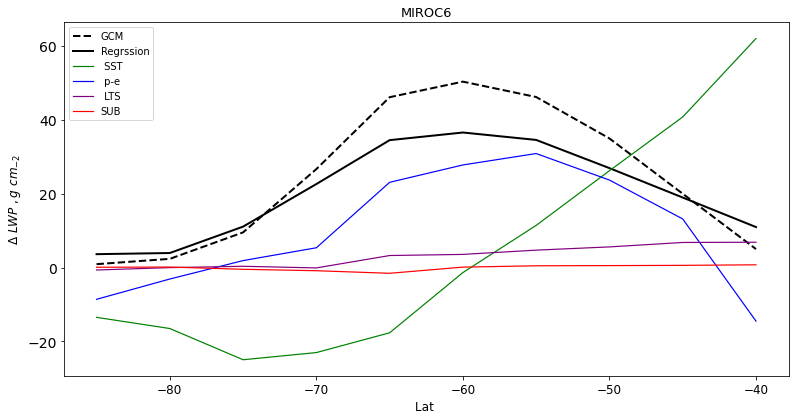

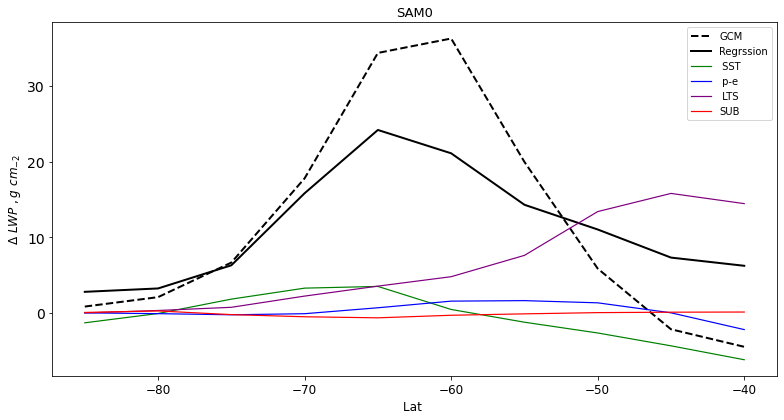

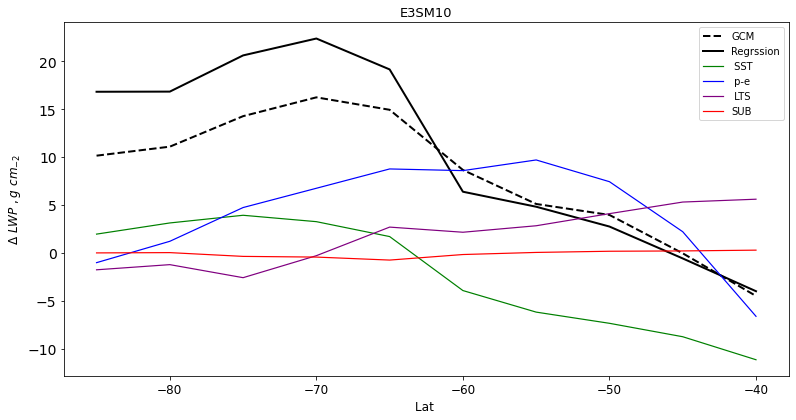

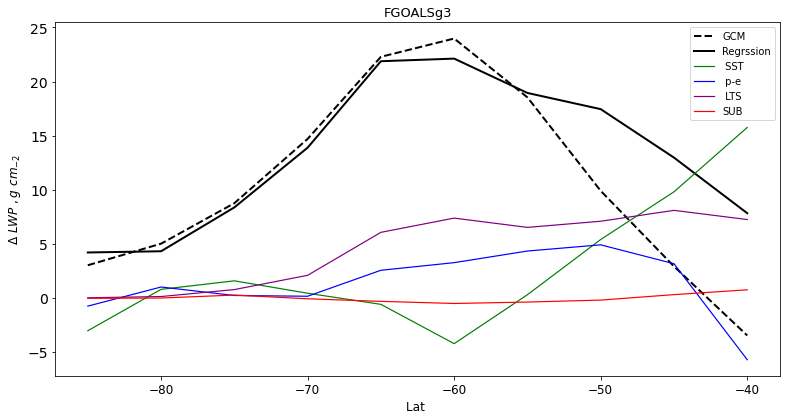

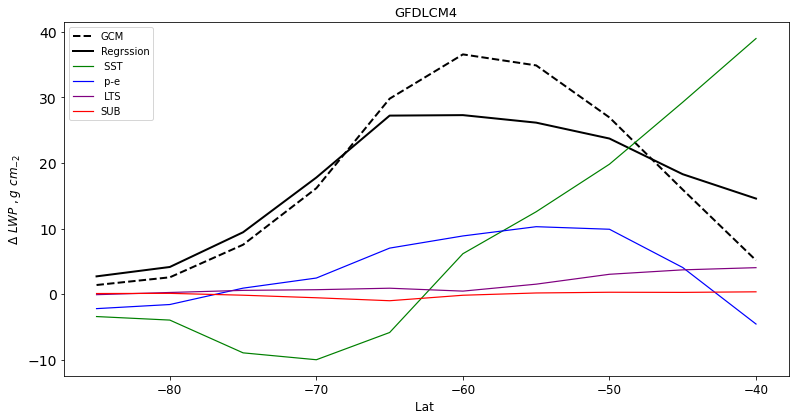

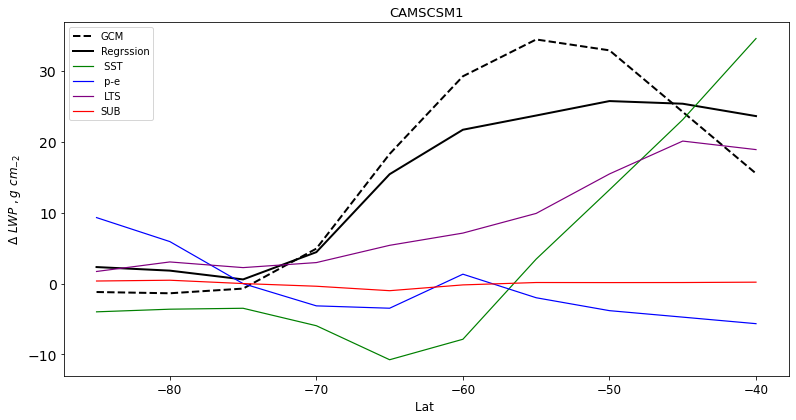

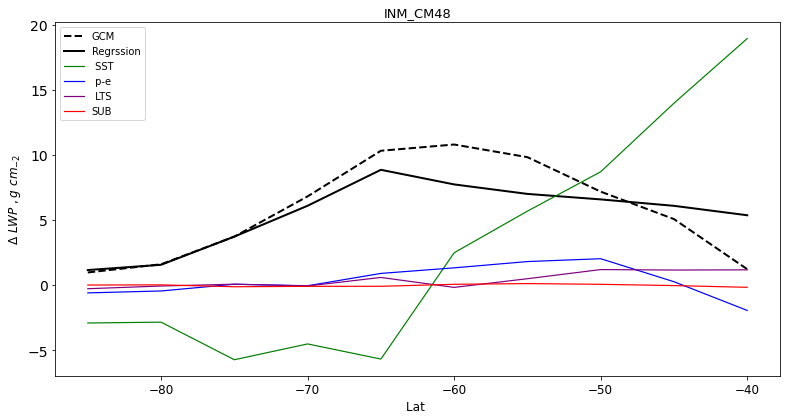

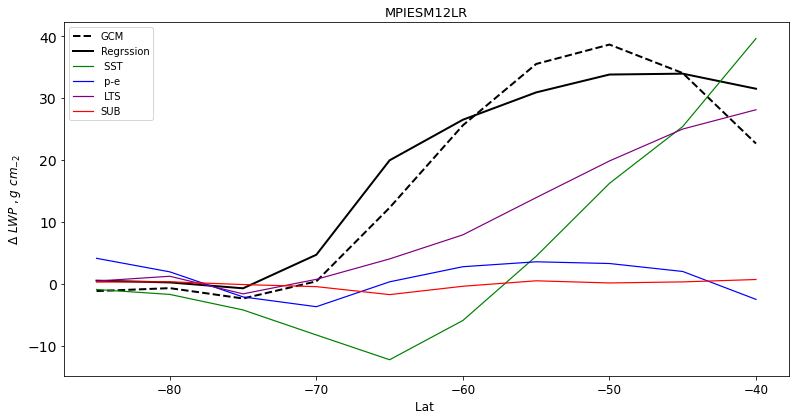

In [54]:
parameters = {'axes.labelsize':12, 'legend.fontsize':10, 'axes.titlesize':13, 
                'xtick.labelsize':12, 'ytick.labelsize': 14}
plt.rcParams.update(parameters)

for a in range(len(deck2)):
    
    plt.figure(figsize=(13, 6.5))
    lat = np.arange(-85., -35., 5.)
    
    plt.plot(lat, dabrmeanpi_report_4lrm[a,:], '--', c ='k', linewidth=2, label='GCM')
    plt.plot(lat, dabrmeanpi_regrss_4lrm[a,:], '-', c= 'k', linewidth=2, label='Regrssion')
    
    plt.plot(lat, dabrmeanpi_individual_ccfsdriven_4lrm[a,:,0], '-', c= 'green', linewidth=1.2, label=' SST ')
    plt.plot(lat, dabrmeanpi_individual_ccfsdriven_4lrm[a,:,1], '-', c= 'blue', linewidth=1.2, label=' p-e ')
    plt.plot(lat, dabrmeanpi_individual_ccfsdriven_4lrm[a,:,2], '-', c= 'purple', linewidth=1.2, label=' LTS ')
    plt.plot(lat, dabrmeanpi_individual_ccfsdriven_4lrm[a,:,3], '-', c= 'red', linewidth=1.2, label='SUB')
    
    plt.xlabel("Lat ") 
    plt.ylabel(r"$ \Delta\ LWP \ $" +r"$,g\ cm_{-2}$")
    plt.title(deck_nas2[a])
    
    plt.legend()
    
    plt.show()
    

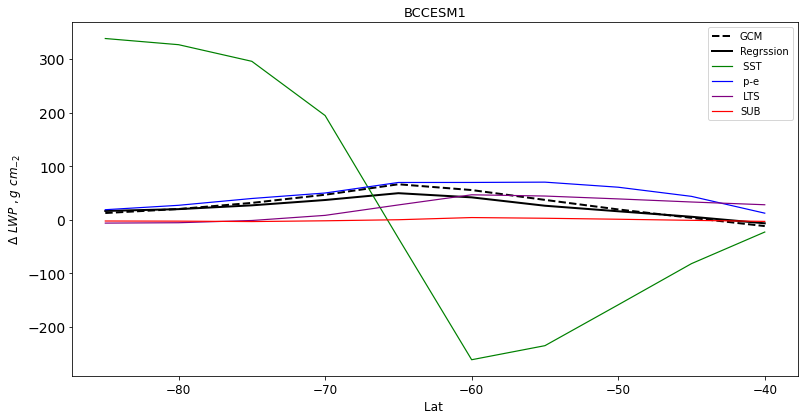

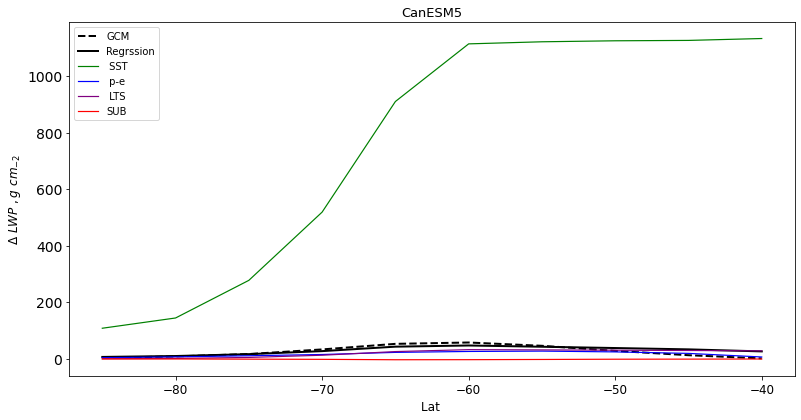

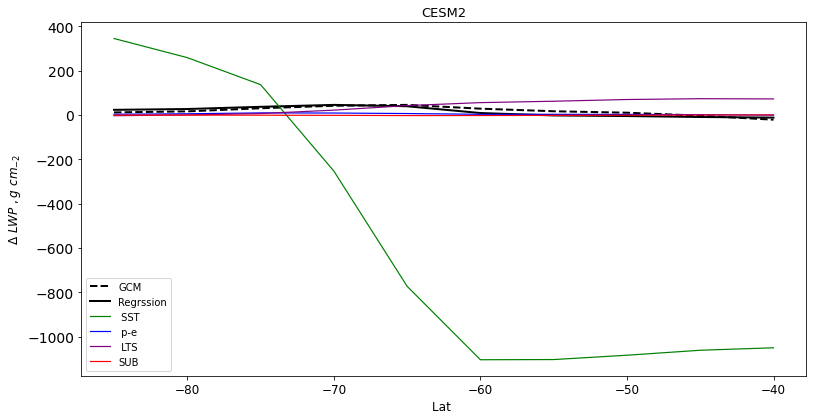

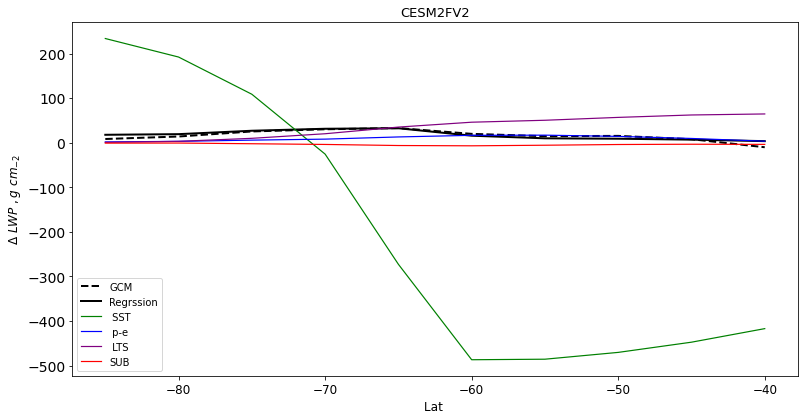

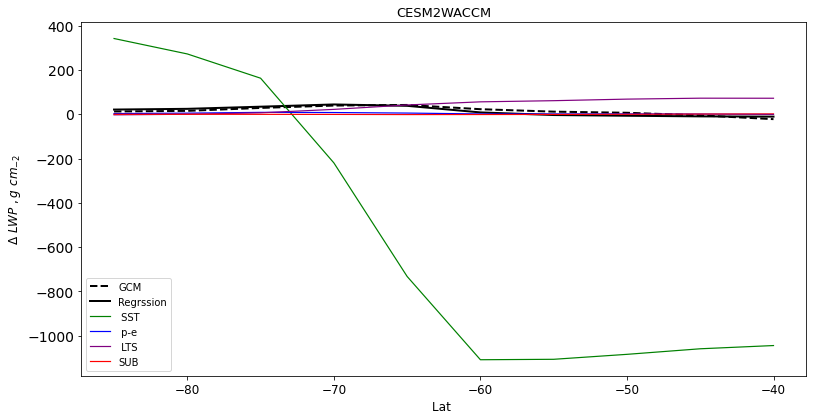

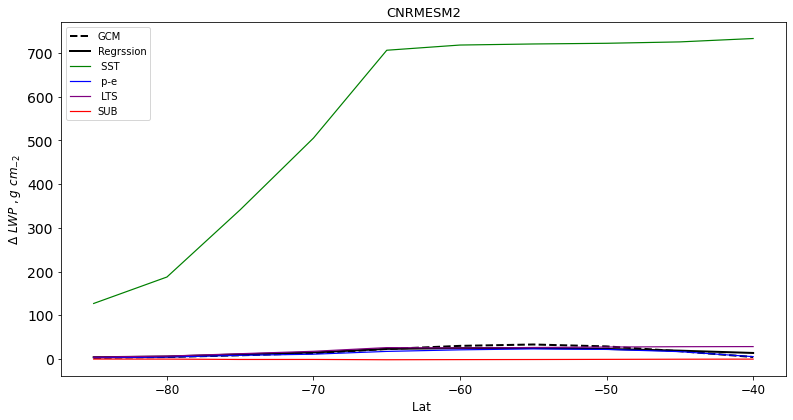

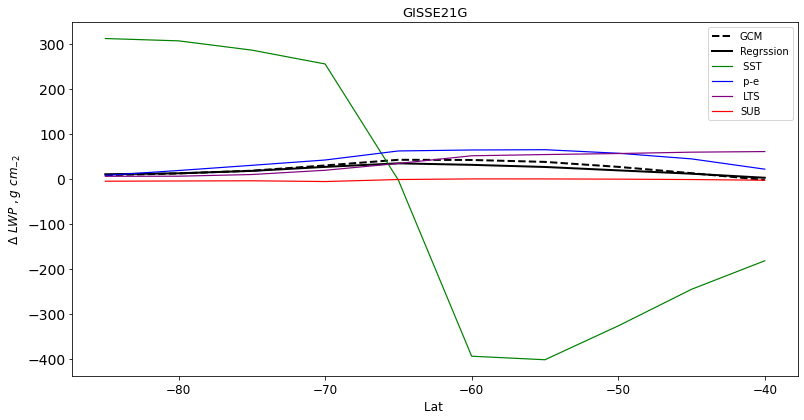

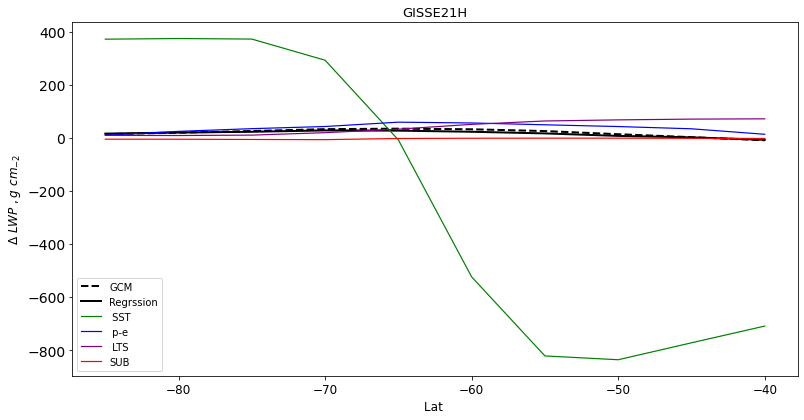

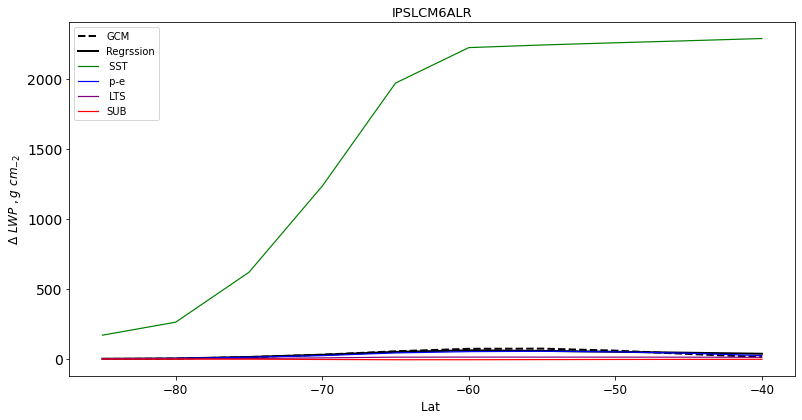

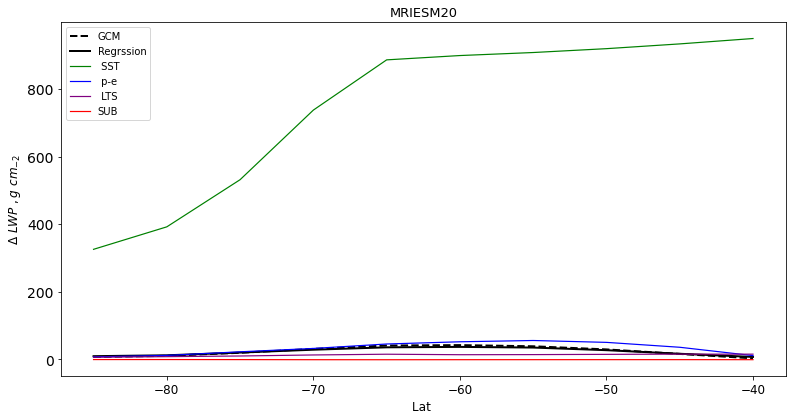

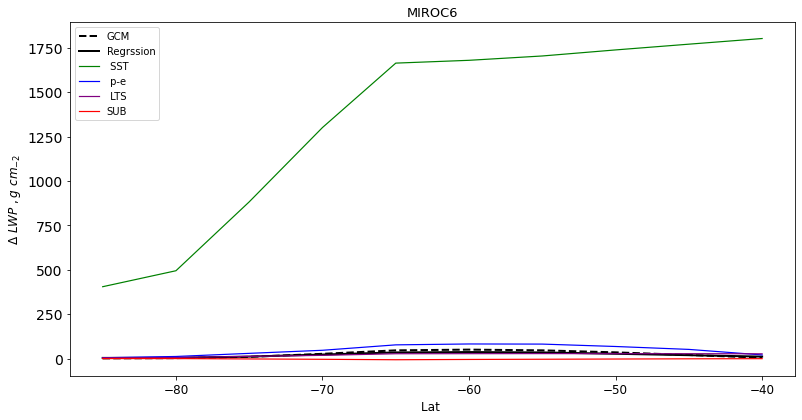

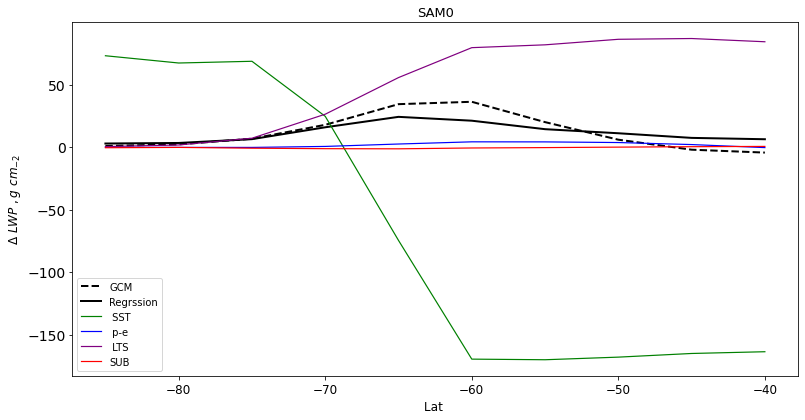

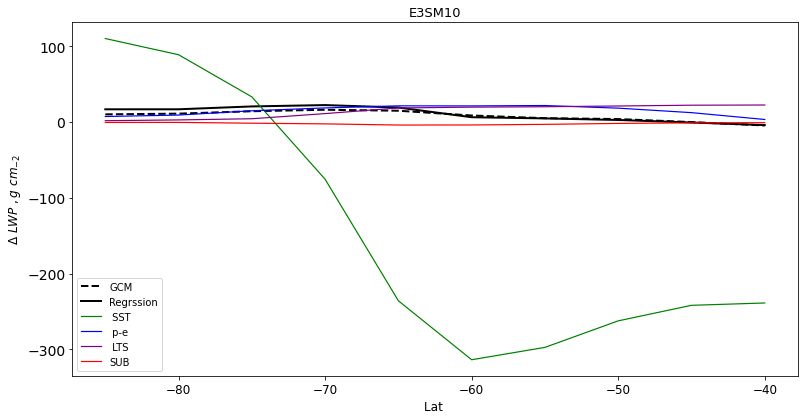

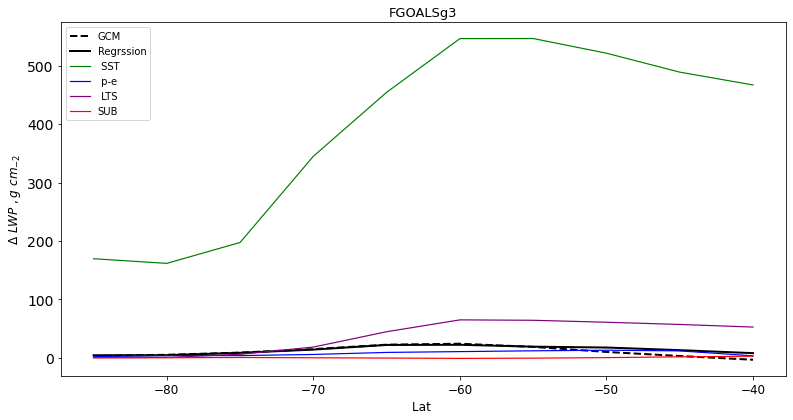

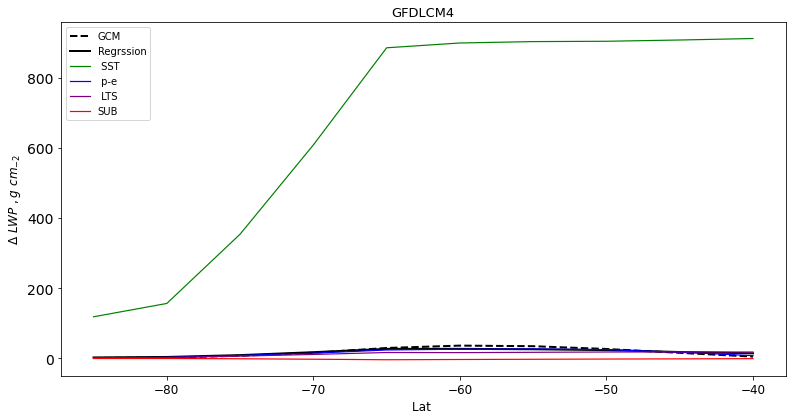

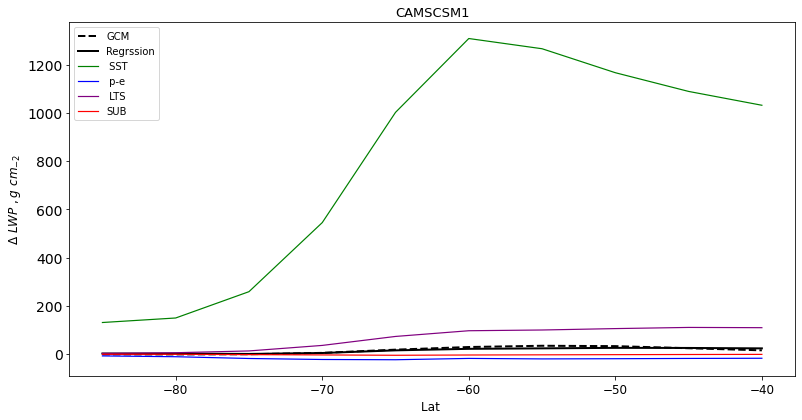

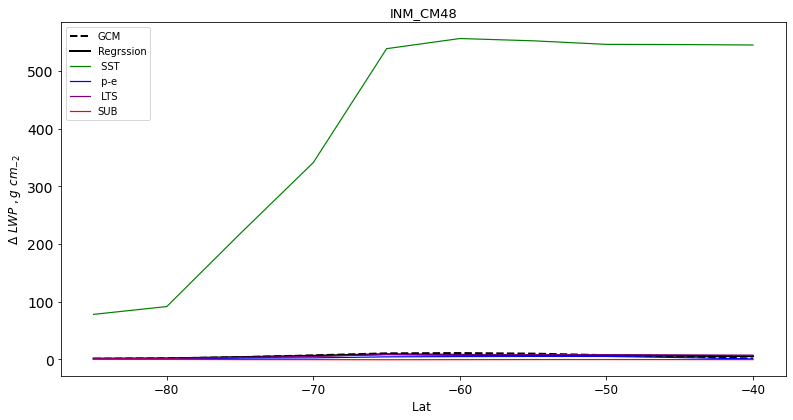

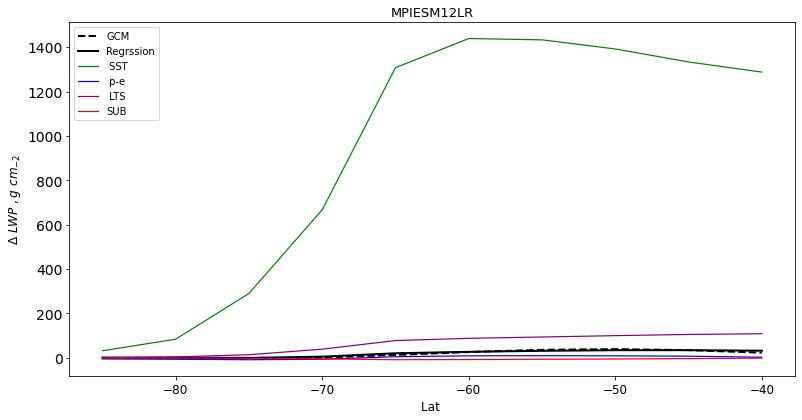

In [60]:
parameters = {'axes.labelsize':12, 'legend.fontsize':10, 'axes.titlesize':13, 
                'xtick.labelsize':12, 'ytick.labelsize': 14}
plt.rcParams.update(parameters)

for a in range(len(deck2)):
    
    plt.figure(figsize=(13, 6.5))
    lat = np.arange(-85., -35., 5.)
    
    plt.plot(lat, dabrmeanpi_report_4lrm[a,:], '--', c ='k', linewidth=2, label='GCM')
    plt.plot(lat, dabrmeanpi_regrss_4lrm[a,:], '-', c= 'k', linewidth=2, label='Regrssion')
    
    plt.plot(lat, dabrmeanpi_indi_ccfsdriven_4lrm[a,:,0], '-', c= 'green', linewidth=1.2, label=' SST ')
    plt.plot(lat, dabrmeanpi_indi_ccfsdriven_4lrm[a,:,1], '-', c= 'blue', linewidth=1.2, label=' p-e ')
    plt.plot(lat, dabrmeanpi_indi_ccfsdriven_4lrm[a,:,2], '-', c= 'purple', linewidth=1.2, label=' LTS ')
    plt.plot(lat, dabrmeanpi_indi_ccfsdriven_4lrm[a,:,3], '-', c= 'red', linewidth=1.2, label='SUB')
    
    plt.xlabel("Lat ")
    plt.ylabel(r"$ \Delta\ LWP \ $" +r"$,g\ cm_{-2}$")
    plt.title(deck_nas2[a])
    
    plt.legend()
    
    plt.show()
    

In [15]:
# calc ANNUALLY data standard deviation:

sigma3_yr = full((len(deck2), 4), 0.0)
sigma4_yr = full((len(deck2), 4), 0.0)
sigma5_yr = full((len(deck2), 4), 0.0)
sigma6_yr = full((len(deck2), 4), 0.0)


stcoef3_yr = full((len(deck2), 4), 0)
stcoef4_yr = full((len(deck2), 4), 0)
stcoef5_yr = full((len(deck2), 4), 0)
stcoef6_yr = full((len(deck2), 4), 0)


# start calculating SD of CCFs on annually scale:
for i in range(len(deck_nas2)):
    
    ind1_4lrm_yr = isnan(output_4lrm_yr_bin_PI[deck_nas2[i]]['LTS_yr_bin'].flatten()) == False

    ind_true_4lrm_yr = nonzero(ind1_4lrm_yr ==True)
    ind_false_4lrm_yr = nonzero(ind1_4lrm_yr ==False)
    
    print('shape1v.s2: ', array(ind1_4lrm_yr).shape, array(ind_true_4lrm_yr).shape )        # shape2
    
    
    '''
    ## TR_sst, TR_sub
    folder_4lrm =  glob.glob(path1+deck2[i]['modn']+'_best(test6)fit_'+'*K'+'_ud'+'*'+'_dats.npz')
    print(folder_4lrm)
    index_st_sst = folder_4lrm[0].index('fit')+ 4
    index_ed_sst = folder_4lrm[0].index('K')
    # print(list(folder_4lrm[0])[index_st_sst], list(folder_4lrm[0])[index_ed_sst])
    
    index_st_sub  = folder_4lrm[0].index('_ud') +3
    index_ed_sub  = folder_4lrm[0].index('_dats')
    TR_sst = float(str(folder_4lrm[0])[index_st_sst:index_ed_sst])
    TR_sub = float(str(round(float(str(folder_4lrm[0][index_st_sub:index_ed_sub])) *0.01, 5)))
    # print('TR_sst= ', TR_sst)
    print('TR_sub= ', TR_sub)
    '''
    
    
    #..Split data points with skin Temperature < / >=TR_sst and Subsidence500 <= / > TR_sub(upward motion / downward motion): 
    
    # shape1 split into shape3(smaller.TR_sst & up)\shape4(larger.equal.TR_sst & up)\shape5(smaller.TR_sst & down)\shape7(larger.equal.TR_sst & down)
    ind_sstlt_up_yr =  nonzero((output_4lrm_yr_bin_PI[deck_nas2[i]]['SST_yr_bin'].flatten() < TR_sst) & (output_4lrm_yr_bin_PI[deck_nas2[i]]['SUB_yr_bin'].flatten() <= TR_sub))
    ind_sstle_up_yr =  nonzero((output_4lrm_yr_bin_PI[deck_nas2[i]]['SST_yr_bin'].flatten() >= TR_sst) & (output_4lrm_yr_bin_PI[deck_nas2[i]]['SUB_yr_bin'].flatten()<= TR_sub))
    ind_sstlt_dw_yr  = nonzero((output_4lrm_yr_bin_PI[deck_nas2[i]]['SST_yr_bin'].flatten() < TR_sst) &  (output_4lrm_yr_bin_PI[deck_nas2[i]]['SUB_yr_bin'].flatten() > TR_sub))
    ind_sstle_dw_yr  = nonzero((output_4lrm_yr_bin_PI[deck_nas2[i]]['SST_yr_bin'].flatten() >= TR_sst) & (output_4lrm_yr_bin_PI[deck_nas2[i]]['SUB_yr_bin'].flatten()> TR_sub))
    # print(ind_sstle_up_yr)
    # print(ind_sstlt_dw_yr)

    # shape7:the intersection of places where has LTS value and skin_T < TR_sst & SUB500 <= TR_sub
    ind7_yr  = intersect1d(ind_true_4lrm_yr, ind_sstlt_up_yr)
    
    # shape8:the intersection of places where LTS value and skin_T >= TR_sst & SUB500 <= TR_sub
    ind8_yr = intersect1d(ind_true_4lrm_yr, ind_sstle_up_yr)
    # print(ind8_yr)

    # shape9:the intersection of places where has LTS value and skin_T < TR_sst & SUB500 > TR_sub
    ind9_yr  = intersect1d(ind_true_4lrm_yr, ind_sstlt_dw_yr)
    
    # shape10:the intersection of places where LTS value and skin_T >= TR_sst & SUB500 > TR_sub                                                                         
    ind10_yr =  intersect1d(ind_true_4lrm_yr, ind_sstle_dw_yr)
    # print(ind10_yr)

    ## calc standard_deviation for CCFs at PI:
    
    sigma3_yr[i,:]  = array([ nanstd(output_4lrm_yr_bin_PI[deck_nas2[i]]['SST_yr_bin'].flatten()[ind7_yr]), nanstd(output_4lrm_yr_bin_PI[deck_nas2[i]]['p_e_yr_bin'].flatten()[ind7_yr]), 
                          nanstd(output_4lrm_yr_bin_PI[deck_nas2[i]]['LTS_yr_bin'].flatten()[ind7_yr]), nanstd(output_4lrm_yr_bin_PI[deck_nas2[i]]['SUB_yr_bin'].flatten()[ind7_yr])]) 
    sigma4_yr[i,:]  = array([ nanstd(output_4lrm_yr_bin_PI[deck_nas2[i]]['SST_yr_bin'].flatten()[ind8_yr]), nanstd(output_4lrm_yr_bin_PI[deck_nas2[i]]['p_e_yr_bin'].flatten()[ind8_yr]), 
                          nanstd(output_4lrm_yr_bin_PI[deck_nas2[i]]['LTS_yr_bin'].flatten()[ind8_yr]), nanstd(output_4lrm_yr_bin_PI[deck_nas2[i]]['SUB_yr_bin'].flatten()[ind8_yr])])
    sigma5_yr[i,:]  = array([ nanstd(output_4lrm_yr_bin_PI[deck_nas2[i]]['SST_yr_bin'].flatten()[ind9_yr]), nanstd(output_4lrm_yr_bin_PI[deck_nas2[i]]['p_e_yr_bin'].flatten()[ind9_yr]), 
                          nanstd(output_4lrm_yr_bin_PI[deck_nas2[i]]['LTS_yr_bin'].flatten()[ind9_yr]), nanstd(output_4lrm_yr_bin_PI[deck_nas2[i]]['SUB_yr_bin'].flatten()[ind9_yr])])
    sigma6_yr[i,:]  = array([ nanstd(output_4lrm_yr_bin_PI[deck_nas2[i]]['SST_yr_bin'].flatten()[ind10_yr]), nanstd(output_4lrm_yr_bin_PI[deck_nas2[i]]['p_e_yr_bin'].flatten()[ind10_yr]), 
                          nanstd(output_4lrm_yr_bin_PI[deck_nas2[i]]['LTS_yr_bin'].flatten()[ind10_yr]), nanstd(output_4lrm_yr_bin_PI[deck_nas2[i]]['SUB_yr_bin'].flatten()[ind10_yr])])
    

## switch 'nan' points to 0
ind_sg3_yr = isnan(sigma3_yr)== True
ind_sg3false_yr = nonzero(ind_sg3_yr==True)
sigma3_yr[ind_sg3false_yr] = 0.0

ind_sg5_yr = isnan(sigma5_yr)== True
ind_sg5false_yr = nonzero(ind_sg5_yr==True)
sigma5_yr[ind_sg5false_yr] = 0.0
# print(sigma3_yr, sigma6_yr)


stcoef3_yr = (1000.*array(coef3)) * sigma3_yr[i,:]
stcoef4_yr = (1000.*array(coef4)) * sigma4_yr[i,:]
stcoef5_yr = (1000.*array(coef5)) * sigma5_yr[i,:]
stcoef6_yr = (1000.*array(coef6)) * sigma6_yr[i,:]
# print(stcoef5_yr)

shape1v.s2:  (72270,) (1, 72270)
shape1v.s2:  (72270,) (1, 72270)
shape1v.s2:  (72270,) (1, 66527)
shape1v.s2:  (72270,) (1, 66064)
shape1v.s2:  (72270,) (1, 66530)
shape1v.s2:  (72270,) (1, 68199)
shape1v.s2:  (72270,) (1, 67095)
shape1v.s2:  (72270,) (1, 67076)
shape1v.s2:  (72270,) (1, 67914)
shape1v.s2:  (72270,) (1, 67184)
shape1v.s2:  (72270,) (1, 67964)
shape1v.s2:  (72270,) (1, 66535)
shape1v.s2:  (72270,) (1, 67582)
shape1v.s2:  (72270,) (1, 65050)
shape1v.s2:  (72270,) (1, 67620)
shape1v.s2:  (72270,) (1, 72270)
shape1v.s2:  (72270,) (1, 72270)
shape1v.s2:  (72270,) (1, 72270)


In [16]:
novALUE = full(2*18, NaN)

stcoef3_withtruemodel = append(novALUE.reshape(18, 2), stcoef3, axis=1)
stcoef4_withtruemodel = append(novALUE.reshape(18, 2), stcoef4, axis=1)
stcoef5_withtruemodel = append(novALUE.reshape(18, 2), stcoef5, axis=1)
stcoef6_withtruemodel = append(novALUE.reshape(18, 2), stcoef6, axis=1)


dX_dTg1_withtruemodel = append(novALUE.reshape(18, 2), dX_dTg1, axis=1)
dX_dTg2_withtruemodel = append(novALUE.reshape(18, 2), dX_dTg2, axis=1)
dX_dTg3_withtruemodel = append(novALUE.reshape(18, 2), dX_dTg3, axis=1)
dX_dTg4_withtruemodel = append(novALUE.reshape(18, 2), dX_dTg4, axis=1)


(novALUE.shape, stcoef3_withtruemodel, dX_dTg1_withtruemodel.shape)

((36,),
 array([[            nan,             nan,  3.21519537e+01,
          4.43180710e+01, -5.14563976e+00,  7.85930407e+00],
        [            nan,             nan,  8.12503711e+00,
          8.47619169e+00, -1.93982729e-01,  2.99753969e+00],
        [            nan,             nan,  3.19588344e+01,
          8.82444135e+00, -2.74339802e+00,  1.94469709e+00],
        [            nan,             nan,  2.41846907e+01,
          4.73397999e+00, -1.18207729e+00,  2.68163488e+00],
        [            nan,             nan,  3.21133313e+01,
          8.26067022e+00, -2.54059594e+00,  1.96420385e+00],
        [            nan,             nan,  5.57216067e+00,
          5.50016207e+00,  1.01215030e+00,  5.28164698e-01],
        [            nan,             nan,  3.07239457e+01,
          3.41346306e+01,  3.45322434e+00,  1.39205173e+00],
        [            nan,             nan,  3.13203595e+01,
          3.64639358e+01,  4.41200034e+00,  1.26664490e+00],
        [            nan

In [24]:
##PLot 5:

# determine model:
a  = 7
modn = deck_nas2[a]

# TR_sst, TR_sub
folder_4lrm =  glob.glob(path1+deck2[a]['modn']+'_best(test6)fit_'+'*K'+'_ud'+'*'+'_dats.npz')
print(folder_4lrm)
index_st_sst = folder_4lrm[0].index('fit') +4
index_ed_sst = folder_4lrm[0].index('K')
# print(list(folder_4lrm[0])[index_st_sst], list(folder_4lrm[0])[index_ed_sst])

index_st_sub  = folder_4lrm[0].index('_ud') +3
index_ed_sub  = folder_4lrm[0].index('_dats')
TR_sst = float(str(folder_4lrm[0])[index_st_sst:index_ed_sst])
TR_sub = float(str(round(float(str(folder_4lrm[0][index_st_sub:index_ed_sub])) *0.01, 5)))
print('TR_sst= ', TR_sst)
print('TR_sub= ', TR_sub)


# Read best_fit 6 data
WD = '/glade/work/chuyan/Research/Cloud_CCFs_RMs/plots_test5/'   # Plots_proposal

folder =  glob.glob(WD+ modn+'__'+ 'STAT_pi+abr_'+'22x_31y'+'.npz')
print(folder)

output_ARRAY  =  load(folder[0], allow_pickle=True)  # str(TR_sst)
x_gcm      =   array(output_ARRAY['bound_x'])
y_gcm      =   array(output_ARRAY['bound_y'])
output_stat1   = output_ARRAY['stats_1']
output_stat2   = output_ARRAY['stats5']

TR_sst_bestfit5  = output_ARRAY['TR_minabias_SST']
TR_sub_bestfit5  = output_ARRAY['TR_minabias_SUB']
TR_sst_bestfit6  = output_ARRAY['TR_maxR2_SST']
TR_sub_bestfit6  = output_ARRAY['TR_maxR2_SUB']
print(TR_sst_bestfit5, TR_sub_bestfit6)
#..defined a proper LWP ticks within its range

p10_valuespace1 = nanpercentile(output_stat1, 25.) - nanpercentile(output_stat1, 15.)
levels_value1 = linspace(nanpercentile(output_stat1, 0.05)-p10_valuespace1, round(( nanpercentile(output_stat1, 99.75)+p10_valuespace1), 2), 164)   # arange(0.368, 0.534, 0.002) 
levels_value1 = 1000.*levels_value1   #  transfer to g m^-2
# print(levels_value1)
p10_valuespace2 = nanpercentile(output_stat2, 25.) - nanpercentile(output_stat2, 15.)
levels_value2  = linspace(nanpercentile(output_stat2, 0.5)-p10_valuespace2, nanpercentile(output_stat2, 99.75)+p10_valuespace2, 164)
# print(levels_value2)

['/glade/work/chuyan/Research/Cloud_CCFs_RMs/plots_test1/GISS-E2-1-H_best(test6)fit_272.76K_ud0.8_dats.npz']
TR_sst=  272.76
TR_sub=  0.008
['/glade/work/chuyan/Research/Cloud_CCFs_RMs/plots_test5/GISSE21H__STAT_pi+abr_22x_31y.npz']
275.16805615743 0.007889380691099929


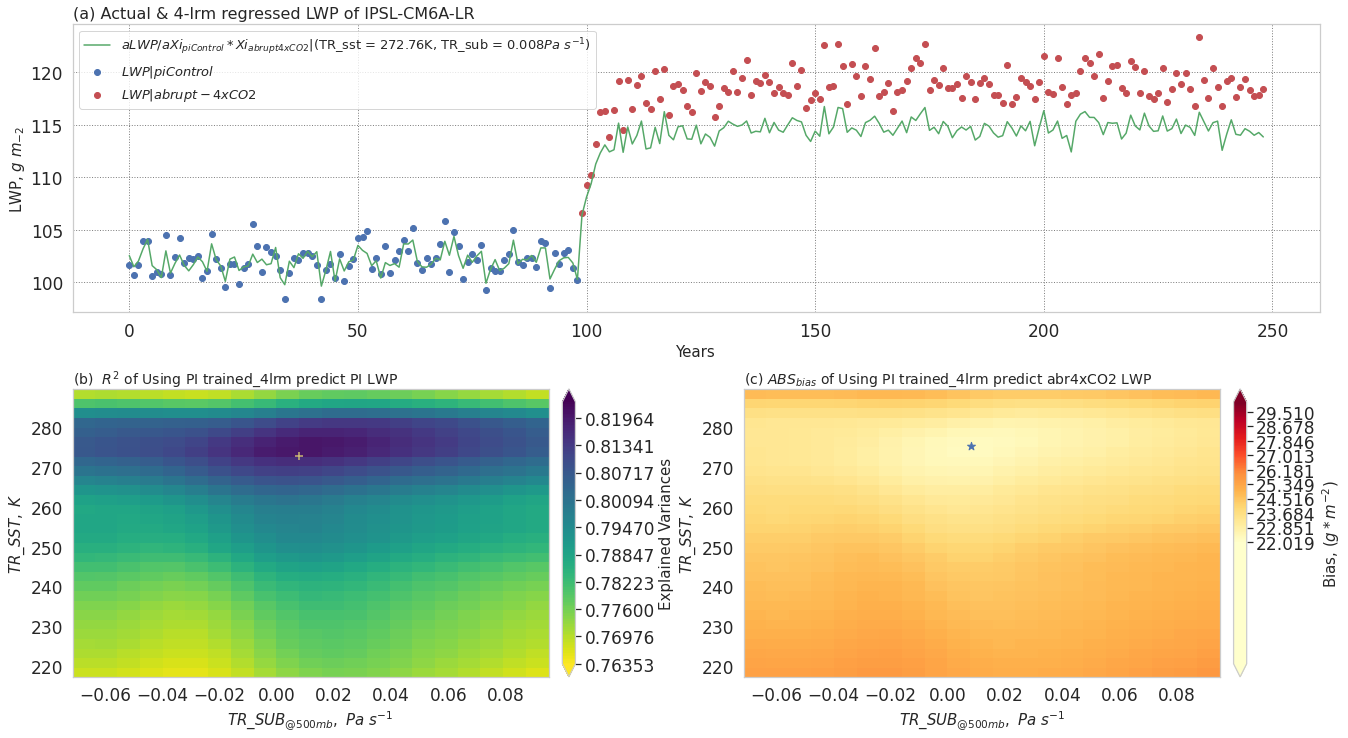

In [19]:
## PLot 5:

# modn = 'IPSLCM6ALR'


# plot settings:
parameters = {'axes.labelsize': 15, 'legend.fontsize': 15,
      'axes.titlesize': 16, 'xtick.labelsize': 17, 'ytick.labelsize': 17}
plt.rcParams.update(parameters)


#..print(linspace(nanpercentile(output_stat, 1.5), nanpercentile(output_stat, 99.5), 164))
#..pick the desired colormap
cmap  = plt.get_cmap('YlOrRd') 
cmap_2 = plt.get_cmap('viridis_r')   # 'YlOrRd'
norm1 = BoundaryNorm(levels_value1, ncolors= cmap.N, extend='both')
norm2 = BoundaryNorm(levels_value2, ncolors= cmap_2.N, extend='both')

fig1 =  plt.figure(figsize = (19.8, 10.6))
ax1  =  fig1.add_subplot(2, 2, (1, 2))
# subplot3 :
output_yrs = {}
output_yrs[deck_nas2[a]] = arange(0, shape_yr_modelPI[deck_nas2[a]]+150)
# print(output_yrs[deck_nas2[b]].shape)

ax1.scatter(output_yrs[deck_nas2[a]][:99], 1000.*output_4lrm_report[deck_nas2[a]][:99], label = 
            "$LWP|piControl $", c='b')
ax1.scatter(output_yrs[deck_nas2[a]][99:249], 1000.*output_4lrm_report[deck_nas2[a]][99:249], label = 
            "$LWP|abrupt-4xCO2 $", c= 'r')
ax1.plot(output_yrs[deck_nas2[a]], 1000.*output_4lrm_predict[deck_nas2[a]][:249], "g", 
         label="$aLWP/aXi_{piControl}*{Xi_{abrupt4xCO2}}| $"+ "(TR_sst = "+ str(TR_sst)+"K, "+ 
         "TR_sub = "+ str(TR_sub)+ r"$Pa\ s^{-1}$" +")")
 
ax1.set_xlabel("Years")

ax1.set_ylabel("LWP, " + r"$g\ m_{-2}$")
ax1.set_title("(a) Actual & 4-lrm regressed LWP of IPSL-CM6A-LR", loc = 'left')
ax1.legend(loc = "upper left", prop={'size': 13})
#ax1.ylim((0.105, 0.121))


# subplot1
ax3  = plt.subplot(223)  #(16.2, 9.3))

im2  = ax3.pcolormesh(x_gcm, y_gcm, array(output_stat2), cmap=cmap_2, norm= norm2)
ax3.set_xlabel(r"$TR\_SUB_{@500mb},\ $"+ r"$Pa\ s^{-1}$")
ax3.set_ylabel(r"$TR\_SST,\ $" + r"$K $")
ax3.set_title("(b) " +r"$\ R^{2}$" + " of Using PI trained_4lrm predict PI LWP", loc='left', fontsize = 14)
# ax3.set_title("exp 'abrupt-4xCO2' GCM: BCCESM1 predict R_2", loc='left', fontsize = 11)
#.. add bestfit points
ax3.scatter(TR_sub_bestfit6, TR_sst_bestfit6, marker = '+', s= 65, c ='y')
fig1.colorbar(im2, ax = ax3, label= "Explained Variances", pad = 0.0235)


# subplot2
ax4  = plt.subplot(224)  #(16.2, 9.3))

im1  = ax4.pcolormesh(x_gcm, y_gcm, array(1000.*output_stat1), cmap=cmap, norm= norm1)   #..anmean_LWP_bin_Tskew_wvp..LWP_bin_Tskin_sub
ax4.set_xlabel(r"$TR\_SUB_{@500mb},\ $"+ r"$Pa\ s^{-1}$")
ax4.set_ylabel(r"$TR\_SST,\ $" + r"$K $")
ax4.set_title("(c) " +r"$ABS_{bias}$" + " of Using PI trained_4lrm predict abr4xCO2 LWP", loc='left', fontsize = 14)
ax4.scatter(TR_sub_bestfit5, TR_sst_bestfit5, marker = '*', s = 70, c='b')
fig1.colorbar(im1, ax = ax4, label= "Bias,"+ r"$\ (g*m^{-2})$", pad = 0.0235, values = arange(15.00, 30.10, 0.011))



# plt.suptitle( modn+ " Bias Metrics for USING piControl data Predict abr4xCO2 LWP", fontsize =18)

# plt.legend(loc='upper right',  fontsize= 12)


# set the spacing between subplots and plot 
plt.subplots_adjust(left = 0.095, bottom=0.125, right = 0.97, top=0.98, wspace = 0.165, hspace = 0.265)
# plt.savefig(path6+"plot5_model_bias_metrics_ipslcm6aLR", dpi=500)

# plt.subplot_tool()
plt.show()


In [6]:
# Choice the model you wants:
a =8   # IPSL-CM6A-LR

TR_sst = 0.0   #K

ind_sstlt_PI =  nonzero(output_2lrm_flavra_PI[deck_nas2[a]]['SST'] < TR_sst)

ind_sstle_PI =  nonzero(output_2lrm_flavra_PI[deck_nas2[a]]['SST'] >= TR_sst)

ind_sstlt_abr =  nonzero(output_2lrm_flavra_abr[deck_nas2[a]]['SST'] < TR_sst)

ind_sstle_abr  =  nonzero(output_2lrm_flavra_abr[deck_nas2[a]]['SST'] >= TR_sst)



(3600,)


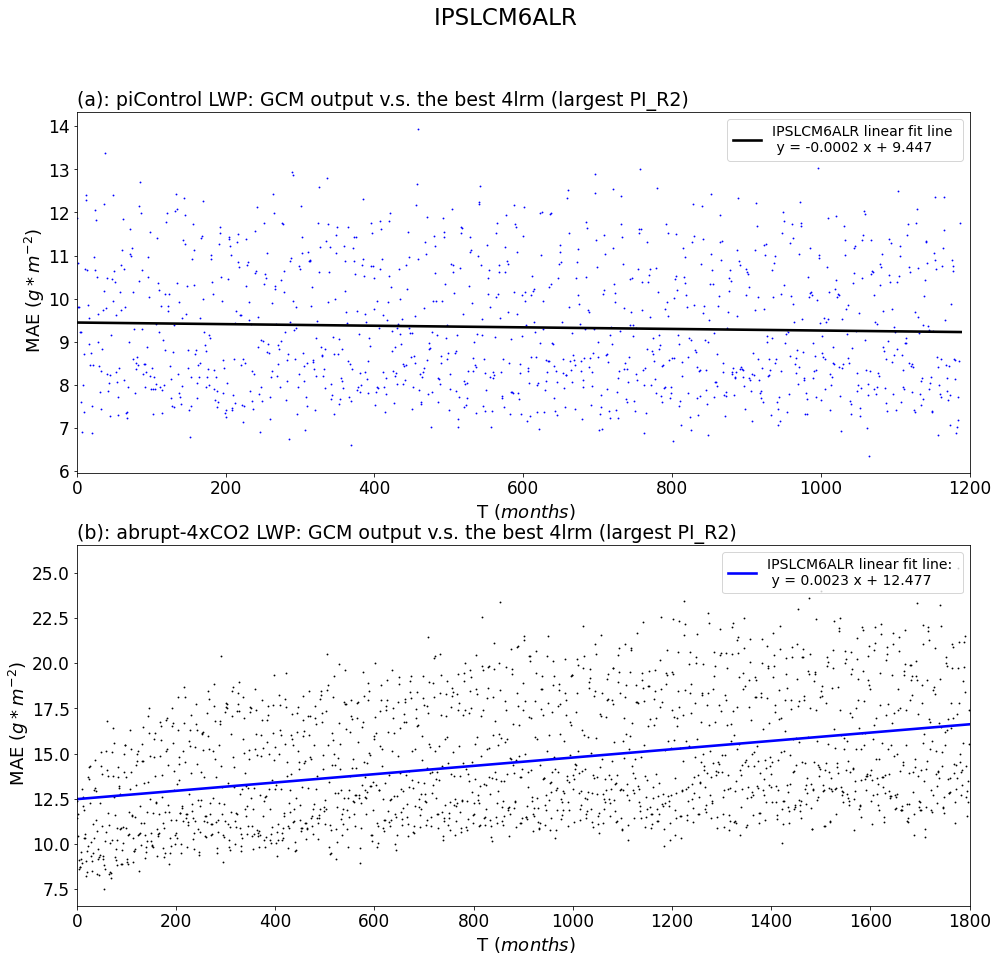

In [28]:
## PLot 4

# for a in range(len(deck2)):
a =8

'''
TR_sst = 260.0   #K

ind_sstlt_PI =  nonzero(output_4lrm_flavra_PI[deck_nas2[a]]['SST'] < TR_sst)

ind_sstle_PI =  nonzero(output_4lrm_flavra_PI[deck_nas2[a]]['SST'] >= TR_sst)

ind_sstlt_abr =  nonzero(output_4lrm_flavra_abr[deck_nas2[a]]['SST'] < TR_sst)

ind_sstle_abr  =  nonzero(output_4lrm_flavra_abr[deck_nas2[a]]['SST'] >= TR_sst)
'''


fig41, ax41 = plt.subplots(2,1, figsize = (16., 14.6))   #(16.2, 9.3))

parameters = {'axes.labelsize': 18, 'legend.fontsize': 14, 
          'axes.titlesize': 19, 'xtick.labelsize': 17, 'ytick.labelsize': 17}
plt.rcParams.update(parameters)

my_colors= array([
    '#1f77b4', '#aec7e8', '#ff7f0e', '#ffbb78', '#2ca02c', '#98df8a',
    '#d62728', '#ff9896', '#9467bd', '#c5b0d5', '#8c564b', '#c49c94',
    '#e377c2', '#f7b6d2', '#7f7f7f', '#c7c7c7', '#bcbd22', '#dbdb8d',
    '#17becf', '#9edae5'])   #..plt.rcParams['axes.prop_cycle']()
my_colorst= my_colors


# actual & regressed MONTHLY LWP data:
# print(array(output_2lrm_mon_bin_PI[deck_nas2[a]]['LWP_mon_bin']).shape)

PI_2lrm_actual  = array(output_4lrm_mon_bin_PI[deck_nas2[a]]['LWP_mon_bin'])
abr_2lrm_actual  = array(output_4lrm_mon_bin_abr[deck_nas2[a]]['LWP_mon_bin'])
PI_2lrm_predict  =  array(output_4lrm_mon_bin_LWPpredi_PI[deck_nas2[a]])
abr_2lrm_predict  =  array(output_4lrm_mon_bin_LWPpredi_abr[deck_nas2[a]])

# print(PI_2lrm_predict.shape, PI_2lrm_actual.shape)

print(np.nanmean(abs(abr_2lrm_predict - abr_2lrm_actual), axis = (1,2)).shape)

cax_1 = ax41[1].scatter(np.arange((abr_2lrm_predict.shape[0])/2), 1000.*(np.nanmean(abs(abr_2lrm_predict[:1800,:,:] - abr_2lrm_actual[:1800,:,:]), axis = (1,2))), s=0.7, c='black')

cax_0 = ax41[0].scatter(np.arange(PI_2lrm_actual.shape[0]), 1000.*(np.nanmean(abs(PI_2lrm_predict - PI_2lrm_actual), axis= (1, 2))), s = 0.7, c = 'blue')

# cb1.set_ticks(array([210., 220., 230., 240., 260., 275., 290.]))
# cb1.set_ticklabels([210, 220, 230, 240, 260, 270, 275, 290])


# Reference line added:
# x1  = linspace(nanpercentile(1000.*abr_2lrm_actual, 0.01)- 60., nanpercentile(1000.*abr_2lrm_actual, 99)+180., 50)
# y1  = x1
# x2  = linspace(nanpercentile(1000.*PI_2lrm_actual, 0.01)- 60., nanpercentile(1000.*PI_2lrm_actual, 99)+180., 50)
# y2  = x
# ax4[0].plot(x2, y2, color= 'k', linewidth =2.6, linestyle = '-.', label = "1-1 reference")
# ax4[1].plot(x1, y1, color= 'k', linewidth =2.6, linestyle = '-.', label = "1-1 reference")


# add 2 polyfit line for ax41 and points for axis42

#  axes[1]:
par_cold_abr = polyfit(np.arange((abr_2lrm_predict.shape[0])/2), 1000.*(np.nanmean(abs(abr_2lrm_predict[:1800,:,:] - abr_2lrm_actual[:1800,:,:]), axis = (1,2))), 1)

x_abr =  linspace(0., 1800.,  1900)
yc_abr = par_cold_abr[0]* x_abr + par_cold_abr[1]
l1, = ax41[1].plot(x_abr, yc_abr, linestyle = '-',  c = 'b', linewidth= 2.6, label=deck_nas2[a]+ " linear fit line: \n y = %.4f x + %.3f"%(par_cold_abr[0], par_cold_abr[1]))

ax41[1].legend(loc = 'upper right')

# axes[0]:

par_warm_PI = polyfit(np.arange(PI_2lrm_actual.shape[0]), 1000.*(np.nanmean(abs(PI_2lrm_predict - PI_2lrm_actual), axis= (1, 2))), 1)

x_PI =  linspace(0., 1188., 1900)
yc_PI = par_warm_PI[0] *x_PI + par_warm_PI[1]
l2, = ax41[0].plot(x_PI, yc_PI, linestyle = '-',  c = 'k', linewidth= 2.6, label=deck_nas2[a]+ " linear fit line \n y = %.4f x + %.3f"%(par_warm_PI[0], par_warm_PI[1]))

ax41[0].legend(loc = 'upper right')

ax41[0].set_xlabel(" T "+r"$(months)$")
ax41[0].set_ylabel(" MAE "+ r"$(g*m^{-2}$)", labelpad= 0.65)

ax41[1].set_xlabel(" T "+r"$(months)$")
ax41[1].set_ylabel(" MAE "+ r"$(g*m^{-2})$", labelpad= 0.525)

ax41[0].set_title("(a): piControl LWP: GCM output v.s. the best 4lrm (largest PI_R2)", loc = 'left')
ax41[1].set_title("(b): abrupt-4xCO2 LWP: GCM output v.s. the best 4lrm (largest PI_R2)", loc = 'left')

plt.suptitle(deck_nas2[a] + " ", fontsize = 23)

ax41[0].set_xlim([0., 1200])
# ax41[0].set_ylim([-150., 550.])
ax41[1].set_xlim([0., 1800.])
# ax41[1].set_ylim([-150., 550.])
# ax41[0].set_xticks([-100., 0., 100., 200., 300., 400., 500.])
# ax41[1].set_xticks([-100, 0, 100, 200, 300, 400, 500])


#.. plot
#..plt.savefig("Actual&RegressedValues_"+ deck_nas[a]+ "_1LRM_" +str(round(TR_sst))+'K', dpi= 100)
# plt.savefig("plot4_ActualvsRegressed_LWP_ipslcm6aLR_bestfit5", dpi = 500)

plt.savefig("plot9_biaswithTime_4lrm", dpi = 260)

In [19]:
##PLot 6: scatter plot for 18 GCMs regressed_bias of diff lrm (INCLUDING BESTFIT5/ BESTFIT6):


output_ARRAY = {}
output_intermedia = {}

output_dict0_PI =  {}
output_dict0_abr = {}
output_mon_bin_abr={}
output_mon_bin_PI ={}
output_mon_bin_LWPactual_abr = {}
output_mon_bin_LWPactual_PI = {}

output_mon_bin_LWPpredi_PI =  {}
output_mon_bin_LWPpredi_abr = {}
# output_LRM_st =  {}
# output_LRM_le = {}
shape_mon_modelPI =  {}
shape_mon_modelabr = {}

for i in range(len(deck2)):

    #.. 273K-(/0.0Pa) 2lrm
    folder_2lrm = glob.glob(path1+deck2[i]['modn']+'mond_273_dats.npz')
    print(folder_2lrm)
    
    output_ARRAY[deck_nas2[i]] =  load(folder_2lrm[0], allow_pickle=True)  #+'_'+str(Tr_sst)
    
    # output_ARRAY[deck_nas2[i]] =  load(path1+deck2[i]['modn']+'mond_'+str(273)+'K_'+'ud'+str(0.0)+'_dats.npz', allow_pickle=True)  # str(TR_sst)+str(TR_sub) 
    output_intermedia[deck_nas2[i]]  = output_ARRAY[deck_nas2[i]]['rawdata_dict']

    output_dict0_PI[deck_nas2[i]]  =   output_intermedia[deck_nas2[i]][()]['dict0_PI_var']
    output_dict0_abr[deck_nas2[i]]  =   output_intermedia[deck_nas2[i]][()]['dict0_abr_var']
    shape_mon_modelPI[deck_nas2[i]]   =  output_dict0_PI[deck_nas2[i]]['shape_yr']
    shape_mon_modelabr[deck_nas2[i]]   =  output_dict0_abr[deck_nas2[i]]['shape_yr']
    output_mon_bin_abr[deck_nas2[i]]   = output_dict0_abr[deck_nas2[i]]['dict1_mon_bin_abr']
    output_mon_bin_PI[deck_nas2[i]]    = output_dict0_PI[deck_nas2[i]]['dict1_mon_bin_PI']

    output_mon_bin_LWPactual_abr[deck_nas2[i]]   =  output_mon_bin_abr[deck_nas2[i]]['LWP_mon_bin']
    output_mon_bin_LWPactual_PI[deck_nas2[i]]   =  output_mon_bin_PI[deck_nas2[i]]['LWP_mon_bin']
    output_mon_bin_LWPpredi_PI[deck_nas2[i]] =  output_intermedia[deck_nas2[i]][()]['LWP_predi_bin_PI']
    output_mon_bin_LWPpredi_abr[deck_nas2[i]] = output_intermedia[deck_nas2[i]][()]['LWP_predi_bin_abr']


    #.... 0K -1lrm
    print(glob.glob(path1 +deck2[i]['modn']+'mond_'+str(0.0)+ '_dats.npz'))
    
    output_ARRAY[deck_nas2[i]+'1lrm'] =  load(path1 +deck2[i]['modn']+'mond_'+str(0.0)+ '_dats.npz', allow_pickle=True)  # str(TR_sst)+str(TR_sub) 
    output_intermedia[deck_nas2[i]+'1lrm']  = output_ARRAY[deck_nas2[i]+'1lrm']['rawdata_dict']

    output_dict0_PI[deck_nas2[i]+'1lrm']  =   output_intermedia[deck_nas2[i]+'1lrm'][()]['dict0_PI_var']
    output_dict0_abr[deck_nas2[i]+'1lrm']  =   output_intermedia[deck_nas2[i]+'1lrm'][()]['dict0_abr_var']
    # shape_mon_modelPI[deck_nas2[i]+'1lrm']   =  output_dict0_PI[deck_nas2[i]+'1lrm']['shape_yr']
    # shape_mon_modelabr[deck_nas2[i]+'1lrm']   =  output_dict0_abr[deck_nas2[i]+'1lrm']['shape_yr']
    output_mon_bin_abr[deck_nas2[i]+'1lrm']   =  output_dict0_abr[deck_nas2[i]+'1lrm']['dict1_mon_bin_abr']
    output_mon_bin_PI[deck_nas2[i]+'1lrm']    =  output_dict0_PI[deck_nas2[i]+'1lrm']['dict1_mon_bin_PI']


    output_mon_bin_LWPactual_abr[deck_nas2[i]+'1lrm']   =  output_mon_bin_abr[deck_nas2[i]+'1lrm']['LWP_mon_bin']
    output_mon_bin_LWPactual_PI[deck_nas2[i]+'1lrm']   =  output_mon_bin_PI[deck_nas2[i]+'1lrm']['LWP_mon_bin']
    output_mon_bin_LWPpredi_PI[deck_nas2[i]+'1lrm'] =  output_intermedia[deck_nas2[i]+'1lrm'][()]['LWP_predi_bin_PI']
    output_mon_bin_LWPpredi_abr[deck_nas2[i]+'1lrm'] = output_intermedia[deck_nas2[i]+'1lrm'][()]['LWP_predi_bin_abr']

    
    #.... Best fit 5, least abr abs(bias):
    
    folder_bestfit5_lrm =  glob.glob(path1+deck2[i]['modn']+'_best(test5)fit_'+'*K'+'_ud'+'*'+'_dats.npz')
    print(folder_bestfit5_lrm[0])

    output_ARRAY[deck_nas2[i]+'Bestfit5'] =  load(folder_bestfit5_lrm[0], allow_pickle=True)  # str(TR_sst)+str(TR_sub) 
    output_intermedia[deck_nas2[i]+'Bestfit5']  = output_ARRAY[deck_nas2[i]+'Bestfit5']['rawdata_dict']

    output_dict0_PI[deck_nas2[i]+'Bestfit5']  =   output_intermedia[deck_nas2[i]+'Bestfit5'][()]['dict0_PI_var']
    output_dict0_abr[deck_nas2[i]+'Bestfit5']  =   output_intermedia[deck_nas2[i]+'Bestfit5'][()]['dict0_abr_var']
    # shape_mon_modelPI[deck_nas2[i]+'Bestfit5']   =  output_dict0_PI[deck_nas2[i]+'Bestfit5']['shape_yr']
    # shape_mon_modelabr[deck_nas2[i]+'Bestfit5']   =  output_dict0_abr[deck_nas2[i]+'Bestfit5']['shape_yr']

    output_mon_bin_abr[deck_nas2[i]+'Bestfit5']   =  output_dict0_abr[deck_nas2[i]+'Bestfit5']['dict1_mon_bin_abr']
    output_mon_bin_PI[deck_nas2[i]+'Bestfit5']    =  output_dict0_PI[deck_nas2[i]+'Bestfit5']['dict1_mon_bin_PI']

    output_mon_bin_LWPactual_abr[deck_nas2[i]+'Bestfit5']   =  output_mon_bin_abr[deck_nas2[i]+'Bestfit5']['LWP_mon_bin']
    output_mon_bin_LWPactual_PI[deck_nas2[i]+'Bestfit5']   =  output_mon_bin_PI[deck_nas2[i]+'Bestfit5']['LWP_mon_bin']
    output_mon_bin_LWPpredi_PI[deck_nas2[i]+'Bestfit5'] =  output_intermedia[deck_nas2[i]+'Bestfit5'][()]['LWP_predi_bin_PI']
    output_mon_bin_LWPpredi_abr[deck_nas2[i]+'Bestfit5'] = output_intermedia[deck_nas2[i]+'Bestfit5'][()]['LWP_predi_bin_abr']
    

    #.... Best fit 6, largest_pi_R_2:

    folder_bestfit6_lrm =  glob.glob(path1+deck2[i]['modn']+'_best(test6)fit_'+'*K'+'_ud'+'*'+'_dats.npz')
    print(folder_bestfit6_lrm[0])

    output_ARRAY[deck_nas2[i]+'Bestfit6'] =  load(folder_bestfit6_lrm[0], allow_pickle=True)  # str(TR_sst)+str(TR_sub) 
    output_intermedia[deck_nas2[i]+'Bestfit6']  = output_ARRAY[deck_nas2[i]+'Bestfit6']['rawdata_dict']

    output_dict0_PI[deck_nas2[i]+'Bestfit6']  =   output_intermedia[deck_nas2[i]+'Bestfit6'][()]['dict0_PI_var']
    output_dict0_abr[deck_nas2[i]+'Bestfit6']  =   output_intermedia[deck_nas2[i]+'Bestfit6'][()]['dict0_abr_var']
    # shape_mon_modelPI[deck_nas2[i]+'Bestfit6']   =  output_dict0_PI[deck_nas2[i]+'Bestfit6']['shape_yr']
    # shape_mon_modelabr[deck_nas2[i]+'Bestfit6']   =  output_dict0_abr[deck_nas2[i]+'Bestfit6']['shape_yr']

    output_mon_bin_abr[deck_nas2[i]+'Bestfit6']   =  output_dict0_abr[deck_nas2[i]+'Bestfit6']['dict1_mon_bin_abr']
    output_mon_bin_PI[deck_nas2[i]+'Bestfit6']    =  output_dict0_PI[deck_nas2[i]+'Bestfit6']['dict1_mon_bin_PI']

    output_mon_bin_LWPactual_abr[deck_nas2[i]+'Bestfit6']   =  output_mon_bin_abr[deck_nas2[i]+'Bestfit6']['LWP_mon_bin']
    output_mon_bin_LWPactual_PI[deck_nas2[i]+'Bestfit6']   =  output_mon_bin_PI[deck_nas2[i]+'Bestfit6']['LWP_mon_bin']
    output_mon_bin_LWPpredi_PI[deck_nas2[i]+'Bestfit6'] =  output_intermedia[deck_nas2[i]+'Bestfit6'][()]['LWP_predi_bin_PI']
    output_mon_bin_LWPpredi_abr[deck_nas2[i]+'Bestfit6'] = output_intermedia[deck_nas2[i]+'Bestfit6'][()]['LWP_predi_bin_abr']
    



['/glade/work/chuyan/Research/Cloud_CCFs_RMs/plots_test1/BCC-ESM1mond_273_dats.npz']
['/glade/work/chuyan/Research/Cloud_CCFs_RMs/plots_test1/BCC-ESM1mond_0.0_dats.npz']
/glade/work/chuyan/Research/Cloud_CCFs_RMs/plots_test1/BCC-ESM1_best(test5)fit_270.46K_ud-0.2_dats.npz
/glade/work/chuyan/Research/Cloud_CCFs_RMs/plots_test1/BCC-ESM1_best(test6)fit_270.46K_ud-0.2_dats.npz
['/glade/work/chuyan/Research/Cloud_CCFs_RMs/plots_test1/CanESM5mond_273_dats.npz']
['/glade/work/chuyan/Research/Cloud_CCFs_RMs/plots_test1/CanESM5mond_0.0_dats.npz']
/glade/work/chuyan/Research/Cloud_CCFs_RMs/plots_test1/CanESM5_best(test5)fit_268.7K_ud-0.0_dats.npz
/glade/work/chuyan/Research/Cloud_CCFs_RMs/plots_test1/CanESM5_best(test6)fit_256.87K_ud-0.8_dats.npz
['/glade/work/chuyan/Research/Cloud_CCFs_RMs/plots_test1/CESM2mond_273_dats.npz']
['/glade/work/chuyan/Research/Cloud_CCFs_RMs/plots_test1/CESM2mond_0.0_dats.npz']
/glade/work/chuyan/Research/Cloud_CCFs_RMs/plots_test1/CESM2_best(test5)fit_271.79K_ud1.0

In [23]:
output_bias = {}
output_mean_LWP =  {}
output_meandelta_LWP   = {}
output_dabrpi_actual = {}
output_dabrpi_predict = {}
output_rmse_delta_LWP = {}

for i in range(len(deck2)):
    
    #.... 273K, 2LRM
    output_bias[deck_nas2[i]] =  sum(array(abs(output_mon_bin_LWPpredi_abr[deck_nas2[i]] - output_mon_bin_LWPactual_abr[deck_nas2[i]]))) / len(output_mon_bin_LWPactual_abr[deck_nas2[i]].flatten()) 
    output_mean_LWP[deck_nas2[i]+'_predict_15yrs_273K']  =   nanmean(output_mon_bin_LWPpredi_abr[deck_nas2[i]][:12*15,:,:])
    output_mean_LWP[deck_nas2[i]+'_predict_150yrs_273K']  =   nanmean(output_mon_bin_LWPpredi_abr[deck_nas2[i]][:12*150,:,:])
    output_mean_LWP[deck_nas2[i]+'_actual_15yrs_273K']  =   nanmean(output_mon_bin_LWPactual_abr[deck_nas2[i]][:12*15,:,:])
    output_mean_LWP[deck_nas2[i]+'_actual_150yrs_273K']  =   nanmean(output_mon_bin_LWPactual_abr[deck_nas2[i]][:12*150,:,:])
    
    output_dabrpi_actual[deck_nas2[i]]  =  output_mon_bin_LWPactual_abr[deck_nas2[i]]  -  nanmean(output_mon_bin_LWPactual_PI[deck_nas2[i]])
    output_dabrpi_predict[deck_nas2[i]] =  output_mon_bin_LWPpredi_abr[deck_nas2[i]] - nanmean(output_mon_bin_LWPpredi_PI[deck_nas2[i]])
    
    output_meandelta_LWP[deck_nas2[i]+'_predict_15yrs_273K']   =   nanmean(output_dabrpi_predict[deck_nas2[i]][:12*15,:,:])
    output_meandelta_LWP[deck_nas2[i]+'_predict_150yrs_273K']  =   nanmean(output_dabrpi_predict[deck_nas2[i]][:12*150,:,:])
    output_meandelta_LWP[deck_nas2[i]+'_actual_15yrs_273K']    =   nanmean(output_dabrpi_actual[deck_nas2[i]][:12*15,:,:])
    output_meandelta_LWP[deck_nas2[i]+'_actual_150yrs_273K']   =   nanmean(output_dabrpi_actual[deck_nas2[i]][:12*150,:,:])
    output_rmse_delta_LWP[deck_nas2[i]+'_predict_150yrs_273K']  =  sqrt( mean_squared_error(output_dabrpi_actual[deck_nas2[i]][:12*150,:,:].reshape(-1,1), output_dabrpi_predict[deck_nas2[i]][:12*150,:,:].reshape(-1,1)) )
    
    
    #.... 0K, 1LRM
    output_bias[deck_nas2[i]+'1lrm'] =  sum(array(abs(output_mon_bin_LWPpredi_abr[deck_nas2[i]+'1lrm'] - output_mon_bin_LWPactual_abr[deck_nas2[i]+'1lrm']))) / len(output_mon_bin_LWPactual_abr[deck_nas2[i]+'1lrm'].flatten()) 
    output_mean_LWP[deck_nas2[i]+'_predict_15yrs_0K']  =   nanmean(output_mon_bin_LWPpredi_abr[deck_nas2[i]+'1lrm'][:12*15,:,:])
    output_mean_LWP[deck_nas2[i]+'_predict_150yrs_0K']  =   nanmean(output_mon_bin_LWPpredi_abr[deck_nas2[i]+'1lrm'][:12*150,:,:])
    output_mean_LWP[deck_nas2[i]+'_actual_15yrs_0K']  =   nanmean(output_mon_bin_LWPactual_abr[deck_nas2[i]+'1lrm'][:12*15,:,:])
    output_mean_LWP[deck_nas2[i]+'_actual_150yrs_0K']  =   nanmean(output_mon_bin_LWPactual_abr[deck_nas2[i]+'1lrm'][:12*150,:,:])
    
    output_dabrpi_actual[deck_nas2[i]+'1lrm']  =  output_mon_bin_LWPactual_abr[deck_nas2[i]+'1lrm']  -  nanmean(output_mon_bin_LWPactual_PI[deck_nas2[i]+'1lrm'])
    output_dabrpi_predict[deck_nas2[i]+'1lrm'] =  output_mon_bin_LWPpredi_abr[deck_nas2[i]+'1lrm'] - nanmean(output_mon_bin_LWPpredi_PI[deck_nas2[i]+'1lrm'])
    
    output_meandelta_LWP[deck_nas2[i]+'_predict_15yrs_0K']   =   nanmean(output_dabrpi_predict[deck_nas2[i]+'1lrm'][:12*15,:,:])
    output_meandelta_LWP[deck_nas2[i]+'_predict_150yrs_0K']  =   nanmean(output_dabrpi_predict[deck_nas2[i]+'1lrm'][:12*150,:,:])
    output_meandelta_LWP[deck_nas2[i]+'_actual_15yrs_0K']    =   nanmean(output_dabrpi_actual[deck_nas2[i]+'1lrm'][:12*15,:,:])
    output_meandelta_LWP[deck_nas2[i]+'_actual_150yrs_0K']   =   nanmean(output_dabrpi_actual[deck_nas2[i]+'1lrm'][:12*150,:,:])
    output_rmse_delta_LWP[deck_nas2[i]+'_predict_150yrs_0K']  =  sqrt( mean_squared_error(output_dabrpi_actual[deck_nas2[i]+'1lrm'][:12*150,:,:].reshape(-1,1), output_dabrpi_predict[deck_nas2[i]+'1lrm'][:12*150,:,:].reshape(-1,1)) )
    
    #.... defined by Least_abs(bias)-> Bestfit5, 4LRM DATA
    #..least_abs(abr-bias)
    output_bias[deck_nas2[i]+'Bestfit5'] =  sum(array(abs(output_mon_bin_LWPpredi_abr[deck_nas2[i]+'Bestfit5'] - output_mon_bin_LWPactual_abr[deck_nas2[i]+'Bestfit5']))) / len(output_mon_bin_LWPactual_abr[deck_nas2[i]+'Bestfit5'].flatten()) 
    output_mean_LWP[deck_nas2[i]+'_predict_15yrs_leastabrbias']  =   nanmean(output_mon_bin_LWPpredi_abr[deck_nas2[i]+'Bestfit5'][:12*15,:,:])
    output_mean_LWP[deck_nas2[i]+'_predict_150yrs_leastabrbias']  =   nanmean(output_mon_bin_LWPpredi_abr[deck_nas2[i]+'Bestfit5'][:12*150,:,:])
    output_mean_LWP[deck_nas2[i]+'_actual_15yrs_leastabrbias']  =   nanmean(output_mon_bin_LWPactual_abr[deck_nas2[i]+'Bestfit5'][:12*15,:,:])
    output_mean_LWP[deck_nas2[i]+'_actual_150yrs_leastabrbias']  =   nanmean(output_mon_bin_LWPactual_abr[deck_nas2[i]+'Bestfit5'][:12*150,:,:])
    
    output_dabrpi_actual[deck_nas2[i]+'Bestfit5']  =  output_mon_bin_LWPactual_abr[deck_nas2[i]+'Bestfit5']  -  nanmean(output_mon_bin_LWPactual_PI[deck_nas2[i]+'Bestfit5'])
    output_dabrpi_predict[deck_nas2[i]+'Bestfit5'] =  output_mon_bin_LWPpredi_abr[deck_nas2[i]+'Bestfit5'] - nanmean(output_mon_bin_LWPpredi_PI[deck_nas2[i]+'Bestfit5'])
    
    output_meandelta_LWP[deck_nas2[i]+'_predict_15yrs_leastabrbias']   =   nanmean(output_dabrpi_predict[deck_nas2[i]+'Bestfit5'][:12*15,:,:])
    output_meandelta_LWP[deck_nas2[i]+'_predict_150yrs_leastabrbias']  =   nanmean(output_dabrpi_predict[deck_nas2[i]+'Bestfit5'][:12*150,:,:])
    output_meandelta_LWP[deck_nas2[i]+'_actual_15yrs_leastabrbias']    =   nanmean(output_dabrpi_actual[deck_nas2[i]+'Bestfit5'][:12*15,:,:])
    output_meandelta_LWP[deck_nas2[i]+'_actual_150yrs_leastabrbias']   =   nanmean(output_dabrpi_actual[deck_nas2[i]+'Bestfit5'][:12*150,:,:])
    output_rmse_delta_LWP[deck_nas2[i]+'_predict_150yrs_leastabrbias']  =  sqrt( mean_squared_error(output_dabrpi_actual[deck_nas2[i]+'Bestfit5'][:12*150,:,:].reshape(-1,1), output_dabrpi_predict[deck_nas2[i]+'Bestfit5'][:12*150,:,:].reshape(-1,1)) )
    
    #.... defined by Least_abs(bias)-> Bestfit6, 4LRM DATA
    #..largest_pi R_2
    output_bias[deck_nas2[i]+'Bestfit6'] =  sum(array(abs(output_mon_bin_LWPpredi_abr[deck_nas2[i]+'Bestfit6'] - output_mon_bin_LWPactual_abr[deck_nas2[i]+'Bestfit6']))) / len(output_mon_bin_LWPactual_abr[deck_nas2[i]+'Bestfit6'].flatten()) 
    output_mean_LWP[deck_nas2[i]+'_predict_15yrs_largestpiR2']  =   nanmean(output_mon_bin_LWPpredi_abr[deck_nas2[i]+'Bestfit6'][:12*15,:,:])
    output_mean_LWP[deck_nas2[i]+'_predict_150yrs_largestpiR2']  =   nanmean(output_mon_bin_LWPpredi_abr[deck_nas2[i]+'Bestfit6'][:12*150,:,:])
    output_mean_LWP[deck_nas2[i]+'_actual_15yrs_largestpiR2']  =   nanmean(output_mon_bin_LWPactual_abr[deck_nas2[i]+'Bestfit6'][:12*15,:,:])
    output_mean_LWP[deck_nas2[i]+'_actual_150yrs_largestpiR2']  =   nanmean(output_mon_bin_LWPactual_abr[deck_nas2[i]+'Bestfit6'][:12*150,:,:])
    
    output_dabrpi_actual[deck_nas2[i]+'Bestfit6']  =  output_mon_bin_LWPactual_abr[deck_nas2[i]+'Bestfit6']  -  nanmean(output_mon_bin_LWPactual_PI[deck_nas2[i]+'Bestfit6'])
    output_dabrpi_predict[deck_nas2[i]+'Bestfit6'] =  output_mon_bin_LWPpredi_abr[deck_nas2[i]+'Bestfit6'] - nanmean(output_mon_bin_LWPpredi_PI[deck_nas2[i]+'Bestfit6'])
    
    output_meandelta_LWP[deck_nas2[i]+'_predict_15yrs_largestpiR2']   =   nanmean(output_dabrpi_predict[deck_nas2[i]+'Bestfit6'][:12*15,:,:])
    output_meandelta_LWP[deck_nas2[i]+'_predict_150yrs_largestpiR2']  =   nanmean(output_dabrpi_predict[deck_nas2[i]+'Bestfit6'][:12*150,:,:])
    output_meandelta_LWP[deck_nas2[i]+'_actual_15yrs_largestpiR2']    =   nanmean(output_dabrpi_actual[deck_nas2[i]+'Bestfit6'][:12*15,:,:])
    output_meandelta_LWP[deck_nas2[i]+'_actual_150yrs_largestpiR2']   =   nanmean(output_dabrpi_actual[deck_nas2[i]+'Bestfit6'][:12*150,:,:])
    output_rmse_delta_LWP[deck_nas2[i]+'_predict_150yrs_largestpiR2']  =  sqrt( mean_squared_error(output_dabrpi_actual[deck_nas2[i]+'Bestfit6'][:12*150,:,:].reshape(-1,1), output_dabrpi_predict[deck_nas2[i]+'Bestfit6'][:12*150,:,:].reshape(-1,1)) )
    
    # print(output_bias[deck_nas2[i]])
    # print(len(output_mon_bin_LWPactual_abr[deck_nas2[i]].flatten()))
    
    # print(output_meandelta_LWP[deck_nas2[i]+'_actual_150yrs_0K'], output_meandelta_LWP[deck_nas2[i]+'_predict_150yrs_0K'])
    

In [57]:
from scipy.optimize import curve_fit

def target_func(x, m, k):
    
    '''
    1-d line linear fit
    '''
    y = m*x + k
    return y



def calc_r2(Y_pre, Y):
    
    residual_ydata = array(Y).reshape(-1,1) -  array(Y_pre).reshape(-1,1)
    
    ss_res_bar       = (residual_ydata**2).sum()
    ss_tot_bar       = ((Y - Y.mean())**2).sum()
    R_square  = 1. - (ss_res_bar / ss_tot_bar )

    return R_square

0.7333981922528692 6.054926775972563
[[0.73339819]] [6.05492678] 0.9872332436322673
[[ 1.46679638  2.71788741  3.96897845  5.22006948  6.47116051  7.72225154
   8.97334257 10.22443361 11.47552464 12.72661567 13.9777067  15.22879773
  16.47988877 17.7309798  18.98207083 20.23316186 21.4842529  22.73534393]]


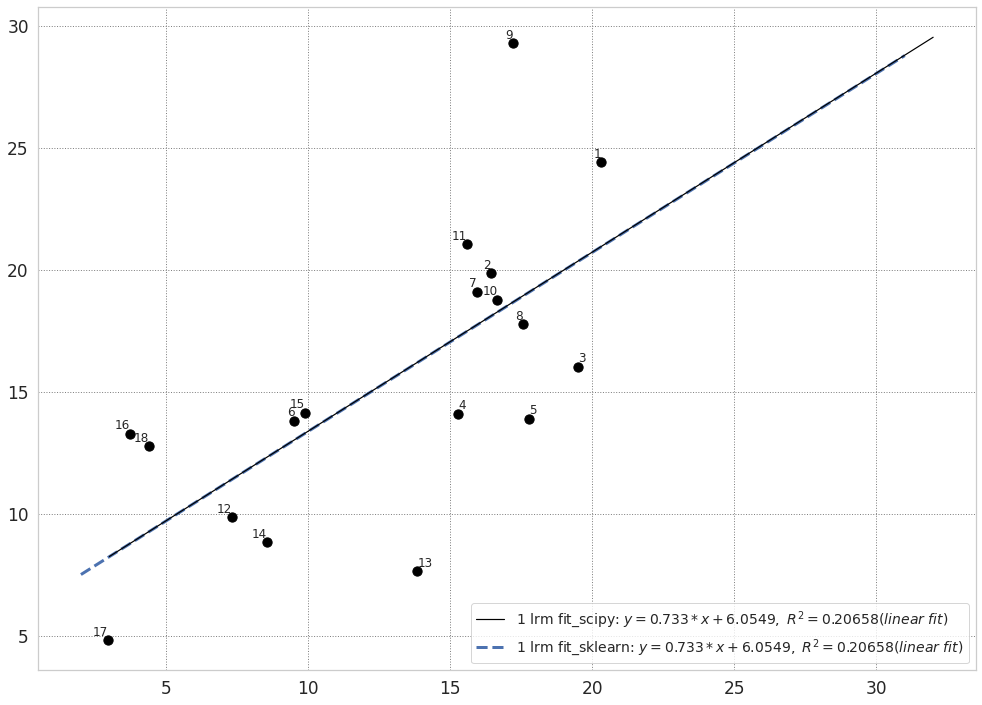

In [95]:
## Test PLot6:
###  GCM output and LRM regressed: d(LWP)|abr - mean(pi)

# plot settings:
parameters = {'axes.labelsize': 15, 'legend.fontsize': 14, 
       'axes.titlesize': 16, 'xtick.labelsize': 17, 'ytick.labelsize': 17}
plt.rcParams.update(parameters)


fig6  = plt.figure(figsize =(16.8, 12.2))  # (16.2, 9.3))
ax6  = plt.axes()

# x = arange(0.003, 0.018, 0.001)   #..15 yr
# x = arange(0.006, 0.032, 0.001)   #..150yrs
x   = linspace(0.002, 0.031, 18) * 1000.   # for all
y   = linspace(0.003, 0.032, 18) * 1000.
# deck_marker = [',', '.', 'v', '^', '<', '>', 'o', '1', '2', '3', '4', 'P', 'h', 'x', 'd', '8', 's', 'D']
n_name  =     [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]
# output_dabr_pi_obspredi  = {}

output_mons = {}
regr_data_0K =   []
report_data_0K =   []

regr_data_273K = []
report_data_273K = []

regr_data_leastabrbias = []
report_data_leastabrbias = []

regr_data_largestpiR2 = []
report_data_largestpiR2 = []

yr   =  150
# plt.gcf()

plot_scat1 = []
plot_scat2 = []
plot_scat3 = []
plot_scat4 = []


for a in range(len(deck2)):    
    
    output_mons[deck_nas2[a]]  = arange(shape_mon_modelabr[deck_nas2[a]])   #..how many years for collected 'abr-4x' data

    scp1 = ax6.scatter(1000.*output_meandelta_LWP[deck_nas2[a]+'_predict_150yrs_0K'], 1000.*output_meandelta_LWP[deck_nas2[a]+'_actual_150yrs_0K'], s=86, marker ='o', color="black") # black
    regr_data_0K = append(regr_data_0K, 1000.*output_meandelta_LWP[deck_nas2[a]+'_predict_150yrs_0K'])
    report_data_0K = append(report_data_0K, 1000.*output_meandelta_LWP[deck_nas2[a]+'_actual_150yrs_0K'])
    # scatter group1
    plot_scat1.append(scp1)
    
    # Add annotate to the first point of each GCM
    ax6.annotate(n_name[a], xy=(1000.*output_meandelta_LWP[deck_nas2[a]+'_predict_150yrs_0K'], 1000.*output_meandelta_LWP[deck_nas2[a]+'_actual_150yrs_0K']), 
                 xytext=(0, 2.17 - random.rand(1)), textcoords = "offset points", 
                 horizontalalignment= "left" if output_meandelta_LWP[deck_nas2[a]+'_predict_150yrs_0K'] > output_meandelta_LWP[deck_nas2[a]+'_actual_150yrs_0K'] else "right", verticalalignment = "bottom")


#.. linear curve fit for regressed d(LWP) and reported d(LWP) for 0K
POPT_0K, POCV_0K  = curve_fit(target_func, regr_data_0K, report_data_0K)
# Calc the R square, plot the fit line:
calced_ydata_0K = target_func(regr_data_0K, *POPT_0K)   #..[target_func(x, POPT[0], POPT[1]) for x in regr_data]
R_square_0K  = calc_r2(regr_data_0K, report_data_0K)
fitp1 = plt.plot(y, POPT_0K[0] * y + POPT_0K[1], label="1 lrm fit_scipy: "+r"$y = %.3f * x + %.4f,\ R^{2}=%.5f(linear\ fit)$" % (POPT_0K[0], POPT_0K[1], R_square_0K), color="black", linewidth = 1.2, zorder = 4)
print(POPT_0K[0], POPT_0K[1])

# sklearn-liner regression 
regr_skk  = linear_model.LinearRegression()

result1 = regr_skk.fit(regr_data_0K.reshape(-1,1), report_data_0K.reshape(-1,1))
print(result1.coef_, result1.intercept_ , r2_score(y.reshape(-1,1),x.reshape(-1,1)))

fitp2 = plt.plot(x, (x * 0.733 + 6.05), linestyle = '--', linewidth=3, label="1 lrm fit_sklearn: "+r"$y = %.3f * x + %.4f,\ R^{2}=%.5f(linear\ fit)$" % (regr_skk.coef_, regr_skk.intercept_, r2_score(report_data_0K.reshape(-1,1), regr_data_0K.reshape(-1,1))))
# Add Reference line:
# Refp  = plt.plot(x, y, label = 'reference line', c='blue', linestyle='--', linewidth = 3.8, zorder = 5)  # Blue

# sns.set_style("darkgrid", {"grid.color": "gray", "grid.linestyle": ":"})
plt.legend()
print(linspace(0.002, 0.031, 18)*1000. * result1.coef_)

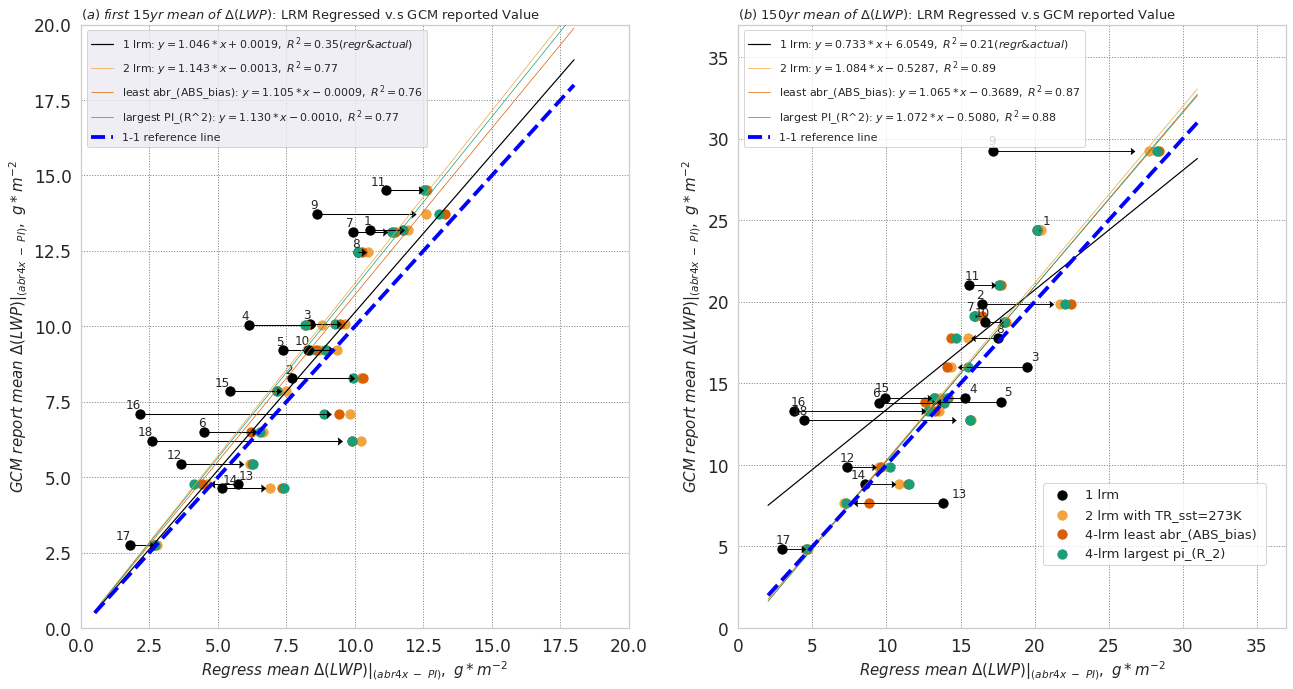

In [96]:
## PLot6:
###  GCM output and LRM regressed: d(LWP)|abr - mean(pi)

# plot settings:
parameters = {'axes.labelsize': 15, 'legend.fontsize': 11, 
       'axes.titlesize': 16, 'xtick.labelsize': 17, 'ytick.labelsize': 17}
plt.rcParams.update(parameters)


fig6, ax6  = plt.subplots(1, 2, figsize =(21.6, 11.1))  # (16.2, 9.3))

x_15yr = linspace(0.0005, 0.018, 18) *1000.  #..15 yr
y_15yr = x_15yr
x   = linspace(0.002, 0.031, 18) * 1000.   # for all 150yr
y   = x

# deck_marker = [',', '.', 'v', '^', '<', '>', 'o', '1', '2', '3', '4', 'P', 'h', 'x', 'd', '8', 's', 'D']
n_name  =     [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]
# output_dabr_pi_obspredi  = {}

# 15yr 
regr_data_0K_15yr =   []
report_data_0K_15yr =   []
regr_data_273K_15yr = []
report_data_273K_15yr = []
regr_data_leastabrbias_15yr = []
report_data_leastabrbias_15yr = []
regr_data_largestpiR2_15yr = []
report_data_largestpiR2_15yr = []


# 150 yr
regr_data_0K =   []
report_data_0K =   []
regr_data_273K = []
report_data_273K = []
regr_data_leastabrbias = []
report_data_leastabrbias = []
regr_data_largestpiR2 = []
report_data_largestpiR2 = []

yr1   =  150
yr2   =  15
# plt.gcf()
output_mons   =  {}
plot_scat1 = []
plot_scat2 = []
plot_scat3 = []
plot_scat4 = []

plot_scat1_15yr = []
plot_scat2_15yr = []
plot_scat3_15yr = []
plot_scat4_15yr = []

# 150 yr
for a in range(len(deck2)):    
    
    output_mons[deck_nas2[a]]  = arange(shape_mon_modelabr[deck_nas2[a]])   #..how many years for collected 'abr-4x' data

    scp1 = ax6[1].scatter(1000.*output_meandelta_LWP[deck_nas2[a]+'_predict_150yrs_0K'], 1000.*output_meandelta_LWP[deck_nas2[a]+'_actual_150yrs_0K'], s=86, marker ='o', color="black") # black
    regr_data_0K = append(regr_data_0K, 1000.*output_meandelta_LWP[deck_nas2[a]+'_predict_150yrs_0K'])
    report_data_0K = append(report_data_0K, 1000.*output_meandelta_LWP[deck_nas2[a]+'_actual_150yrs_0K'])
    # scatter group1
    plot_scat1.append(scp1)
    
    scp2 = ax6[1].scatter(1000.*output_meandelta_LWP[deck_nas2[a]+'_predict_150yrs_273K'], 1000.*output_meandelta_LWP[deck_nas2[a]+'_actual_150yrs_273K'], s=86, marker ='o', color="#f1a340") # yellow
    regr_data_273K = append(regr_data_273K, 1000.*output_meandelta_LWP[deck_nas2[a]+'_predict_150yrs_273K'])
    report_data_273K = append(report_data_273K, 1000.*output_meandelta_LWP[deck_nas2[a]+'_actual_150yrs_273K'])
    # scatter group2
    plot_scat2.append(scp2)
    
    scp3 = ax6[1].scatter(1000.*output_meandelta_LWP[deck_nas2[a]+'_predict_150yrs_leastabrbias'], 1000.*output_meandelta_LWP[deck_nas2[a]+'_actual_150yrs_leastabrbias'], s=86, marker = 'o', color="#d95f02")# red
    regr_data_leastabrbias = append(regr_data_leastabrbias, 1000.*output_meandelta_LWP[deck_nas2[a]+'_predict_150yrs_leastabrbias'])
    report_data_leastabrbias = append(report_data_leastabrbias, 1000.*output_meandelta_LWP[deck_nas2[a]+'_actual_150yrs_leastabrbias'])
    # scatter group3
    plot_scat3.append(scp3)
    
    scp4 = ax6[1].scatter(1000.*output_meandelta_LWP[deck_nas2[a]+'_predict_150yrs_largestpiR2'], 1000.*output_meandelta_LWP[deck_nas2[a]+'_actual_150yrs_largestpiR2'], s=86, marker ='o', color="#1b9e77") # green
    regr_data_largestpiR2 = append(regr_data_largestpiR2, 1000.*output_meandelta_LWP[deck_nas2[a]+'_predict_150yrs_largestpiR2'])
    report_data_largestpiR2 = append(report_data_largestpiR2, 1000.*output_meandelta_LWP[deck_nas2[a]+'_actual_150yrs_largestpiR2'])
    # scatter group4
    plot_scat4.append(scp4)
    
    
    # #.. Observation (MAC_LWP) calced sensitivity for each of GCMs
    # output_dabr_pi_obspredi[deck_nas2[a]]  = output_obsercoef_predi[deck_nas2[a]][shape_yr_modelPI[deck_nas2[a]]:] - mean(output_obsercoef_predi[deck_nas2[a]][0:shape_yr_modelPI[deck_nas[a]]])
    # plt.scatter(output_dabr_pi_obspredi[deck_nas2[a]][yr],  output_dabr_pi_report[deck_nas2[a]][yr] , s = 125., label = deck_nas2[a] + ' add OBS sensitivities')
    # h = append(h, output_dabr_pi_obspredi[deck_nas2[a]])
    
    # Add line/Arrows between scatter Point(S)
    # print()
    ax6[1].quiver(1000.*output_meandelta_LWP[deck_nas2[a]+'_predict_150yrs_0K'], 1000.*output_meandelta_LWP[deck_nas2[a]+'_actual_150yrs_0K'], 
               1000.*(output_meandelta_LWP[deck_nas2[a]+'_predict_150yrs_273K'] - output_meandelta_LWP[deck_nas2[a]+'_predict_150yrs_0K']),
               1000.*(output_meandelta_LWP[deck_nas2[a]+'_actual_150yrs_273K'] - output_meandelta_LWP[deck_nas2[a]+'_actual_150yrs_273K']),
              units='width', angles='xy', scale_units='xy', width=0.0017, scale = 1.10, color = "black", headwidth=8, zorder=2)

    # Add annotate to the first point of each GCM
    ax6[1].annotate(n_name[a], xy=(1000.*output_meandelta_LWP[deck_nas2[a]+'_predict_150yrs_0K'], 1000.*output_meandelta_LWP[deck_nas2[a]+'_actual_150yrs_0K']), 
                 xytext=(12.9*random.rand(1), 2.77), textcoords = "offset points", 
                 horizontalalignment= "left" if output_meandelta_LWP[deck_nas2[a]+'_predict_150yrs_0K'] > output_meandelta_LWP[deck_nas2[a]+'_actual_150yrs_0K'] else "right", verticalalignment = "bottom")

#.. linear curve fit for regressed d(LWP) and reported d(LWP) for 0K
POPT_0K, POCV_0K  = curve_fit(target_func, regr_data_0K , report_data_0K)
# Calc the R square, plot the fit line:
calced_ydata_0K = target_func(regr_data_0K, *POPT_0K)   #..[target_func(x, POPT[0], POPT[1]) for x in regr_data]
R_square_0K  = calc_r2(regr_data_0K, report_data_0K)
fitp1 = ax6[1].plot(y, POPT_0K[0] * x + POPT_0K[1], label="1 lrm: "+r"$y = %.3f * x + %.4f,\ R^{2}= %.2f(regr&actual)$" % (POPT_0K[0], POPT_0K[1], R_square_0K), color="black", linewidth = 1.2, zorder = 4)

#.. linear curve fit for regressed d(LWP) and reported d(LWP) for 273K
POPT_273K, POCV_273K  = curve_fit(target_func, regr_data_273K, report_data_273K)
# Calc the R square, plot the fit line:
calced_ydata_273K  = target_func(regr_data_273K, *POPT_273K)   #..[target_func(x, POPT[0], POPT[1]) for x in regr_data]
R_square_273K  = calc_r2(regr_data_273K, report_data_273K)
fitp2 = ax6[1].plot(y, POPT_273K[0] * x + POPT_273K[1], label="2 lrm: "+r"$y = %.3f * x %.4f,\ R^{2}= %.2f$"% (POPT_273K[0], POPT_273K[1], R_square_273K), color="#f1a340", linewidth = 0.7, zorder = 4)


#.. linear curve fit for regressed d(LWP) and reported d(LWP) for least_bias model
POPT_leastabrbias, POCV_leastabrbias  = curve_fit(target_func, regr_data_leastabrbias, report_data_leastabrbias)
# Calc the R square, plot the fit line:
calced_ydata_leastabrbias = target_func(regr_data_leastabrbias, *POPT_leastabrbias)   #..[target_func(x, POPT[0], POPT[1]) for x in regr_data]
R_square_leastabrbias  = calc_r2(regr_data_leastabrbias, report_data_leastabrbias)
fitp3 = ax6[1].plot(y, POPT_leastabrbias[0] * x + POPT_leastabrbias[1], label="least abr_(ABS_bias): "+r"$y = %.3f * x %.4f,\ R^{2}= %.2f$"% (POPT_leastabrbias[0], POPT_leastabrbias[1], R_square_leastabrbias), color="#d95f02", linewidth = 0.7, zorder = 4)

#.. linear curve fit for regressed d(LWP) and reported d(LWP) for largest_pi_R_2 model
POPT_largestpiR2, POCV_largestpiR2  = curve_fit(target_func, regr_data_largestpiR2, report_data_largestpiR2)
# Calc the R square, plot the fit line:
calced_ydata_largestpiR2 = target_func(regr_data_largestpiR2, *POPT_largestpiR2)   #..[target_func(x, POPT[0], POPT[1]) for x in regr_data]
R_square_largestpiR2  = calc_r2(regr_data_largestpiR2, report_data_largestpiR2)
fitp3 = ax6[1].plot(y, POPT_largestpiR2[0] * x + POPT_largestpiR2[1], label= "largest PI_(R^2): "+r"$y = %.3f * x %.4f,\ R^{2}= %.2f$"% (POPT_largestpiR2[0], POPT_largestpiR2[1], R_square_largestpiR2), color="#1b9e77", linewidth = 0.7, zorder = 4)

###### end fitting_line plot

# Add Reference line:
Refp  = ax6[1].plot(x, y, label = "1-1 reference line", c='blue', linestyle= '--', linewidth = 3.8, zorder = 5)  # Blue


# Observational band:
# plt.plot(full(len(x), (min(h) - 0.0001)) ,y, linestyle = '--' , c = 'k', linewidth = 1.3)
# plt.plot(full(len(x), (max(h) + 0.0001)) ,y, linestyle = '--' , c = 'k', linewidth = 1.3)
ax6[1].set_xlim([0., 37.])
ax6[1].set_ylim([0., 37.])

ax6[1].set_xlabel(r"$ Regress\ mean\ \Delta (LWP)|_{(abr4x\ -\ PI)},\ $" + r"$g*m^{-2}$")
ax6[1].set_ylabel(r"$ GCM\ report\ mean\ \Delta (LWP)|_{(abr4x\ -\ PI)},\ $" + r"$g*m^{-2}$")

ax6[1].set_title( r"$(b)\ %d yr\ mean\ of\ \Delta(LWP)$"%(yr1) +": LRM Regressed v.s GCM reported Value" , loc ='left', fontsize =13)
legend61 = ax6[1].legend([scp1, scp2, scp3, scp4], ['1 lrm', '2 lrm with TR_sst=273K ', '4-lrm least abr_(ABS_bias) ', '4-lrm largest pi_(R_2)'], 
                    loc='lower right', bbox_to_anchor=(0.975, 0.093), fontsize= 13)
ax6[1].legend(loc='upper left')
ax6[1].add_artist(legend61)

sns.set_style("darkgrid", {"grid.color": "gray", "grid.linestyle": ":"})


# 15yr:

for a in range(len(deck2)):    
    

    scp1_15yr = ax6[0].scatter(1000.*output_meandelta_LWP[deck_nas2[a]+'_predict_15yrs_0K'], 1000.*output_meandelta_LWP[deck_nas2[a]+'_actual_15yrs_0K'], s=86, marker ='o', color="black") # black
    regr_data_0K_15yr = append(regr_data_0K_15yr, output_meandelta_LWP[deck_nas2[a]+'_predict_15yrs_0K'])
    report_data_0K_15yr = append(report_data_0K_15yr, output_meandelta_LWP[deck_nas2[a]+'_actual_15yrs_0K'])
    # scatter group1
    plot_scat1_15yr.append(scp1_15yr)
    
    scp2_15yr = ax6[0].scatter(1000.*output_meandelta_LWP[deck_nas2[a]+'_predict_15yrs_273K'], 1000.*output_meandelta_LWP[deck_nas2[a]+'_actual_15yrs_273K'], s=86, marker ='o', color="#f1a340") # yellow
    regr_data_273K_15yr = append(regr_data_273K_15yr, output_meandelta_LWP[deck_nas2[a]+'_predict_15yrs_273K'])
    report_data_273K_15yr = append(report_data_273K_15yr, output_meandelta_LWP[deck_nas2[a]+'_actual_15yrs_273K'])
    # scatter group2
    plot_scat2_15yr.append(scp2_15yr)
    
    scp3_15yr = ax6[0].scatter(1000.*output_meandelta_LWP[deck_nas2[a]+'_predict_15yrs_leastabrbias'], 1000.*output_meandelta_LWP[deck_nas2[a]+'_actual_15yrs_leastabrbias'], s=86, marker = 'o', color="#d95f02")# red
    regr_data_leastabrbias_15yr = append(regr_data_leastabrbias_15yr, output_meandelta_LWP[deck_nas2[a]+'_predict_15yrs_leastabrbias'])
    report_data_leastabrbias_15yr = append(report_data_leastabrbias_15yr, output_meandelta_LWP[deck_nas2[a]+'_actual_15yrs_leastabrbias'])
    # scatter group3
    plot_scat3_15yr.append(scp3_15yr)
    
    scp4_15yr = ax6[0].scatter(1000.*output_meandelta_LWP[deck_nas2[a]+'_predict_15yrs_largestpiR2'], 1000.*output_meandelta_LWP[deck_nas2[a]+'_actual_15yrs_largestpiR2'], s=86, marker ='o', color="#1b9e77") # green
    regr_data_largestpiR2_15yr = append(regr_data_largestpiR2_15yr, output_meandelta_LWP[deck_nas2[a]+'_predict_15yrs_largestpiR2'])
    report_data_largestpiR2_15yr = append(report_data_largestpiR2_15yr, output_meandelta_LWP[deck_nas2[a]+'_actual_15yrs_largestpiR2'])
    # scatter group4
    plot_scat4_15yr.append(scp4_15yr)
    
    
    # #.. Observation (MAC_LWP) calced sensitivity for each of GCMs
    # output_dabr_pi_obspredi[deck_nas2[a]]  = output_obsercoef_predi[deck_nas2[a]][shape_yr_modelPI[deck_nas2[a]]:] - mean(output_obsercoef_predi[deck_nas2[a]][0:shape_yr_modelPI[deck_nas[a]]])
    # plt.scatter(output_dabr_pi_obspredi[deck_nas2[a]][yr],  output_dabr_pi_report[deck_nas2[a]][yr] , s = 125., label = deck_nas2[a] + ' add OBS sensitivities')
    # h = append(h, output_dabr_pi_obspredi[deck_nas2[a]])
    
    # Add line/Arrows between scatter Point(S)
    # print()
    ax6[0].quiver(1000.*output_meandelta_LWP[deck_nas2[a]+'_predict_15yrs_0K'], 1000.*output_meandelta_LWP[deck_nas2[a]+'_actual_15yrs_0K'], 
               1000.*(output_meandelta_LWP[deck_nas2[a]+'_predict_15yrs_273K'] - output_meandelta_LWP[deck_nas2[a]+'_predict_15yrs_0K']),
               1000.*(output_meandelta_LWP[deck_nas2[a]+'_actual_15yrs_273K'] - output_meandelta_LWP[deck_nas2[a]+'_actual_15yrs_273K']),
              units='width', angles='xy', scale_units='xy', width=0.0019, scale = 1.10, color = "black", headwidth=8, zorder=2)

    # Add annotate to the first point of each GCM
    ax6[0].annotate(n_name[a], xy=(1000.*output_meandelta_LWP[deck_nas2[a]+'_predict_15yrs_0K'], 1000.*output_meandelta_LWP[deck_nas2[a]+'_actual_15yrs_0K']), 
                 xytext=(1.3*random.rand(1), 2.77-random.rand(1)), textcoords = "offset points", arrowprops=dict(facecolor='black', shrink=0.95), 
                 horizontalalignment= "left" if output_meandelta_LWP[deck_nas2[a]+'_predict_15yrs_0K'] > output_meandelta_LWP[deck_nas2[a]+'_actual_15yrs_0K'] else "right", verticalalignment = "bottom")

    
#.. linear curve fit for regressed d(LWP) and reported d(LWP) for 0K
POPT_0K_15yr, POCV_0K_15yr  = curve_fit(target_func, regr_data_0K_15yr , report_data_0K_15yr)
# Calc the R square, plot the fit line:
R_square_0K_15yr  = calc_r2(regr_data_0K_15yr, report_data_0K_15yr)
fitp1_15yr = ax6[0].plot(y_15yr, POPT_0K_15yr[0] * x_15yr + POPT_0K_15yr[1], label="1 lrm: "+r"$y = %.3f * x + %.4f,\ R^{2}= %.2f(regr&actual)$" % (POPT_0K_15yr[0], POPT_0K_15yr[1], R_square_0K_15yr), color="black", linewidth = 1.2, zorder = 4)

#.. linear curve fit for regressed d(LWP) and reported d(LWP) for 273K
POPT_273K_15yr, POCV_273K_15yr  = curve_fit(target_func, regr_data_273K_15yr, report_data_273K_15yr)
# Calc the R square, plot the fit line:
R_square_273K_15yr  = calc_r2(regr_data_273K_15yr, report_data_273K_15yr)
fitp2_15yr = ax6[0].plot(y_15yr, POPT_273K_15yr[0] * x_15yr + POPT_273K_15yr[1], label="2 lrm: "+r"$y = %.3f * x %.4f,\ R^{2}= %.2f$"% (POPT_273K_15yr[0], POPT_273K_15yr[1], R_square_273K_15yr), color="#f1a340", linewidth = 0.7, zorder = 4)

#.. linear curve fit for regressed d(LWP) and reported d(LWP) for least_bias model
POPT_leastabrbias_15yr, POCV_leastabrbias_15yr  = curve_fit(target_func, regr_data_leastabrbias_15yr, report_data_leastabrbias_15yr)
# Calc the R square, plot the fit line:
R_square_leastabrbias_15yr  = calc_r2(regr_data_leastabrbias_15yr, report_data_leastabrbias_15yr)
fitp3_15yr = ax6[0].plot(y_15yr, POPT_leastabrbias_15yr[0] * x_15yr + POPT_leastabrbias_15yr[1], label="least abr_(ABS_bias): "+r"$y = %.3f * x %.4f,\ R^{2}= %.2f$"% (POPT_leastabrbias_15yr[0], POPT_leastabrbias_15yr[1], R_square_leastabrbias_15yr), color="#d95f02", linewidth = 0.7, zorder = 4)

#.. linear curve fit for regressed d(LWP) and reported d(LWP) for largest_pi_R_2 model
POPT_largestpiR2_15yr, POCV_largestpiR2_15yr  = curve_fit(target_func, regr_data_largestpiR2_15yr, report_data_largestpiR2_15yr)
# Calc the R square, plot the fit line:
R_square_largestpiR2_15yr  = calc_r2(regr_data_largestpiR2_15yr, report_data_largestpiR2_15yr)
fitp3_15yr = ax6[0].plot(y_15yr, POPT_largestpiR2_15yr[0] * x_15yr + POPT_largestpiR2_15yr[1], label= "largest PI_(R^2): "+r"$y = %.3f * x %.4f,\ R^{2}= %.2f$"% (POPT_largestpiR2_15yr[0], POPT_largestpiR2_15yr[1], R_square_largestpiR2_15yr), color="#1b9e77", linewidth = 0.7, zorder = 4)

###### end fitting_line plot

# Add Reference line:
Refp  = ax6[0].plot(x_15yr, y_15yr, label = "1-1 reference line", c='blue', linestyle= '--', linewidth = 3.8, zorder = 5)  # Blue


# Observational band:
# plt.plot(full(len(x), (min(h) - 0.0001)) ,y, linestyle = '--' , c = 'k', linewidth = 1.3)
# plt.plot(full(len(x), (max(h) + 0.0001)) ,y, linestyle = '--' , c = 'k', linewidth = 1.3)

ax6[0].set_xlim([0., 20.])
ax6[0].set_ylim([0., 20.])


ax6[0].set_xlabel(r"$ Regress\ mean\ \Delta (LWP)|_{(abr4x\ -\ PI)},\ $" + r"$g*m^{-2}$")
ax6[0].set_ylabel(r"$ GCM\ report\ mean\ \Delta (LWP)|_{(abr4x\ -\ PI)},\ $" + r"$g*m^{-2}$")

ax6[0].set_title( r"$(a)\ first\ %d yr\ mean\ of\ \Delta(LWP)$"%(yr2) +": LRM Regressed v.s GCM reported Value" , loc ='left', fontsize =13)
legend62 = ax6[0].legend([scp1_15yr, scp2_15yr, scp3_15yr, scp4_15yr], ['1 lrm', '2 lrm with TR_sst=273K ', '4-lrm least abr_(ABS_bias) ', '4-lrm largest pi_(R_2)'], 
                    loc='lower right', bbox_to_anchor=(0.965, 0.093), fontsize= 13)
ax6[0].legend(loc='upper left')
# ax6[0].add_artist(legend62)

# plt.savefig('plot6_Scatters_0K&273K&Bestfit5&6_Compositeonmeand(LWP)', dpi = 500)


In [ ]:
print(1000.*regr_data_0K)
print(1000.*report_data_0K)

x = array([20.31969288, 16.42245359, 19.49929039, 15.27522641, 17.75969895,  9.51465783,
 15.94579419 , 17.55826368, 17.21027466, 16.65799056, 15.5973086,   7.3153503, 13.83997309,  8.53506344,  9.8733702,   3.73919073,  2.95396728,  4.40829008]) *(1./1000)

y = array([24.39877929, 19.85377042, 16.03064902, 14.07887328, 13.88738618, 13.82360605,
 19.10723209, 17.77672482, 29.278003,   18.77615813, 21.04546457,  9.86254724, 7.67339088,  8.84114473, 14.13177421,  13.29088098,  4.82944001, 12.76356024 ]) *(1./1000)

x = regr_data_0K
y = report_data_0K
popt, pocv = curve_fit(target_func, x ,y)
print(popt)

# sklearn-liner regression 
regr_skk  = linear_model.LinearRegression()

result1 = regr_skk.fit(x.reshape(-1,1), y.reshape(-1,1))
print(regr_skk.coef_, regr_skk.intercept_ , r2_score(y.reshape(-1,1),x.reshape(-1,1)))

[20319.69288483 16422.45359475 19499.29038735 15275.22641057
 17759.69894507  9514.65782656 15945.79419191 17558.26368307
 17210.27466096 16657.99055837 15597.30860014  7315.35030326
 13839.97308984  8535.06344272  9873.3701958   3739.1907333
  2953.96727937  4408.29008058]
[24398.77929157 19853.77042408 16030.64901707 14078.8732788
 13887.38617743 13823.60605399 19107.23208543 17776.72482239
 29278.00300434 18776.15812618 21045.46457308  9862.54724272
  7673.3908781   8841.14472732 14131.77420522 13290.88098478
  4829.44001401 12763.56023633]
[0.73339819 6.05492678]
[[0.73339819]] [6.05492678] 0.20658021595794296


/glade/u/ssg/ch/usr/jupyterhub/envs/npl-3.7.9/dav/lib/python3.7/site-packages/ipykernel_launcher.py:145: UserWarning: Legend does not support [<matplotlib.lines.Line2D object at 0x2ba110ff5d10>] instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists


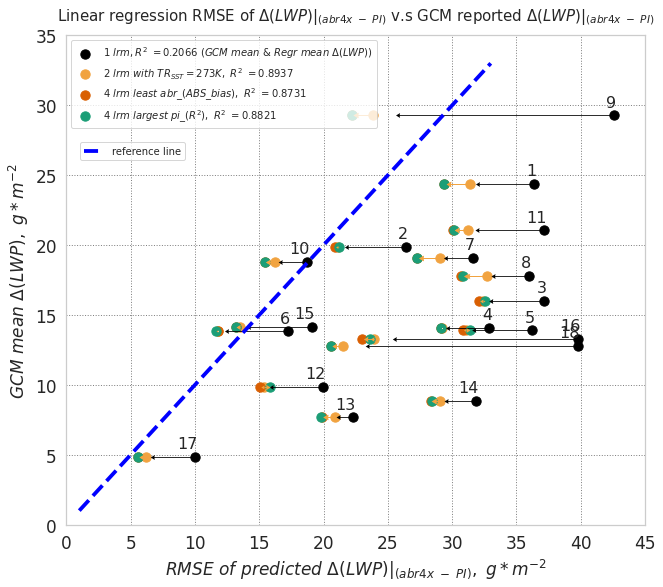

In [130]:
## PLot6(Alternate):
###  GCM output and LRM regressed: d(LWP)|abr - mean(pi)

# plot settings:
parameters = {'axes.labelsize': 17, 'legend.fontsize': 10, 
       'axes.titlesize': 16, 'xtick.labelsize': 17, 'ytick.labelsize': 17}
plt.rcParams.update(parameters)


fig6  = plt.figure(figsize =(10.37, 9.0))  # (16.2, 9.3))
ax6  = plt.axes()

# x = arange(0.003, 0.018, 0.001)   #..15 yr
# x = arange(0.006, 0.032, 0.001)   #..150yrs
x   = linspace(0.001, 0.033, 18) * 1000.   # for all
y   = x
# deck_marker = [',', '.', 'v', '^', '<', '>', 'o', '1', '2', '3', '4', 'P', 'h', 'x', 'd', '8', 's', 'D']
n_name  =     [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]
# output_dabr_pi_obspredi  = {}

output_mons = {}

regr_data_0K =   []
report_data_0K =   []
regr_data_273K = []
report_data_273K = []
regr_data_leastabrbias = []
report_data_leastabrbias = []
regr_data_largestpiR2 = []
report_data_largestpiR2 = []

yr   =  150
# plt.gcf()

plot_scat1 = []
plot_scat2 = []
plot_scat3 = []
plot_scat4 = []


for a in range(len(deck2)):    
    
    output_mons[deck_nas2[a]]  = arange(shape_mon_modelabr[deck_nas2[a]])   #..how many years for collected 'abrupt-4x' data

    scp1 = ax6.scatter(1000.*output_rmse_delta_LWP[deck_nas2[a]+'_predict_150yrs_0K'], 1000.*output_meandelta_LWP[deck_nas2[a]+'_actual_150yrs_0K'], s=87, marker ='o', color="black") # black
    regr_data_0K = append(regr_data_0K, output_meandelta_LWP[deck_nas2[a]+'_predict_150yrs_0K'])
    report_data_0K = append(report_data_0K, output_meandelta_LWP[deck_nas2[a]+'_actual_150yrs_0K'])
    # scatter group1
    plot_scat1.append(scp1)
    
    scp2 = ax6.scatter(1000.*output_rmse_delta_LWP[deck_nas2[a]+'_predict_150yrs_273K'], 1000.*output_meandelta_LWP[deck_nas2[a]+'_actual_150yrs_273K'], s=87, marker ='o', color="#f1a340") # yellow
    regr_data_273K = append(regr_data_273K, output_meandelta_LWP[deck_nas2[a]+'_predict_150yrs_273K'])
    report_data_273K = append(report_data_273K, output_meandelta_LWP[deck_nas2[a]+'_actual_150yrs_273K'])
    # scatter group2
    plot_scat2.append(scp2)
    
    scp3 = ax6.scatter(1000.*output_rmse_delta_LWP[deck_nas2[a]+'_predict_150yrs_leastabrbias'], 1000.*output_meandelta_LWP[deck_nas2[a]+'_actual_150yrs_leastabrbias'], s=87, marker = 'o', color="#d95f02")# red
    regr_data_leastabrbias = append(regr_data_leastabrbias, output_meandelta_LWP[deck_nas2[a]+'_predict_150yrs_leastabrbias'])
    report_data_leastabrbias = append(report_data_leastabrbias, output_meandelta_LWP[deck_nas2[a]+'_actual_150yrs_leastabrbias'])
    # scatter group3
    plot_scat3.append(scp3)
    
    scp4 = ax6.scatter(1000.*output_rmse_delta_LWP[deck_nas2[a]+'_predict_150yrs_largestpiR2'], 1000.*output_meandelta_LWP[deck_nas2[a]+'_actual_150yrs_largestpiR2'], s=87, marker ='o', color="#1b9e77") # green
    regr_data_largestpiR2 = append(regr_data_largestpiR2, output_meandelta_LWP[deck_nas2[a]+'_predict_150yrs_largestpiR2'])
    report_data_largestpiR2 = append(report_data_largestpiR2, output_meandelta_LWP[deck_nas2[a]+'_actual_150yrs_largestpiR2'])
    # scatter group4
    plot_scat4.append(scp4)
    
    
    # #.. Observation (MAC_LWP) calced sensitivity for each of GCMs
    # output_dabr_pi_obspredi[deck_nas2[a]]  = output_obsercoef_predi[deck_nas2[a]][shape_yr_modelPI[deck_nas2[a]]:] - mean(output_obsercoef_predi[deck_nas2[a]][0:shape_yr_modelPI[deck_nas[a]]])
    # plt.scatter(output_dabr_pi_obspredi[deck_nas2[a]][yr],  output_dabr_pi_report[deck_nas2[a]][yr] , s = 125., label = deck_nas2[a] + ' add OBS sensitivities')
    # h = append(h, output_dabr_pi_obspredi[deck_nas2[a]])
    
    # Add line/Arrows between scatter Point(S)
    # print()
    ax6.quiver(1000.*output_rmse_delta_LWP[deck_nas2[a]+'_predict_150yrs_0K'], 1000.*output_meandelta_LWP[deck_nas2[a]+'_actual_150yrs_0K'], 
               1000.*(output_rmse_delta_LWP[deck_nas2[a]+'_predict_150yrs_273K'] - output_rmse_delta_LWP[deck_nas2[a]+'_predict_150yrs_0K']),
               1000.*(output_meandelta_LWP[deck_nas2[a]+'_actual_150yrs_273K'] - output_meandelta_LWP[deck_nas2[a]+'_actual_150yrs_273K']),
              units='width', angles='xy', scale_units='xy', width=0.0014, scale = 1.10, color = "black", headwidth=6, zorder=2)

    ax6.quiver(1000.*output_rmse_delta_LWP[deck_nas2[a]+'_predict_150yrs_273K'], 1000.*output_meandelta_LWP[deck_nas2[a]+'_actual_150yrs_273K'], 
               1000.*(output_rmse_delta_LWP[deck_nas2[a]+'_predict_150yrs_leastabrbias'] - output_rmse_delta_LWP[deck_nas2[a]+'_predict_150yrs_273K']), 
               1000.*(output_meandelta_LWP[deck_nas2[a]+'_actual_150yrs_leastabrbias'] - output_meandelta_LWP[deck_nas2[a]+'_actual_150yrs_273K']), 
              units='width', angles='xy', scale_units='xy', width=0.0016, scale = 1.09, color = "#f1a340", headwidth=6, zorder=4)

    ax6.quiver(1000.*output_rmse_delta_LWP[deck_nas2[a]+'_predict_150yrs_273K'], 1000.*output_meandelta_LWP[deck_nas2[a]+'_actual_150yrs_273K'], 
             1000.*(output_rmse_delta_LWP[deck_nas2[a]+'_predict_150yrs_largestpiR2'] - output_rmse_delta_LWP[deck_nas2[a]+'_predict_150yrs_273K']), 
             1000.*(output_meandelta_LWP[deck_nas2[a]+'_actual_150yrs_largestpiR2']-  output_meandelta_LWP[deck_nas2[a]+'_actual_150yrs_273K']), 
              units='width', angles='xy', scale_units='xy', width=0.0016, scale = 1.09, color=  "#f1a340", headwidth=6, zorder=3)

    # Add annotate to the first point of each GCM
    ax6.annotate(n_name[a], xy=(1000.*output_rmse_delta_LWP[deck_nas2[a]+'_predict_150yrs_0K'], 1000.*output_meandelta_LWP[deck_nas2[a]+'_actual_150yrs_0K']), 
                 xytext=(2.69, 5.67), textcoords = "offset points", 
                 horizontalalignment= "right", verticalalignment = "bottom", fontsize = 16)


# #.. linear curve fit for regressed d(LWP) and reported d(LWP) for 0K
# POPT_0K, POCV_0K  = curve_fit(target_func, regr_data_0K , report_data_0K)
# # Calc the R square, plot the fit line:
# calced_ydata_0K = target_func(regr_data_0K, *POPT_0K)   #..[target_func(x, POPT[0], POPT[1]) for x in regr_data]
# R_square_0K  = calc_r2(regr_data_0K, report_data_0K)
# fitp1 = plt.plot(y, POPT_0K[0] * x + POPT_0K[1], label="1 lrm: "+r"$y = %.3f * x + %.4f,\ R^{2}= %.5f(regr&actual)$" % (POPT_0K[0], POPT_0K[1], R_square_0K), color="black", linewidth = 1.2, zorder = 4)

# #.. linear curve fit for regressed d(LWP) and reported d(LWP) for 273K
# POPT_273K, POCV_273K  = curve_fit(target_func, regr_data_273K, report_data_273K)
# # Calc the R square, plot the fit line:
# calced_ydata_273K  = target_func(regr_data_273K, *POPT_273K)   #..[target_func(x, POPT[0], POPT[1]) for x in regr_data]
# R_square_273K  = calc_r2(regr_data_273K, report_data_273K)
# fitp2 = plt.plot(y, POPT_273K[0] * x + POPT_273K[1], label="2 lrm: "+r"$y = %.3f * x %.4f,\ R^{2}= %.5f$"% (POPT_273K[0], POPT_273K[1], R_square_273K), color="#f1a340", linewidth = 0.7, zorder = 4)


# #.. linear curve fit for regressed d(LWP) and reported d(LWP) for least_bias model
# POPT_leastabrbias, POCV_leastabrbias  = curve_fit(target_func, regr_data_leastabrbias, report_data_leastabrbias)
# # Calc the R square, plot the fit line:
# calced_ydata_leastabrbias = target_func(regr_data_leastabrbias, *POPT_leastabrbias)   #..[target_func(x, POPT[0], POPT[1]) for x in regr_data]
# R_square_leastabrbias  = calc_r2(regr_data_leastabrbias, report_data_leastabrbias)
# fitp3 = plt.plot(y, POPT_leastabrbias[0] * x + POPT_leastabrbias[1], label="least abr_(ABS_bias): "+r"$y = %.3f * x %.4f,\ R^{2}= %.5f$"% (POPT_leastabrbias[0], POPT_leastabrbias[1], R_square_leastabrbias), color="#d95f02", linewidth = 0.7, zorder = 4)

# #.. linear curve fit for regressed d(LWP) and reported d(LWP) for largest_pi_R_2 model
# POPT_largestpiR2, POCV_largestpiR2  = curve_fit(target_func, regr_data_largestpiR2, report_data_largestpiR2)
# # Calc the R square, plot the fit line:
# calced_ydata_largestpiR2 = target_func(regr_data_largestpiR2, *POPT_largestpiR2)   #..[target_func(x, POPT[0], POPT[1]) for x in regr_data]
# R_square_largestpiR2  = calc_r2(regr_data_largestpiR2, report_data_largestpiR2)
# fitp3 = plt.plot(y, POPT_largestpiR2[0] * x + POPT_largestpiR2[1], label= "largest PI_(R^2): "+r"$y = %.3f * x %.4f,\ R^{2}= %.5f$"% (POPT_largestpiR2[0], POPT_largestpiR2[1], R_square_largestpiR2), color="#1b9e77", linewidth = 0.7, zorder = 4)

##### end fitting_line plot

# Add Reference line:
Reline = ax6.plot(x, y, label = 'reference line', c='blue', linestyle='--', linewidth = 3.8, zorder = 5)  # Blue


# Observational band:
# plt.plot(full(len(x), (min(h) - 0.0001)) ,y, linestyle = '--' , c = 'k', linewidth = 1.3)
# plt.plot(full(len(x), (max(h) + 0.0001)) ,y, linestyle = '--' , c = 'k', linewidth = 1.3)
plt.ylim([0., 35.])
plt.xlim([0., 45.])
plt.xlabel(r"$ RMSE\ of\ predicted\ \Delta (LWP)|_{(abr4x\ -\ PI)},\ $" + r"$g*m^{-2}$")
plt.ylabel(r"$ GCM\ mean\ \Delta (LWP),\ $" + r"$g*m^{-2}$")

plt.title("Linear regression RMSE of " +r"$\Delta (LWP)|_{(abr4x\ -\ PI)}$" + " v.s GCM reported " + r"$\Delta (LWP)|_{(abr4x\ -\ PI)}$",  fontsize =15, pad = 15.67)

legend62 = ax6.legend(loc = 'upper left', bbox_to_anchor = (0.015, 0.792))
legend61 = ax6.legend([scp1, scp2, scp3, scp4, Reline], [r"$1\ lrm,R^{2}\ =%.4f $" %R_square_0K + r"$\ (GCM\ mean\ &\ Regr\ mean\ \Delta (LWP)) $", r"$2\ lrm\ with\ TR_{SST}=273K,\ R^{2}\ =%.4f $" %R_square_273K, 
               r"$ 4\ lrm\ least\ abr\_(ABS\_bias),\ R^{2}\ =%.4f $" %R_square_leastabrbias, r"$ 4\ lrm\ largest\ pi\_ (R^{2}),\ R^{2}\ =%.4f $" %R_square_largestpiR2, r"$Reference\ Line$"], loc='upper left')

plt.gca().add_artist(legend62)

sns.set_style("whitegrid", {"grid.color": "gray", "grid.linestyle": ":"})

# plt.savefig("plot6_Scatter_0K&273K&Bestfit5&6_CompositeRMSE&d(LWP)_whole150yrs", dpi = 500)
